Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!

  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github

# CoronaVirus Prediction

### Number of Day to Predict 42

In [1]:
%autosave 360

Autosaving every 360 seconds


In [2]:
num_days_R_prediction=42

In [3]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [4]:
%%R
max_days_prediction<-num_days_R_prediction

In [5]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=24 # =(8/14) * num_days_R_prediction  # Number of Past days on training # max to be on 6.Feb.2020
#
max_countries_map=50
#
## DROP_N=15 => 06/02
## DROP_N=45 => 08/03
## DROP_N=75 => 07/04
## DROP_N=145 => 15/06
## DROP_N=175 => 15/07
#
drop_n_dataset_days=235
#

### Load Data from Github - John Hopkins Institute 

In [6]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [7]:
confirmed.iloc[:,:]

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
245                                           NaN             Timor-Leste   
246                                           NaN                    Togo   
247                                           NaN     Trinidad and Tobago   
248                                           NaN                 Tunisia   
249                                           NaN                  Turkey   
250                                           NaN           United States   
251                                           NaN                  Uganda   
252                                           NaN                 Ukraine   
253                                           NaN    United Arab Emirates   
254                                      Anguilla          United Kingdom   
255                                       Bermuda          United Kingdom   
256                        British Virgin Islands          United Kingdom   
257                                Cayman Islands          United Kingdom   
258                               Channel Islands          United Kingdom   
259                   Falkland Islands (Malvinas)          United Kingdom   
260                                     Gibraltar          United Kingdom   
261                                   Isle of Man          United Kingdom   
262                                    Montserrat          United Kingdom   
263  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
264                      Turks and Caicos Islands          United Kingdom   
265                            

## Get Population

In [8]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [9]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
251                                           NaN             Timor-Leste   
252                                           NaN                    Togo   
253                                           NaN     Trinidad and Tobago   
254                                           NaN                 Tunisia   
255                                           NaN                  Turkey   
256                                           NaN           United States   
257                                           NaN                  Uganda   
258                                           NaN                 Ukraine   
259                                           NaN    United Arab Emirates   
260                                      Anguilla          United Kingdom   
261                                       Bermuda          United Kingdom   
262                        British Virgin Islands          United Kingdom   
263                                Cayman Islands          United Kingdom   
264                               Channel Islands          United Kingdom   
265                   Falkland Islands (Malvinas)          United Kingdom   
266                                     Gibraltar          United Kingdom   
267                                   Isle of Man          United Kingdom   
268                                    Montserrat          United Kingdom   
269  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
270                      Turks and Caicos Islands          United Kingdom   
271                            

In [10]:
# merge region death
death.iloc[185:195,:]

Province/State    Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN  Marshall Islands   7.131500  171.184500        0        0   
186            NaN        Mauritania  21.007900  -10.940800        0        0   
187            NaN         Mauritius -20.348404   57.552152        0        0   
188            NaN            Mexico  23.634500 -102.552800        0        0   
189            NaN        Micronesia   7.425600  150.550800        0        0   
190            NaN           Moldova  47.411600   28.369900        0        0   
191            NaN            Monaco  43.733300    7.416700        0        0   
192            NaN          Mongolia  46.862500  103.846700        0        0   
193            NaN        Montenegro  42.708678   19.374390        0        0   
194            NaN           Morocco  31.791700   -7.092600        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  4/17/21  4/18/21  4/19/21  \
185        0        0        0        0  ...        0        0        0   
186        0        0        0        0  ...      452      453      454   
187        0        0        0        0  ...       15       15       15   
188        0        0        0        0  ...   212228   212339   212466   
189        0        0        0        0  ...        0        0        0   
190        0        0        0        0  ...     5548     5571     5591   
191        0        0        0        0  ...       31       31       31   
192        0        0        0        0  ...       44       49       51   
193        0        0        0        0  ...     1427     1429     1438   
194        0        0        0        0  ...     8944     8945     8952   

     4/20/21  4/21/21  4/22/21  4/23/21  4/24/21   Population   \
185        0        0        0        0        0           NaN   
186      454      454      454      454      454     4,649,658   
187       15       15       16       16       16           NaN   
188   213048   213597   214095   214504   214853   128,640,794   
189        0        0        0        0        0           NaN   
190     5616     5643     5668     5691     5709     4,035,942   
191       31       31       31       31       31        39,183   
192       56       56       61       74       78     3,278,290   
193     1441     1444     1451     1457     1463       622 500   
194     8959     8969     8976     8983     8988    36,817,128   

                   region  
185  Marshall Islands_nan  
186        Mauritania_nan  
187         Mauritius_nan  
188            Mexico_nan  
189        Micronesia_nan  
190           Moldova_nan  
191            Monaco_nan  
192          Mongolia_nan  
193        Montenegro_nan  
194           Morocco_nan  

[10 rows x 465 columns]

In [11]:
# merge region recover
recover.iloc[175:185,:]

Province/State Country/Region        Lat       Long  \
175                               NaN       Mongolia  46.862500  103.84670   
176                               NaN     Montenegro  42.708678   19.37439   
177                               NaN        Morocco  31.791700   -7.09260   
178                               NaN     Mozambique -18.665700   35.52960   
179                               NaN        Namibia -22.957600   18.49040   
180                               NaN          Nepal  28.166700   84.25000   
181                             Aruba    Netherlands  12.521100  -69.96830   
182  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400  -68.23850   
183                           Curacao    Netherlands  12.169600  -68.99000   
184                      Sint Maarten    Netherlands  18.042500  -63.05480   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/17/21  \
175        0        0        0        0        0        0  ...    11877   
176        0        0        0        0        0        0  ...    90608   
177        0        0        0        0        0        0  ...   491537   
178        0        0        0        0        0        0  ...    61207   
179        0        0        0        0        0        0  ...    44437   
180        0        0        0        0        0        0  ...   275038   
181        0        0        0        0        0        0  ...     9725   
182        0        0        0        0        0        0  ...      180   
183        0        0        0        0        0        0  ...     9011   
184        0        0        0        0        0        0  ...     2144   

     4/18/21  4/19/21  4/20/21  4/21/21  4/22/21  4/23/21  4/24/21  \
175    12401    12860    13346    13346    13772    14745    15403   
176    90903    91119    91403    91679    91905    92142    92377   
177   491810   492100   492725   493353   493873   494415   494872   
178    61293    62315    62323    62342    62394    62408    62452   
179    44525    44760    44953    45039    45136    45278    45334   
180   275300   275555   275806   276093   276345   276755   277123   
181     9781     9862     9932     9978    10024    10069    10121   
182      180      180      180      180      180      180      180   
183     9277     9457     9457     9820    10011    10291    10494   
184     2144     2159     2161     2161     2167     2174     2175   

      Population                                         region  
175     3,278,290                                  Mongolia_nan  
176       622 500                                Montenegro_nan  
177    36,817,128                                   Morocco_nan  
178    31,542,919                                Mozambique_nan  
179     2,540,905                                   Namibia_nan  
180    29,300,000                                     Nepal_nan  
181       116,600                             Netherlands_Aruba  
182           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
183       158,665                           Netherlands_Curacao  
184           NaN                      Netherlands_Sint Maarten  

[10 rows x 465 columns]

In [12]:
confirmed.iloc[185:195,:]

Province/State    Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN  Marshall Islands   7.131500  171.184500        0        0   
186            NaN        Mauritania  21.007900  -10.940800        0        0   
187            NaN         Mauritius -20.348404   57.552152        0        0   
188            NaN            Mexico  23.634500 -102.552800        0        0   
189            NaN        Micronesia   7.425600  150.550800        0        0   
190            NaN           Moldova  47.411600   28.369900        0        0   
191            NaN            Monaco  43.733300    7.416700        0        0   
192            NaN          Mongolia  46.862500  103.846700        0        0   
193            NaN        Montenegro  42.708678   19.374390        0        0   
194            NaN           Morocco  31.791700   -7.092600        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  4/17/21  4/18/21  4/19/21  \
185        0        0        0        0  ...        4        4        4   
186        0        0        0        0  ...    18121    18129    18142   
187        0        0        0        0  ...     1203     1203     1203   
188        0        0        0        0  ...  2304096  2305602  2306910   
189        0        0        0        0  ...        1        1        1   
190        0        0        0        0  ...   245494   245897   246238   
191        0        0        0        0  ...     2395     2399     2404   
192        0        0        0        0  ...    21995    22884    24195   
193        0        0        0        0  ...    95377    95551    95695   
194        0        0        0        0  ...   505447   505811   505949   

     4/20/21  4/21/21  4/22/21  4/23/21  4/24/21   Population   \
185        4        4        4        4        4           NaN   
186    18156    18175    18192    18207    18240     4,649,658   
187     1203     1204     1205     1205     1206           NaN   
188  2311172  2315811  2319519  2323430  2326738   128,640,794   
189        1        1        1        1        1           NaN   
190   246691   247391   248009   248518   248898     4,035,942   
191     2413     2422     2423     2426     2429        39,183   
192    25364    25364    26692    29219    30483     3,278,290   
193    95894    96048    96187    96348    96499       622 500   
194   506669   507338   507938   508530   509037    36,817,128   

                   region  
185  Marshall Islands_nan  
186        Mauritania_nan  
187         Mauritius_nan  
188            Mexico_nan  
189        Micronesia_nan  
190           Moldova_nan  
191            Monaco_nan  
192          Mongolia_nan  
193        Montenegro_nan  
194           Morocco_nan  

[10 rows x 465 columns]

In [13]:
confirmed.iloc[220:230,:]

Province/State                    Country/Region        Lat        Long  \
220            NaN                            Russia  61.524010  105.318756   
221            NaN                            Rwanda  -1.940300   29.873900   
222            NaN             Saint Kitts and Nevis  17.357822  -62.782998   
223            NaN                       Saint Lucia  13.909400  -60.978900   
224            NaN  Saint Vincent and the Grenadines  12.984300  -61.287200   
225            NaN                             Samoa -13.759000 -172.104600   
226            NaN                        San Marino  43.942400   12.457800   
227            NaN             Sao Tome and Principe   0.186400    6.613100   
228            NaN                      Saudi Arabia  23.885942   45.079162   
229            NaN                           Senegal  14.497400  -14.452400   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/17/21  \
220        0        0        0        0        0        0  ...  4640537   
221        0        0        0        0        0        0  ...    23866   
222        0        0        0        0        0        0  ...       44   
223        0        0        0        0        0        0  ...     4401   
224        0        0        0        0        0        0  ...     1819   
225        0        0        0        0        0        0  ...        3   
226        0        0        0        0        0        0  ...     5026   
227        0        0        0        0        0        0  ...     2275   
228        0        0        0        0        0        0  ...   404054   
229        0        0        0        0        0        0  ...    39731   

     4/18/21  4/19/21  4/20/21  4/21/21  4/22/21  4/23/21  4/24/21  \
220  4649044  4657509  4665553  4673699  4682573  4691290  4699988   
221    23888    23934    24005    24112    24262    24459    24535   
222       44       44       44       44       44       44       44   
223     4401     4419     4419     4444     4455     4455     4463   
224     1819     1819     1819     1827     1827     1827     1830   
225        3        3        3        3        3        3        3   
226     5026     5030     5040     5044     5045     5047     5047   
227     2275     2275     2283     2288     2292     2292     2297   
228   404970   405940   407010   408038   409093   410191   411263   
229    39782    39821    39836    39910    39975    40022    40082   

      Population                                 region  
220   144,500,000                            Russia_nan  
221    12,952,218                            Rwanda_nan  
222           NaN             Saint Kitts and Nevis_nan  
223       184,106                       Saint Lucia_nan  
224       110,940  Saint Vincent and the Grenadines_nan  
225           NaN                             Samoa_nan  
226        33,916                        San Marino_nan  
227           NaN             Sao Tome and Principe_nan  
228    34,695,447                      Saudi Arabia_nan  
229    16,743,927                           Senegal_nan  

[10 rows x 465 columns]

## Create Time Series + Plots

In [14]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [15]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [16]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

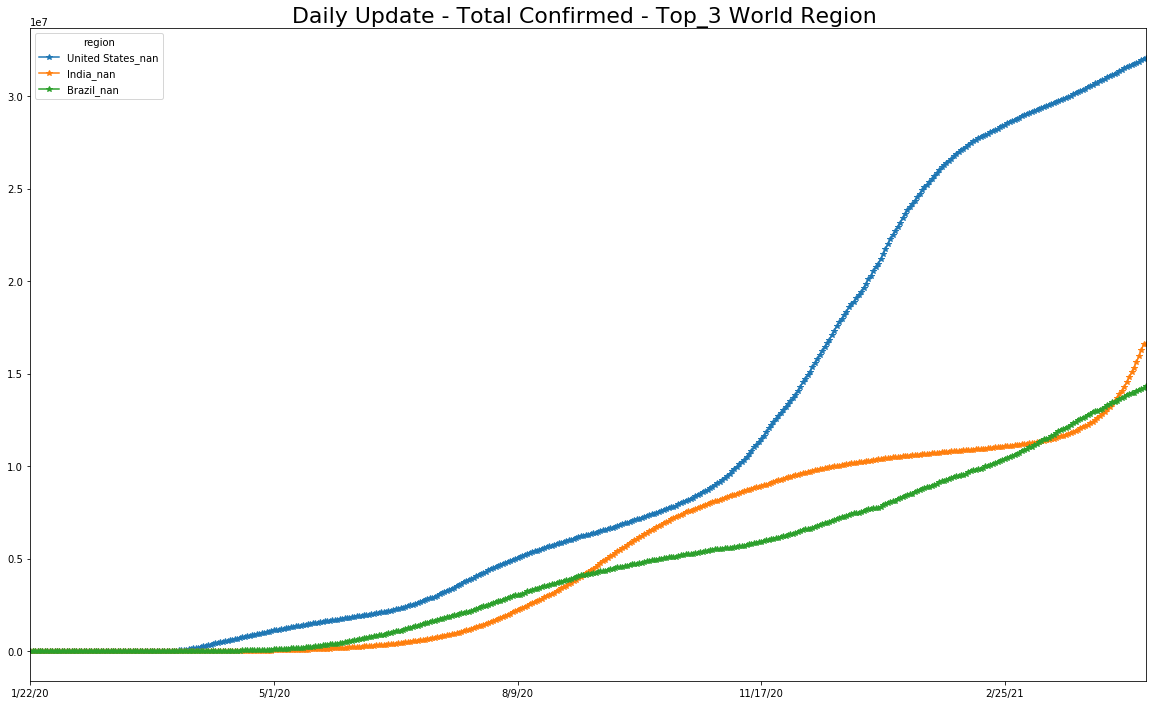

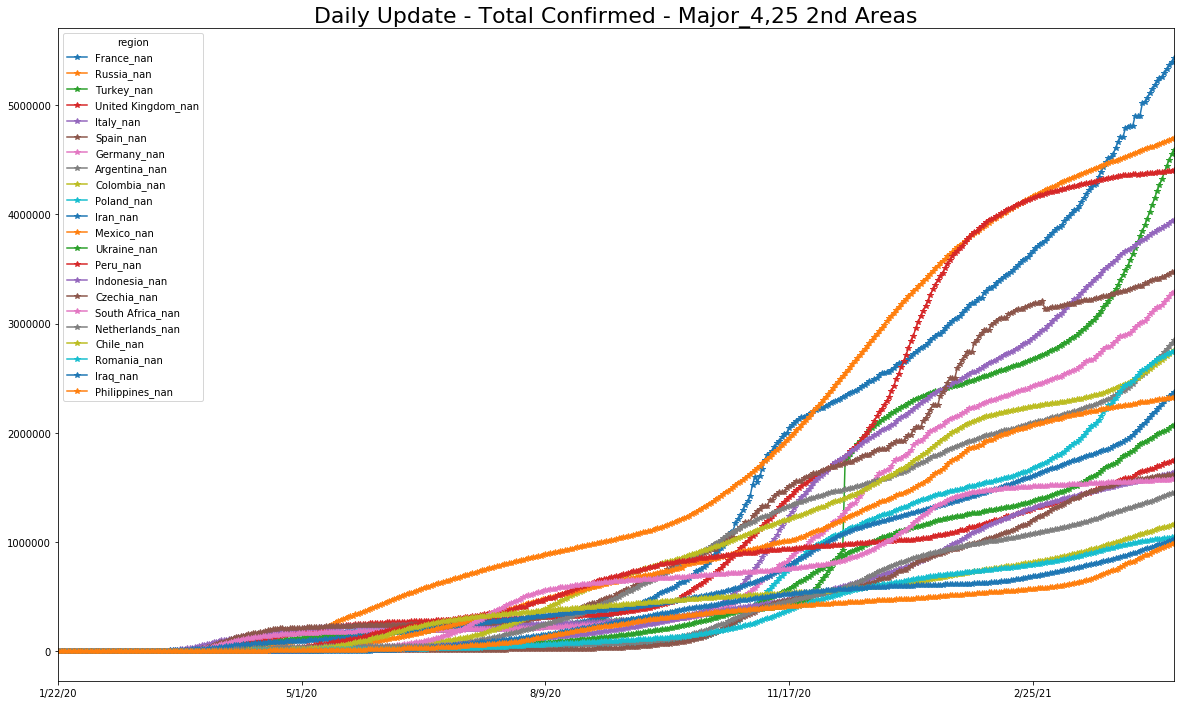

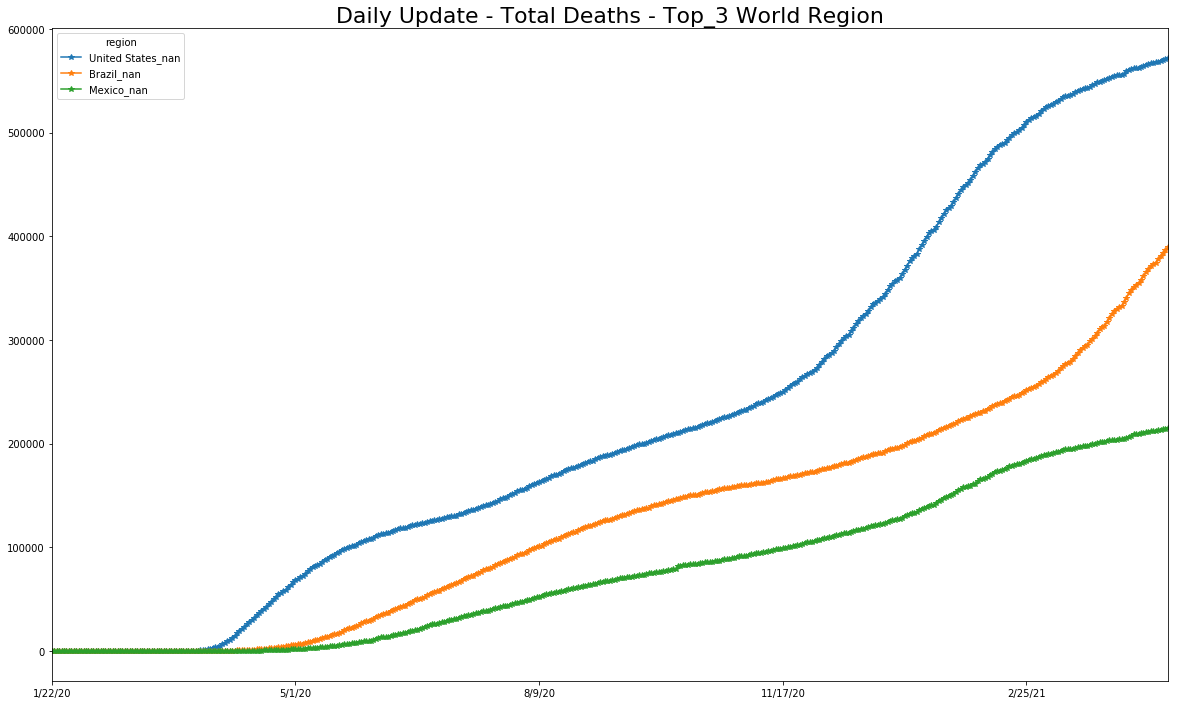

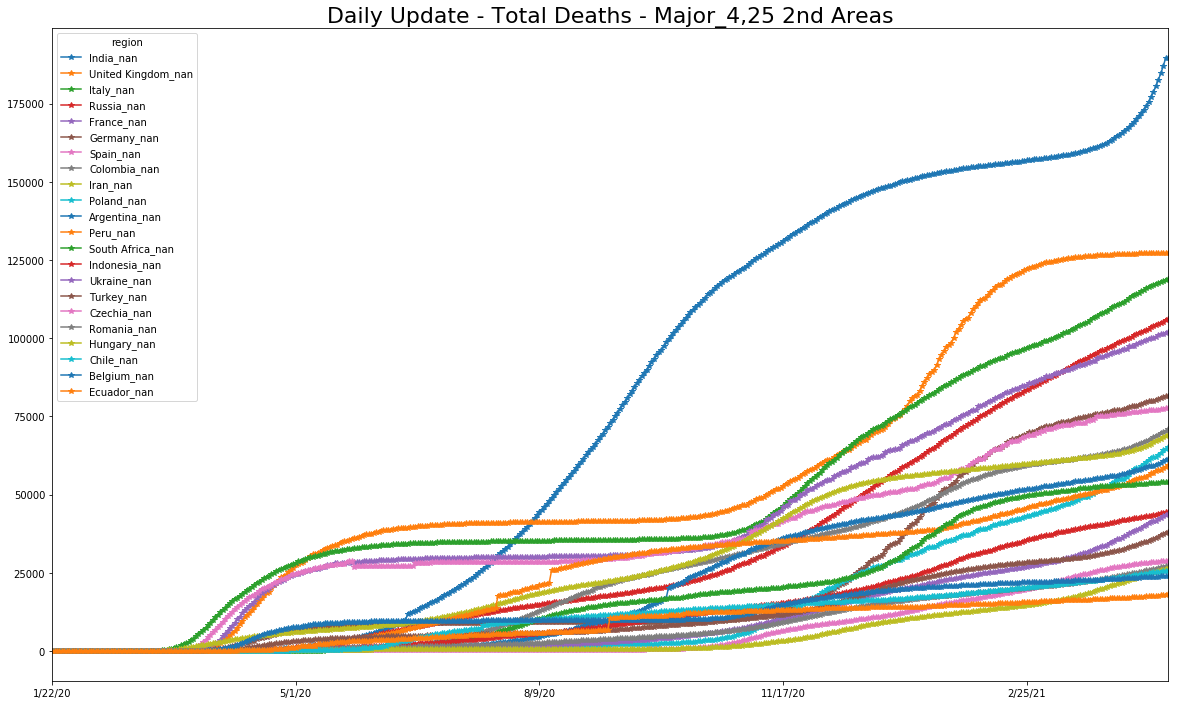

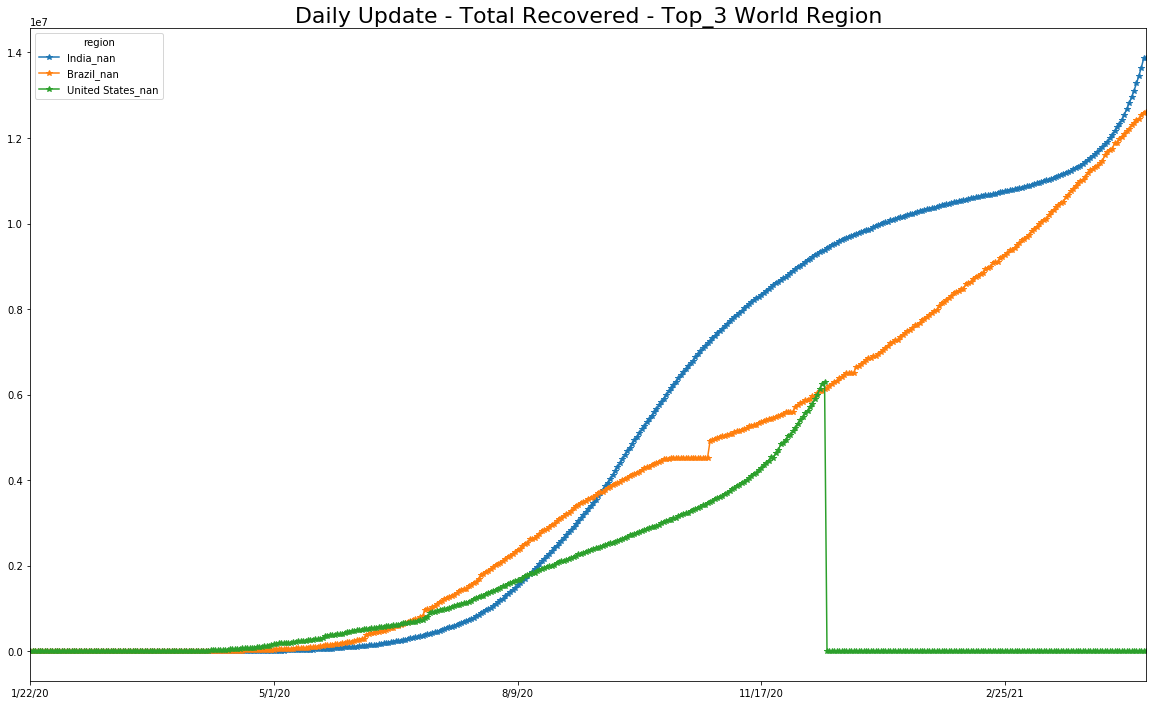

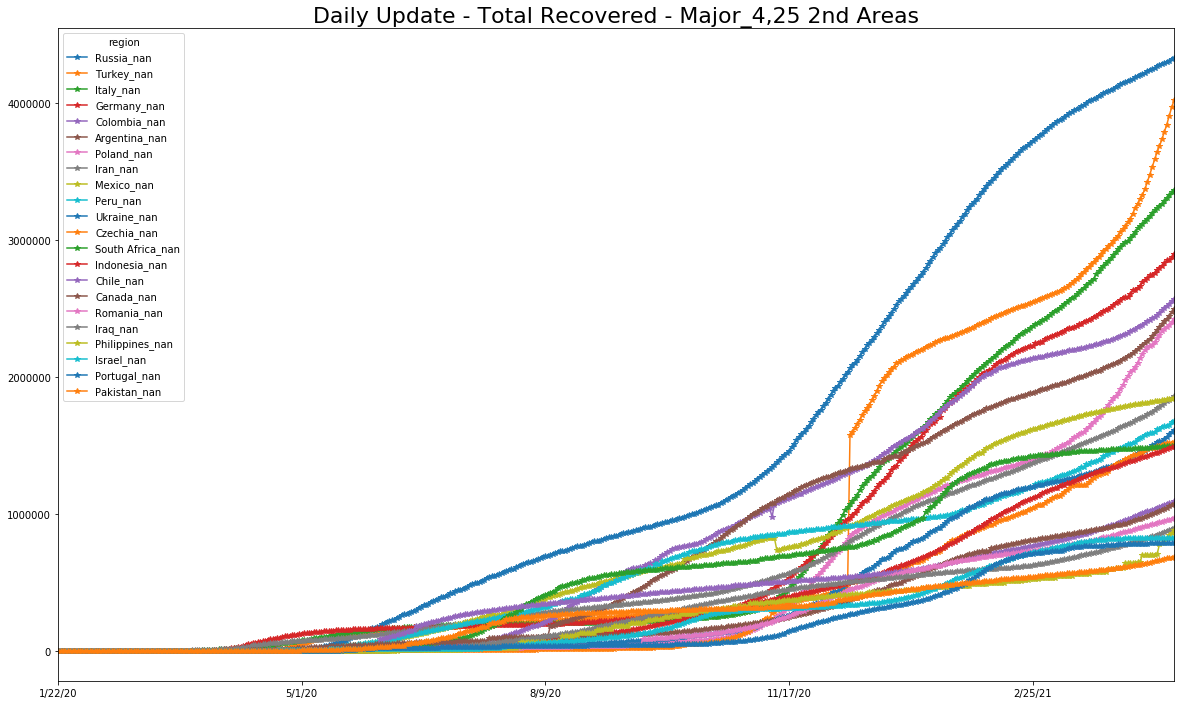

In [17]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [18]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime

#
api_key="29d9e51c56b94621b16297bcdeee9c4d" # hxj@mail.xcom
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [19]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan',
        'Peru_nan',
        'Chile_nan',
        'Mexico_nan'
       ]
#

#### Weather History

In [20]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2021/04/25


In [21]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [22]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [23]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!
#
## DROP_N=75 => 07/04

drop_n=drop_n_dataset_days

ts=ts[drop_n:]
ts_d=ts_d[drop_n:]
ts_rec=ts_rec[drop_n:]

In [24]:
ts[:3]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
9/13/20            38716        11353        48254         1344        3388   
9/14/20            38772        11520        48496         1438        3439   
9/15/20            38815        11672        48734         1438        3569   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
9/13/20                       95         555537        45862   
9/14/20                       95         565446        45969   
9/15/20                       95         577338        46119   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
9/13/20                                     113                       4170   
9/14/20                                     113                       4177   
9/15/20                                     113                       4185   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
9/13/20  ...            6522914         1808           47287            0   
9/14/20  ...            6557342         1812           47836            0   
9/15/20  ...            6596849         1827           48429            0   

region   Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
9/13/20          60540         1063                   30574       2011   
9/14/20          61569         1063                   31362       2013   
9/15/20          62655         1063                   32250       2016   

region   Zambia_nan  Zimbabwe_nan  
9/13/20       13539          7526  
9/14/20       13720          7531  
9/15/20       13819          7576  

[3 rows x 275 columns]

In [25]:
ts[-4:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
4/21/21            58214       129980       120174        12917       24883   
4/22/21            58312       130114       120363        12942       25051   
4/23/21            58542       130270       120562        13007       25279   
4/24/21            58730       130409       120736        13024       25492   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
4/21/21                     1217        2769552       210518   
4/22/21                     1217        2796768       211399   
4/23/21                     1222        2824652       212114   
4/24/21                     1227        2845872       212878   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
4/21/21                                     123                       5402   
4/22/21                                     123                       5418   
4/23/21                                     123                       5419   
4/24/21                                     123                       5420   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
4/21/21  ...           31862094       172601           87551            4   
4/22/21  ...           31929351       175891           87935            4   
4/23/21  ...           31991750       179537           88280            4   
4/24/21  ...           32044974       182326           88679            4   

region   Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
4/21/21         186745         2812                  286028       5960   
4/22/21         188063         2824                  287680       6020   
4/23/21         189381         2830                  289120       6056   
4/24/21         190523         2833                  290259       6105   

region   Zambia_nan  Zimbabwe_nan  
4/21/21       91119         37980  
4/22/21       91189         38018  
4/23/21       91251         38045  
4/24/21       91317         38064  

[4 rows x 275 columns]

In [26]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [27]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [28]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [29]:
p=%R pred_all

In [30]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [31]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [32]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [33]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [34]:
w_in_model.tail(2)

date       region   min   max
8379 2020-05-10  Vietnam_nan  26.9  33.0
8380 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [35]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [36]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [37]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
1     2020-09-14  Afghanistan_nan      38772             0             0   
2     2020-09-15  Afghanistan_nan      38815            56             0   
3     2020-09-16  Afghanistan_nan      38855            43             0   
4     2020-09-17  Afghanistan_nan      38872            40           139   
5     2020-09-18  Afghanistan_nan      38897            17           100   
6     2020-09-19  Afghanistan_nan      38919            25            82   
7     2020-09-20  Afghanistan_nan      39044            22            64   
8     2020-09-21  Afghanistan_nan      39074           125           172   
9     2020-09-22  Afghanistan_nan      39096            30           177   
10    2020-09-23  Afghanistan_nan      39145            22           177   
11    2020-09-24  Afghanistan_nan      39170            49           101   
12    2020-09-25  Afghanistan_nan      39186            25            96   
13    2020-09-26  Afghanistan_nan      39192            16            90   
14    2020-09-27  Afghanistan_nan      39227             6            47   
15    2020-09-28  Afghanistan_nan      39239            35            57   
16    2020-09-29  Afghanistan_nan      39254            12            53   
17    2020-09-30  Afghanistan_nan      39268            15            62   
18    2020-10-01  Afghanistan_nan      39285            14            41   
19    2020-10-02  Afghanistan_nan      39290            17            46   
20    2020-10-03  Afghanistan_nan      39297             5            36   
21    2020-10-04  Afghanistan_nan      39341             7            29   
22    2020-10-05  Afghanistan_nan      39422            44            56   
23    2020-10-06  Afghanistan_nan      39486            81           132   
24    2020-10-07  Afghanistan_nan      39548            64           189   
25    2020-10-08  Afghanistan_nan      39616            62           207   
26    2020-10-09  Afghanistan_nan      39693            68           194   
27    2020-10-10  Afghanistan_nan      39703            77           207   
28    2020-10-11  Afghanistan_nan      39799            10           155   
29    2020-10-12  Afghanistan_nan      39870            96           183   
30    2020-10-13  Afghanistan_nan      39928            71           177   
...          ...              ...        ...           ...           ...   
63195 2021-03-27     Zimbabwe_nan      36818            27            88   
63196 2021-03-28     Zimbabwe_nan      36822            13            69   
63197 2021-03-29     Zimbabwe_nan      36839             4            44   
63198 2021-03-30     Zimbabwe_nan      36839            17            34   
63199 2021-03-31     Zimbabwe_nan      36882             0            21   
63200 2021-04-01     Zimbabwe_nan      36896            43            60   
63201 2021-04-02     Zimbabwe_nan      36903            14            57   
63202 2021-04-03     Zimbabwe_nan      36911             7            64   
63203 2021-04-04     Zimbabwe_nan      36923             8            29   
63204 2021-04-05     Zimbabwe_nan      36934            12            27   
63205 2021-04-06     Zimbabwe_nan      36966            11            31   
63206 2021-04-07     Zimbabwe_nan      36984            32            55   
63207 2021-04-08     Zimbabwe_nan      37052            18            61   
63208 2021-04-09     Zimbabwe_nan      37147            68           118   
63209 2021-04-10     Zimbabwe_nan      37273            95           181   
63210 2021-04-11     Zimbabwe_nan      37288           126           289   
63211 2021-04-12     Zimbabwe_nan      37307            15           236   
63212 2021-04-13     Zimbabwe_nan      37330            19           160   
63213 2021-04-14     Zimbabwe_nan      37369            23            57   
63214 2021-04-15     Zimbabwe_nan      37422            39            81   
63215 2021-04-16     Zimbabwe_nan      37534            53  

In [38]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [39]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
63224 2021-04-25  Zimbabwe_nan          0            19            84   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
63224           365         100.049967         100.221195         100.968222   

       last_day  kalman_prediction  population  infected_rate  min  max  
63224     38064            38162.0    14862924       0.000026  NaN  NaN

In [40]:
## JOAO - FIX Drop Duplicates
train=train.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
## JOAO - FIX Drop empty region='nan_nan'
train=train[train['region']!='nan_nan']
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
63224 2021-04-25  Zimbabwe_nan          0            19            84   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
63224           365         100.049967         100.221195         100.968222   

       last_day  kalman_prediction  population  infected_rate  min  max  
63224     38064            38162.0    14862924       0.000026  NaN  NaN

In [41]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="World v2 -- Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage : infected_rate confirmed']=ratiod['infected_rate']*100
### Assumption : Each affected person can contact up to 9 others that not report or are assimptomatic COVID19 cases.
ratiod['population_percentage : factor 9/10 infected_rate confirmed']=np.clip(ratiod['infected_rate']*900,0.0,1.0)
#
ratiod['delta : pred new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta : pred new_cases per 1M hab']=ratiod['delta : pred new_cases']/ratiod['population']*1000000

### roling 7day_AVG
ratiod['delta : roling 7day AVG']=ratiod['7_day_change']/7
ratiod['delta : aprox 14-day case notification rate per 100k hab']=(ratiod['7_day_change']*2)/ratiod['population']*100000
###

ratiod=ratiod.rename(columns={'kalman_prediction': 'confirmed_prediction', 'last_day': 'confirmed_yesterday'})
ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)
ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
61872  2021-04-23  Zimbabwe_nan      38045            38           159   
61873  2021-04-24  Zimbabwe_nan      38064            27           170   
61874  2021-04-25  Zimbabwe_nan          0            19            84   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
61872           596         100.100079         100.420006         101.592673   
61873           511         100.071045         100.448871         101.361459   
61874           365         100.049967         100.221195         100.968222   

       confirmed_yesterday  ...  population  infected_rate  min  max  \
61872                38018  ...    14862924       0.000026  NaN  NaN   
61873                38045  ...    14862924       0.000026  NaN  NaN   
61874                38064  ...    14862924       0.000026  NaN  NaN   

       population_percentage : infected_rate confirmed  \
61872                                         0.002558   
61873                                         0.002560   
61874                                         0.002561   

       population_percentage : factor 9/10 infected_rate confirmed  \
61872                                           0.023022             
61873                                           0.023038             
61874                                           0.023050             

       delta : pred new_cases  delta : pred new_cases per 1M hab  \
61872                   101.0                           6.795433   
61873                   105.0                           7.064559   
61874                    98.0                           6.593588   

       delta : roling 7day AVG  \
61872                85.142857   
61873                73.000000   
61874                52.142857   

       delta : aprox 14-day case notification rate per 100k hab  
61872                                           8.019956         
61873                                           6.876171         
61874                                           4.911550         

[3 rows x 21 columns]

## Kalman 1 day Prediction with Evaluation

                region           mse          rmse            mae
265  United States_nan  4.608545e+12  2.146752e+06  171892.352679


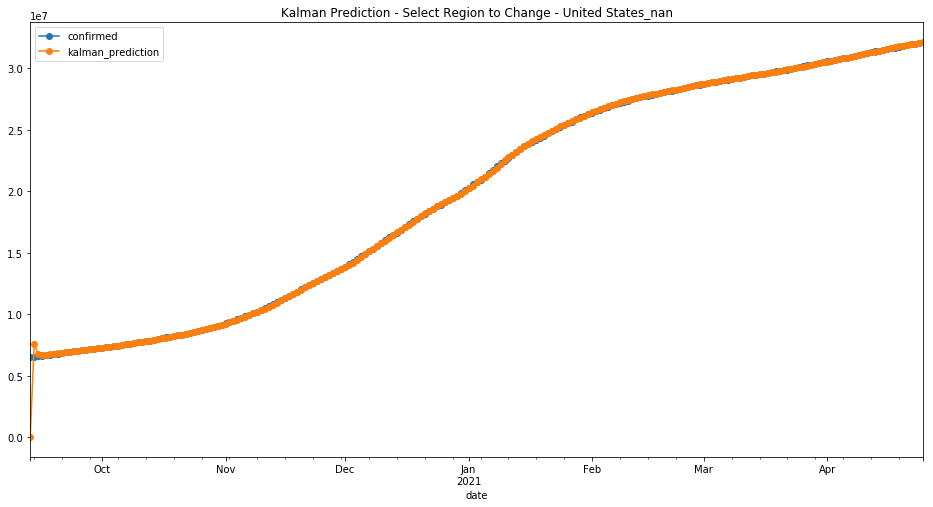

In [42]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse           rmse           mae
214  Russia_nan  9.909704e+10  314796.828229  23549.388393


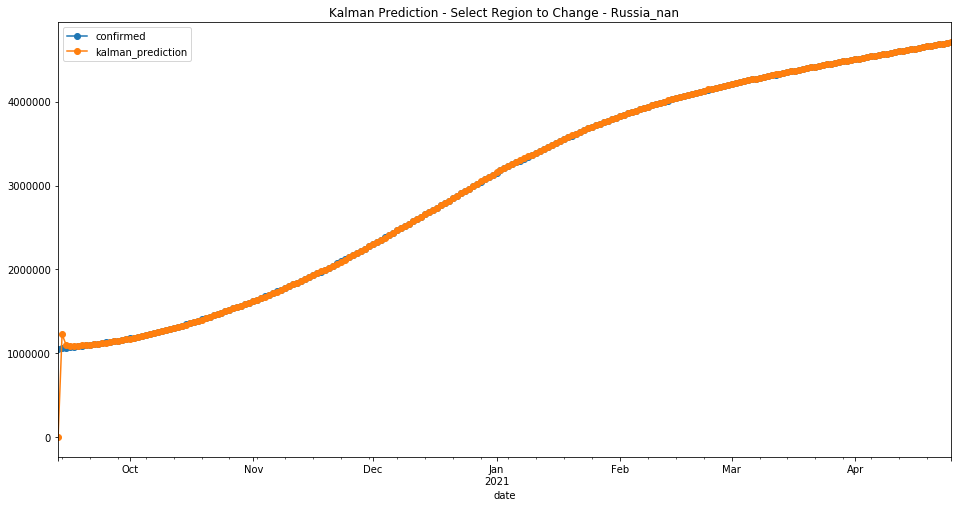

In [43]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse           rmse           mae
30  Brazil_nan  9.234890e+11  960983.369388  86698.794643


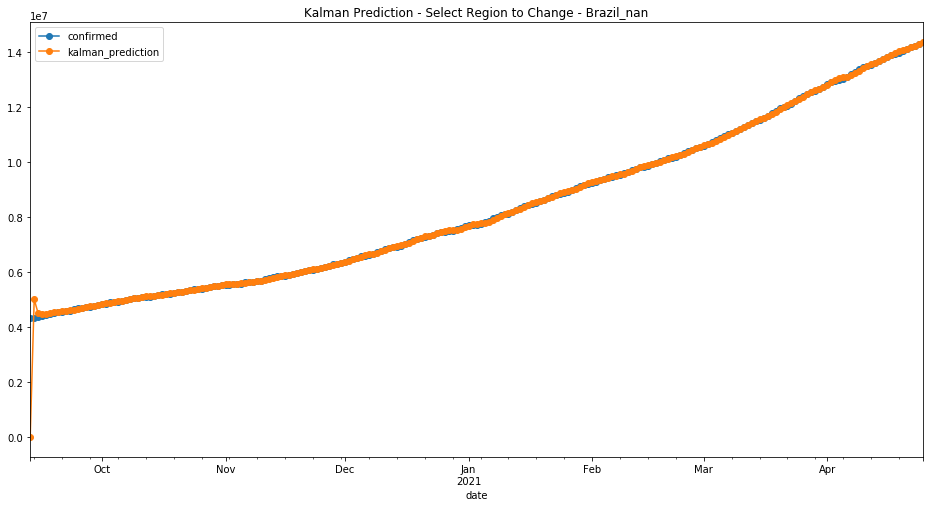

In [44]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse           rmse          mae
264  United Kingdom_nan  8.672654e+10  294493.701694  24711.46875


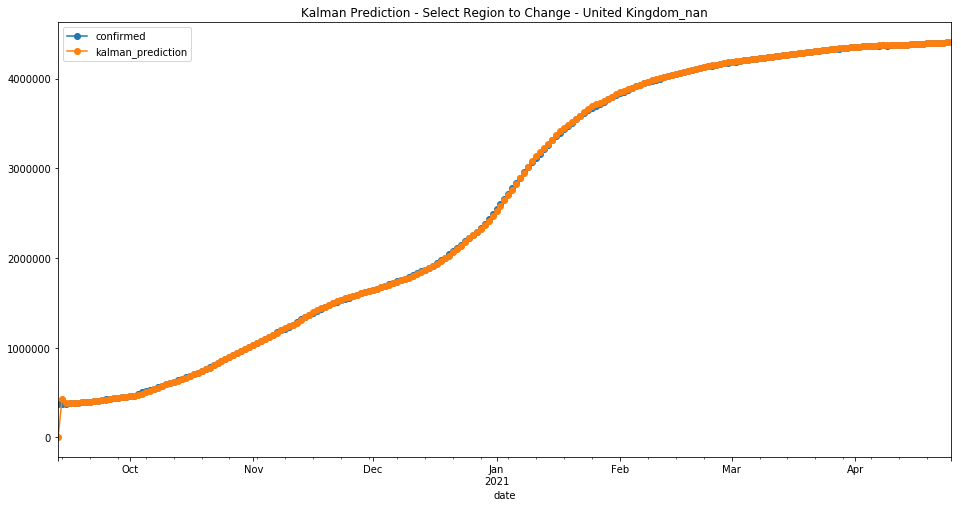

In [45]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [46]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpw4dnakl7
  JVM stdout: /tmp/tmpw4dnakl7/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpw4dnakl7/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    2 years, 5 months and 29 days !!!
H2O cluster name:           H2O_from_python_unknownUser_w6mg1u
H2O cluster total nodes:    1
H2O cluster free memory:    3.543 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.7 final
--------------------------  ----------------------------------------

In [47]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 14 training day 2weeks.
#
if number_past_days_training>=7 : 
    ntraindays=number_past_days_training 
else : 
    ntraindays=7
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2021-04-01
last_train_date= 2021-04-24
first_bootstrap_date= 2021-04-16
boost_bootstrap_date= 2021-04-21
first_test_date= 2021-04-15
last_test_date= 2021-04-25
first_valid_date= 2021-04-23


In [48]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [49]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [50]:
pred2.iloc[:25]

0  confirmed       date           region
0    57701.0      57612 2021-04-16  Afghanistan_nan
1    57780.0      57721 2021-04-17  Afghanistan_nan
2    57881.0      57793 2021-04-18  Afghanistan_nan
3    57955.0      57898 2021-04-19  Afghanistan_nan
4    58058.0      58037 2021-04-20  Afghanistan_nan
5    58192.0      58214 2021-04-21  Afghanistan_nan
6    58373.0      58312 2021-04-22  Afghanistan_nan
7    58490.0      58542 2021-04-23  Afghanistan_nan
8    58717.0      58730 2021-04-24  Afghanistan_nan
9    58916.0          0 2021-04-25  Afghanistan_nan
10  129245.0     129307 2021-04-16      Albania_nan
11  129411.0     129456 2021-04-17      Albania_nan
12  129549.0     129594 2021-04-18      Albania_nan
13  129674.0     129694 2021-04-19      Albania_nan
14  129751.0     129842 2021-04-20      Albania_nan
15  129888.0     129980 2021-04-21      Albania_nan
16  130009.0     130114 2021-04-22      Albania_nan
17  130136.0     130270 2021-04-23      Albania_nan
18  130287.0     130409 2021-04-24      Albania_nan
19  130422.0          0 2021-04-25      Albania_nan
20  119335.0     119323 2021-04-16      Algeria_nan
21  119525.0     119486 2021-04-17      Algeria_nan
22  119694.0     119642 2021-04-18      Algeria_nan
23  119858.0     119805 2021-04-19      Algeria_nan
24  120023.0     119992 2021-04-20      Algeria_nan

In [51]:
pred2.iloc[175:195]

0  confirmed       date          region
175  306007.0     305933 2021-04-21  Azerbaijan_nan
176  307868.0     307980 2021-04-22  Azerbaijan_nan
177  309943.0     309789 2021-04-23  Azerbaijan_nan
178  311700.0     311465 2021-04-24  Azerbaijan_nan
179  313373.0          0 2021-04-25  Azerbaijan_nan
180    9567.0       9634 2021-04-16     Bahamas_nan
181    9462.0       9634 2021-04-17     Bahamas_nan
182    9703.0       9634 2021-04-18     Bahamas_nan
183    9717.0       9791 2021-04-19     Bahamas_nan
184    9580.0       9791 2021-04-20     Bahamas_nan
185    9871.0       9868 2021-04-21     Bahamas_nan
186    9839.0       9868 2021-04-22     Bahamas_nan
187    9944.0       9976 2021-04-23     Bahamas_nan
188    9884.0       9976 2021-04-24     Bahamas_nan
189   10057.0          0 2021-04-25     Bahamas_nan
190  161698.0     162089 2021-04-16     Bahrain_nan
191  162876.0     163113 2021-04-17     Bahrain_nan
192  163854.0     164110 2021-04-18     Bahrain_nan
193  164845.0     165118 2021-04-19     Bahrain_nan
194  165835.0     166157 2021-04-20     Bahrain_nan

In [52]:
pred2.iloc[220:240]

0  confirmed       date       region
220  341052.0     341539 2021-04-16  Belarus_nan
221  342607.0     342923 2021-04-17  Belarus_nan
222  343983.0     344223 2021-04-18  Belarus_nan
223  345339.0     345110 2021-04-19  Belarus_nan
224  346199.0     345998 2021-04-20  Belarus_nan
225  347093.0     347316 2021-04-21  Belarus_nan
226  348418.0     348486 2021-04-22  Belarus_nan
227  349518.0     350221 2021-04-23  Belarus_nan
228  351361.0     351674 2021-04-24  Belarus_nan
229  352783.0          0 2021-04-25  Belarus_nan
230  942729.0     943213 2021-04-16  Belgium_nan
231  946842.0     947000 2021-04-17  Belgium_nan
232  950739.0     949996 2021-04-18  Belgium_nan
233  953659.0     951626 2021-04-19  Belgium_nan
234  954978.0     955056 2021-04-20  Belgium_nan
235  958557.0     960169 2021-04-21  Belgium_nan
236  963656.0     964526 2021-04-22  Belgium_nan
237  967881.0     968107 2021-04-23  Belgium_nan
238  971603.0     972041 2021-04-24  Belgium_nan
239  975776.0          0 2021-04-25  Belgium_nan

In [53]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [54]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data = ',model_v2.r2(valid=True))

# MSE on the training data =  5521591888.385281
# MSE on the validation data =  14911493478589.256
# R^2 on the training data =  0.9996830362241211
# R^2 on the validation data =  0.42540660267014907


In [55]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1619328899638_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 5521591888.385281
RMSE: 74307.41476047515
MAE: 7336.149725097514
RMSLE: 0.20753405557480178
Mean Residual Deviance: 5521591888.385281

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 14911493478589.256
RMSE: 3861540.2987136175
MAE: 1018550.8067832369
RMSLE: 7.656245313201539
Mean Residual Deviance: 14911493478589.256
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2021-04-25 05:35:07  0.069 sec   0.0                nan                 nan                 nan                  nan                 nan                 nan
     2021-04-25 05:35:07  0.498 sec   1.0                232265.9638098727   30483.086772667248  53947477944.52909    3820734.4678920778  997329.8508586711   14598011874138.559
     2021-04-25 05:35:08  0.658 sec   2.0                190080.8996170553   24118.974296220982  36130748399.22905    3838948.108227745   1002305.6758312879  14737522577665.383
     2021-04-25 05:35:08  0.801 sec   3.0                157406.03197614965  21215.19832862333   24776658902.476643   3848719.9752152828  1004444.1953927807  14812645447621.127
     2021-04-25 05:35:08  1.043 sec   4.0                125602.79561869722  19444.38383039611   15776062267.232224   3846236.456030009   1003670.7322813584  14793534875694.281
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                 ---
     2021-04-25 05:35:24  16.671 sec  251.0              78163.06933327008   7689.280250075932   6109465407.597585    3862947.964746828   1020520.828584086   14922366978341.662
     2021-04-25 05:35:28  20.716 sec  328.0              77175.97303607216   7527.679625008283   5956130814.064537    3863421.8578610127  1019803.6754072966  14926028451798.238
     2021-04-25 05:35:32  24.748 sec  404.0              75177.99168470416   7379.980357771736   5651730433.745448    3863416.0290328087  1019814.5671063015  14925983413387.635
     2021-04-25 05:35:36  28.791 sec  480.0              74012.11334152364   7314.671265472393   5477792921.278541    3862962.014519882   1018905.0122158185  14922475525623.504
     2021-04-25 05:35:37  30.127 sec  500.0              74307.41476047515   7336.149725097514   5521591888.385281    3861540.2987136175  1018550.8067832369  14911493478589.256


See the whole table with table.as_data_frame()
Variable Importances: 


variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
last_day           2.256e+19              1                    0.33816
kalman_prediction  1.88542e+19            0.835732             0.282611
region             1.02542e+19            0.454528             0.153703
7_day_change       5.45694e+18            0.241885             0.0817958
3_day_change       3.84265e+18            0.17033              0.0575987
infected_rate      1.81044e+18            0.0802498            0.0271373
1_day_change       1.50108e+18            0.0665371            0.0225002
max                1.05358e+18            0.0467012            0.0157925
min                1.03251e+18            0.0457673            0.0154767
7_day_change_rate  1.67431e+17            0.00742157           0.00250968
3_day_change_rate  1.18749e+17            0.00526371           0.00177998
1_day_change_rate  6.2376e+16             0.00276489           0.000934975

In [56]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0            last_day         2.256005e+19           1.000000    0.338160
1   kalman_prediction         1.885415e+19           0.835732    0.282611
2              region         1.025418e+19           0.454528    0.153703
3        7_day_change         5.456935e+18           0.241885    0.081796
4        3_day_change         3.842648e+18           0.170330    0.057599
5       infected_rate         1.810440e+18           0.080250    0.027137
6        1_day_change         1.501080e+18           0.066537    0.022500
7                 max         1.053582e+18           0.046701    0.015792
8                 min         1.032512e+18           0.045767    0.015477
9   7_day_change_rate         1.674310e+17           0.007422    0.002510
10  3_day_change_rate         1.187495e+17           0.005264    0.001780
11  1_day_change_rate         6.237603e+16           0.002765    0.000935

In [57]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


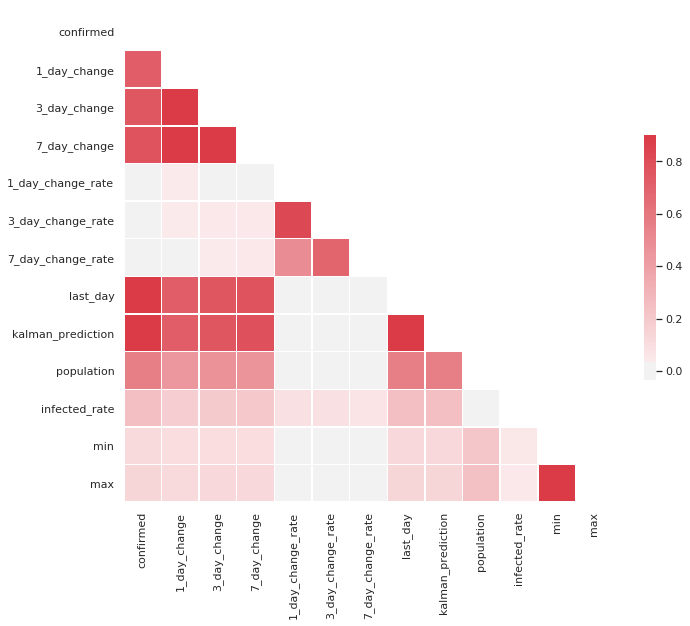

In [58]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [59]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.723293
3_day_change         0.756831
7_day_change         0.775932
1_day_change_rate    0.024779
3_day_change_rate    0.022877
7_day_change_rate    0.015251
last_day             0.993960
kalman_prediction    0.994240
population           0.559071
infected_rate        0.249396
min                  0.119162
max                  0.140389
Name: confirmed, dtype: float64


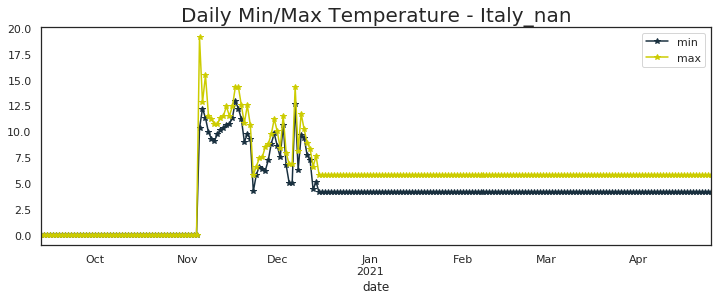

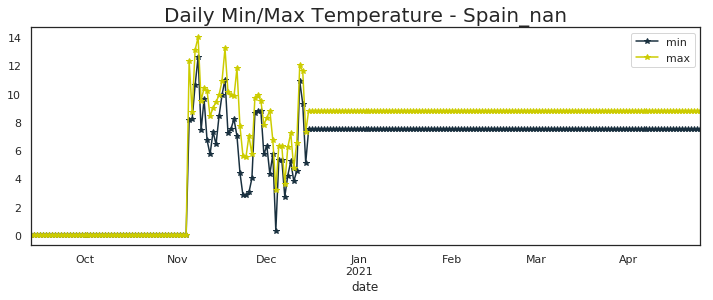

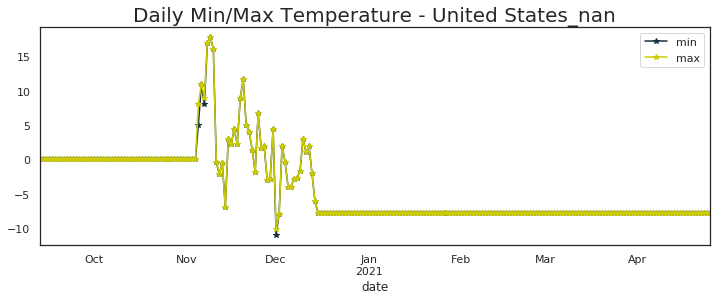

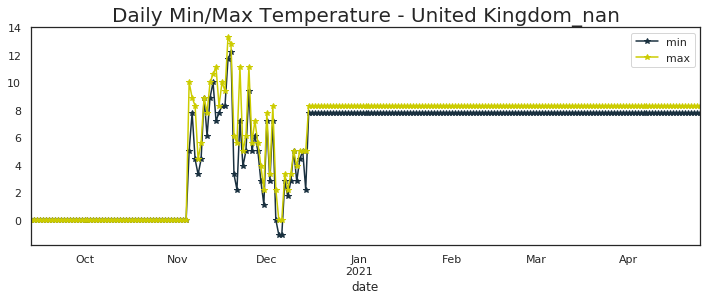

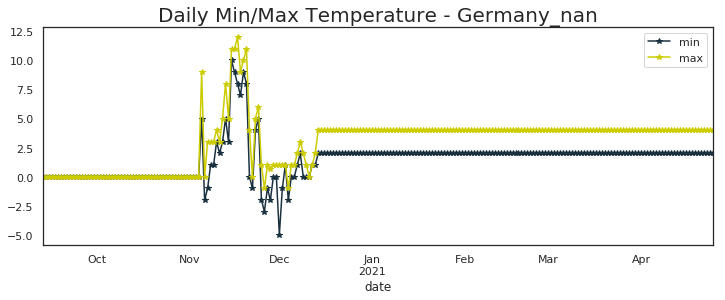

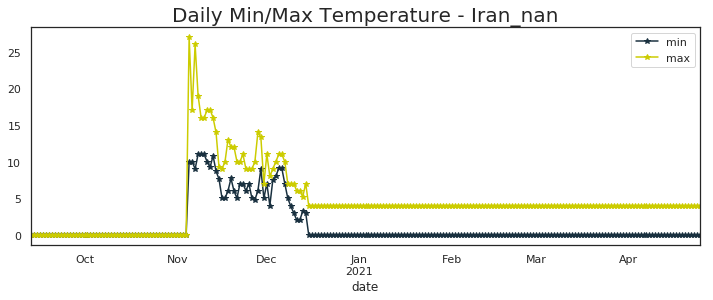

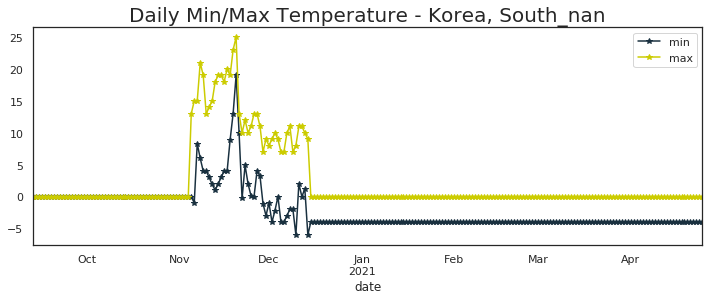

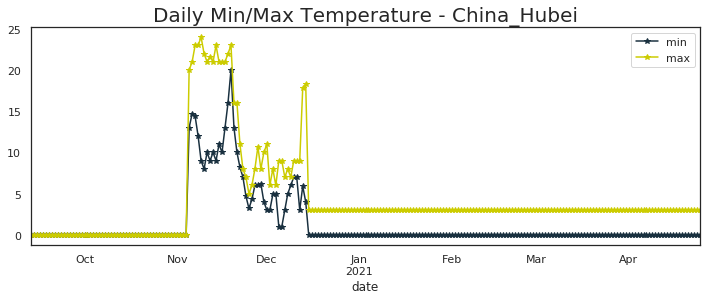

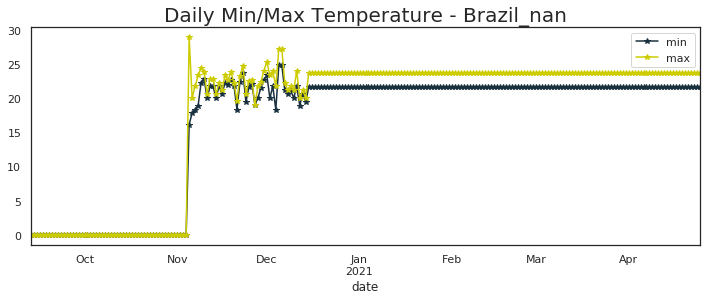

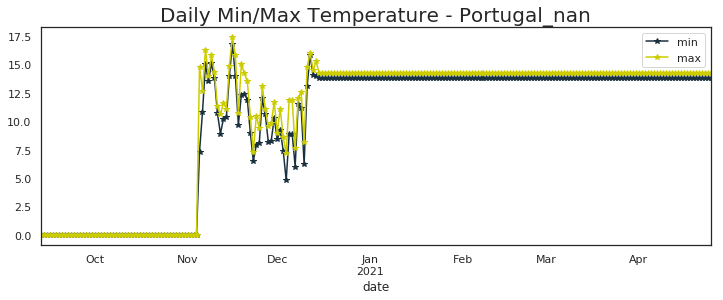

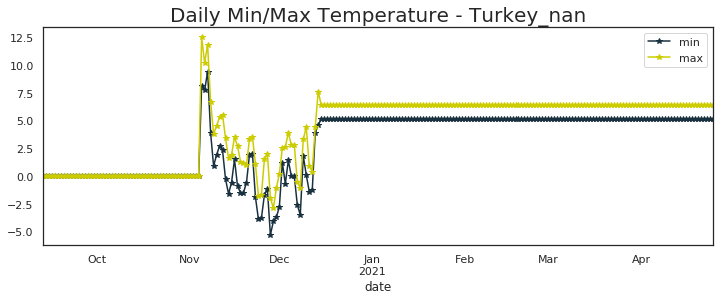

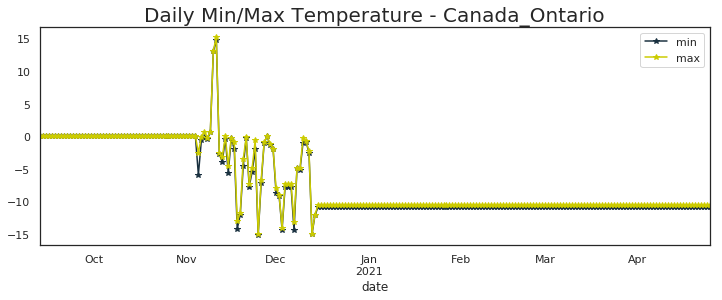

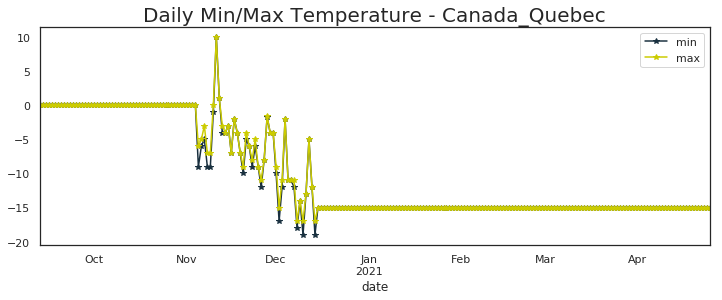

In [60]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [61]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           17.8  17.8
India_nan                   22.0  31.0
Brazil_nan                  24.8  28.9
France_nan                  12.1  13.3
Russia_nan                   0.0   4.0
Turkey_nan                   9.4  12.5
United Kingdom_nan          12.2  13.3
Italy_nan                   12.9  19.1
Spain_nan                   12.6  14.0
Germany_nan                 10.0  12.0
Argentina_nan                0.0   0.0
Colombia_nan                 0.0   0.0
Poland_nan                   8.9  10.6
Iran_nan                    11.0  27.0
Mexico_nan                  15.1  15.1
Ukraine_nan                  0.0   0.0
Peru_nan                    24.6  29.9
Indonesia_nan                0.0   0.0
Czechia_nan                  0.0   0.0
South Africa_nan             0.0   0.0
Netherlands_nan             14.4  16.1
Chile_nan                   18.0  22.0
Romania_nan                 

### Kalman X Days Ahead Prediction

In [62]:
%%R

#install.packages('reshape')

NULL


In [63]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [64]:
all_new=%R all_new

In [65]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

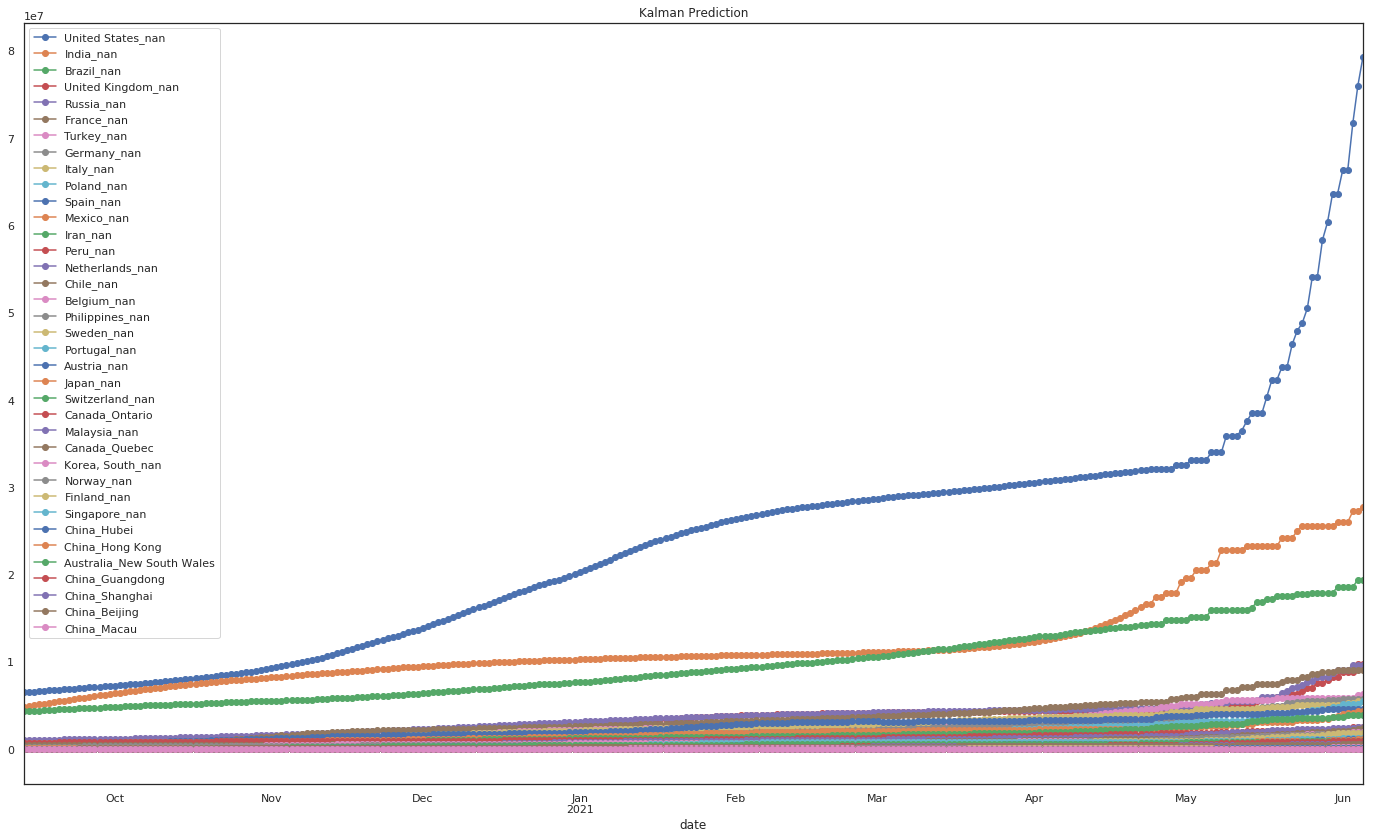

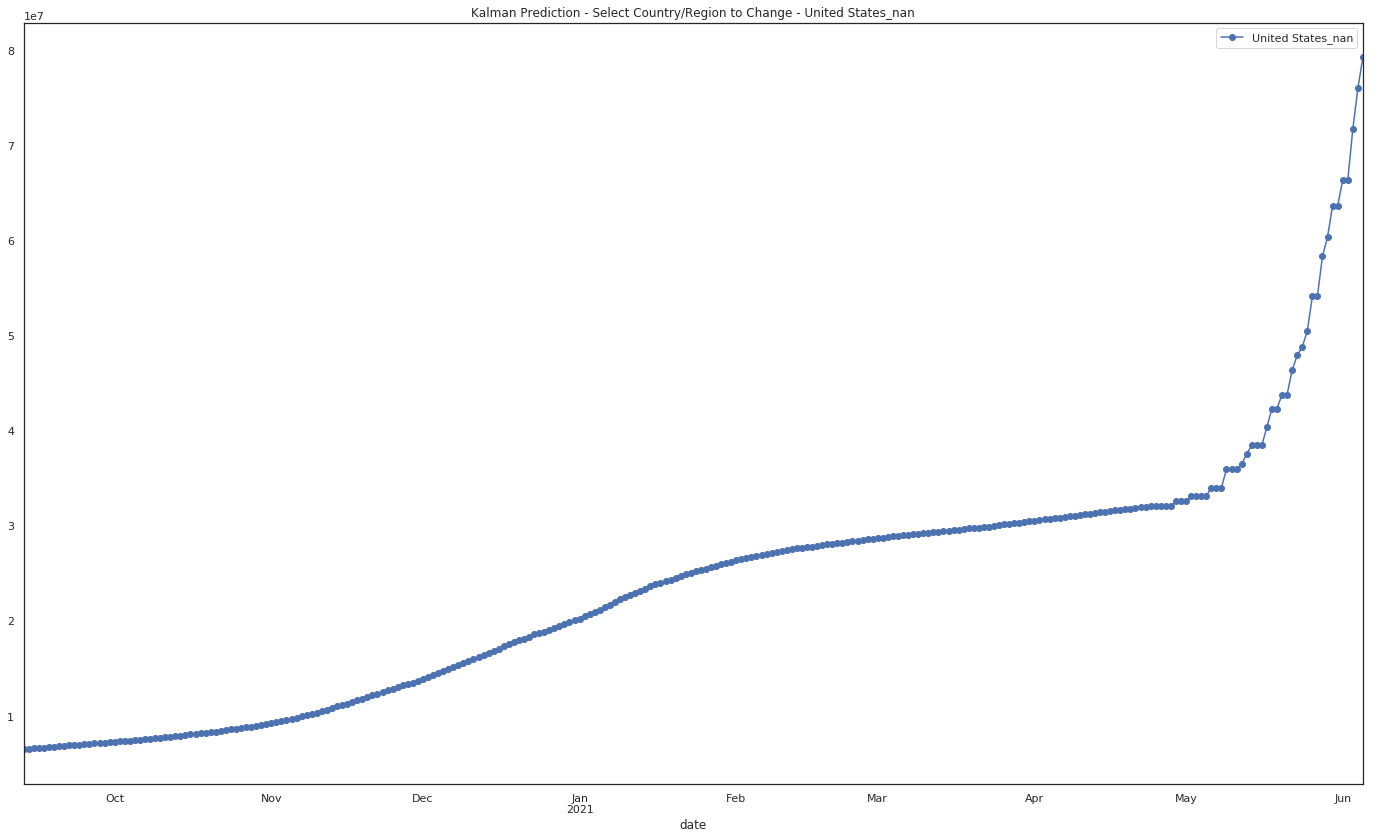

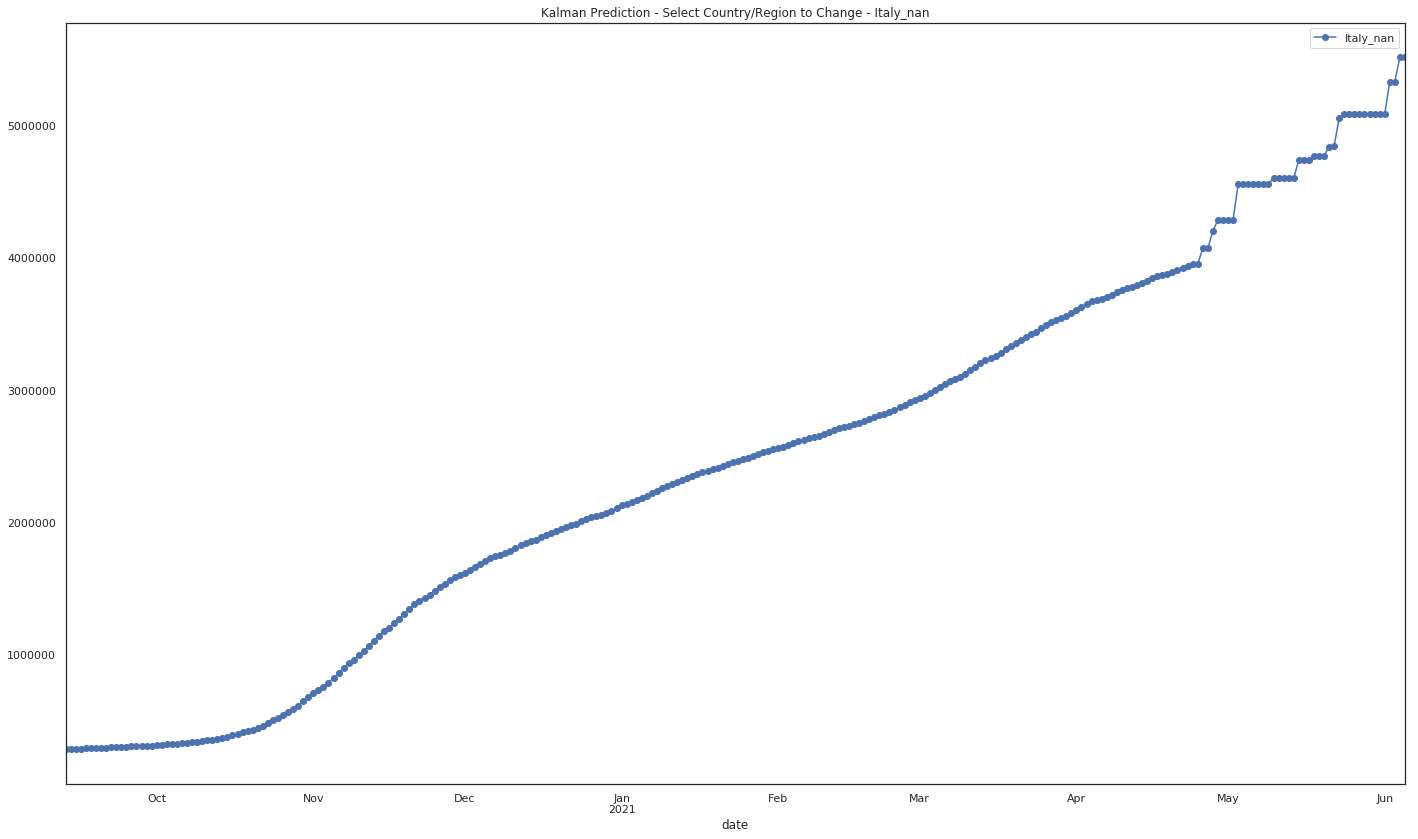

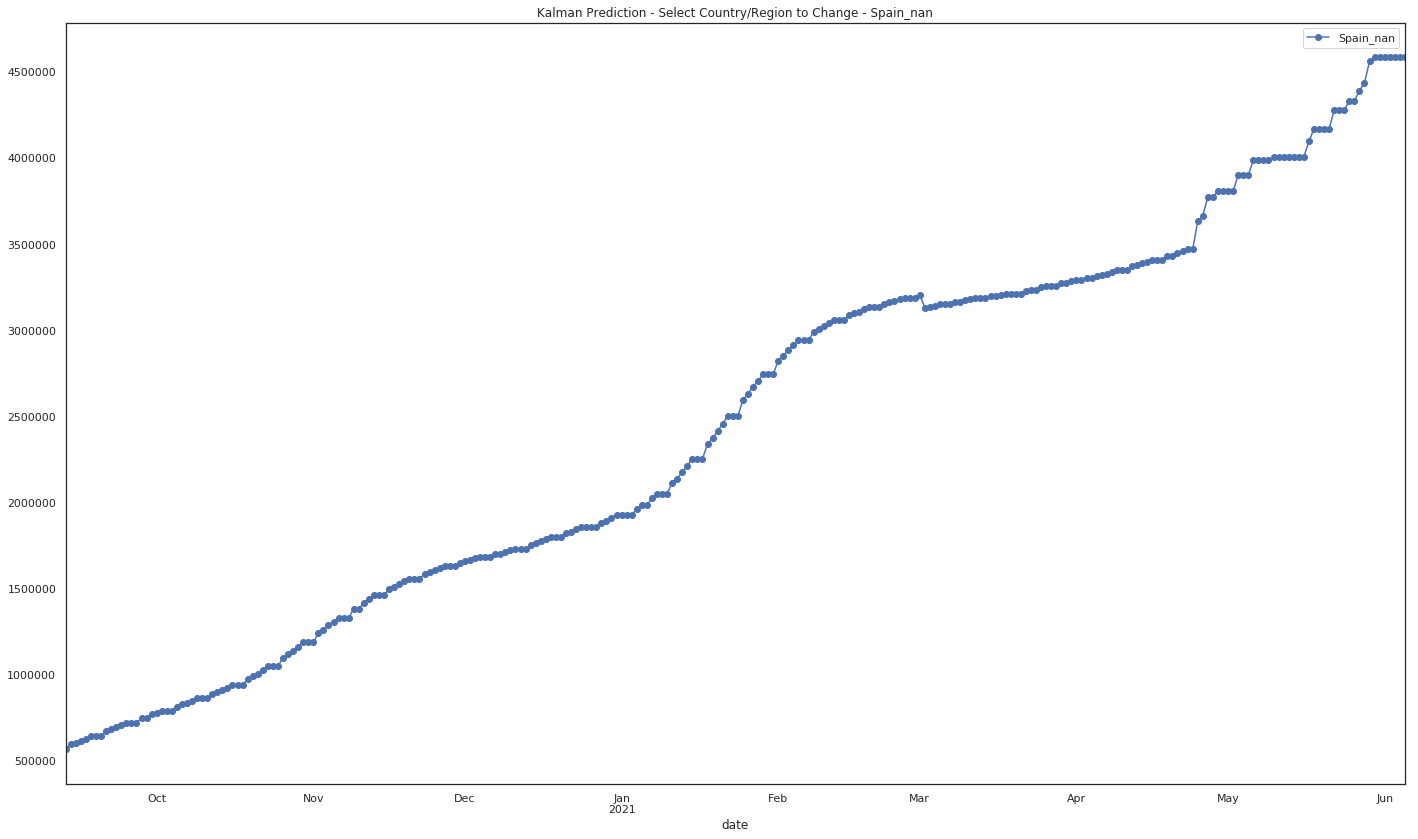

In [66]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman=p_kalman.reindex(p_kalman.max().sort_values(ascending=False).index, axis=1)
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


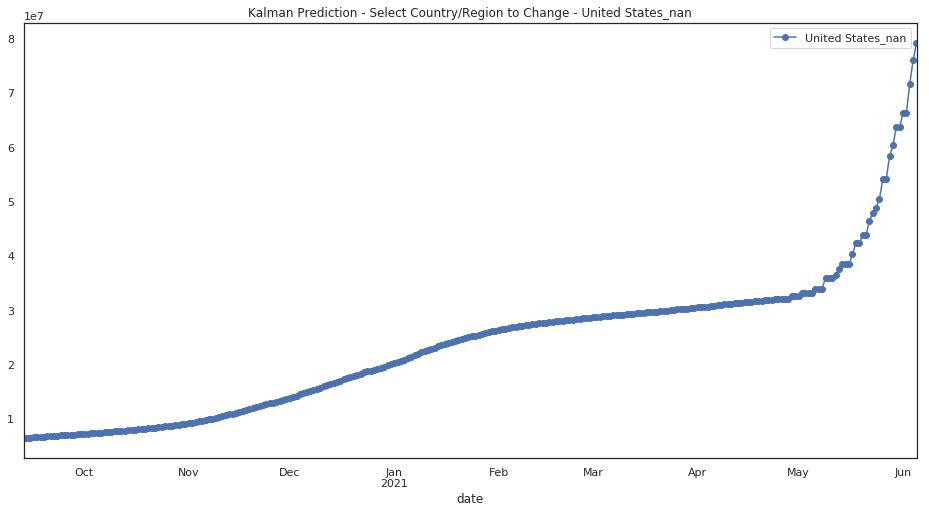

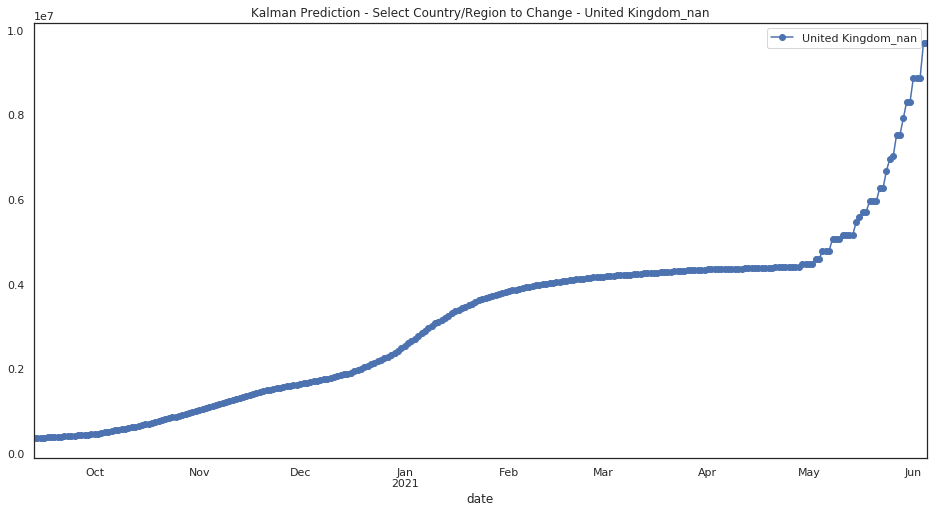

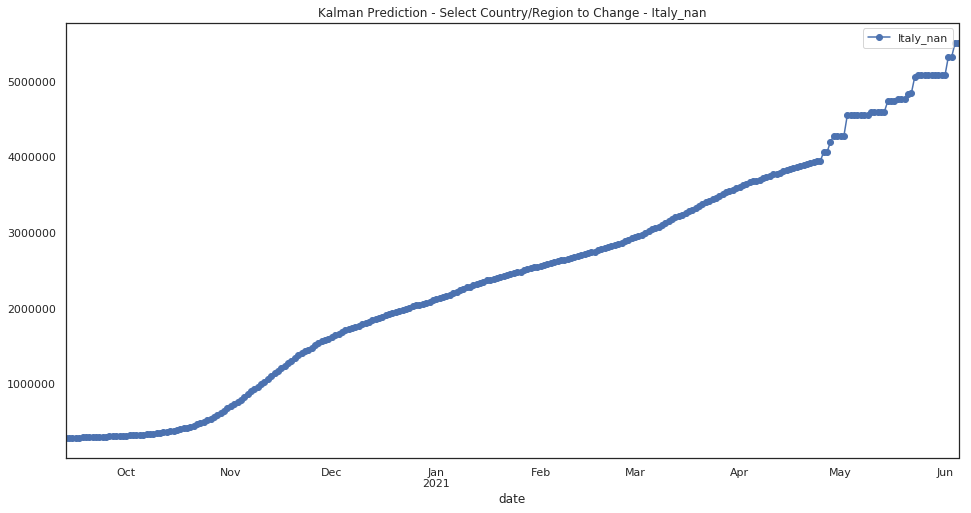

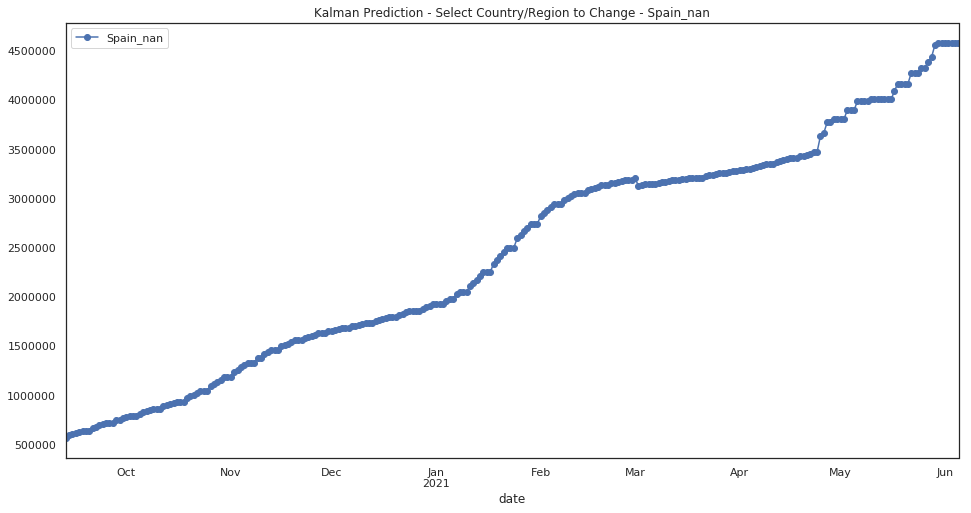

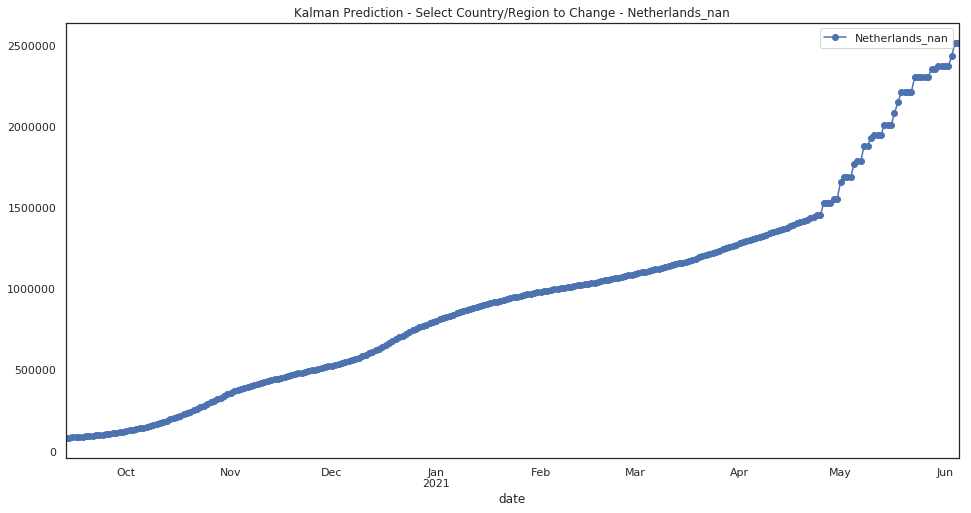

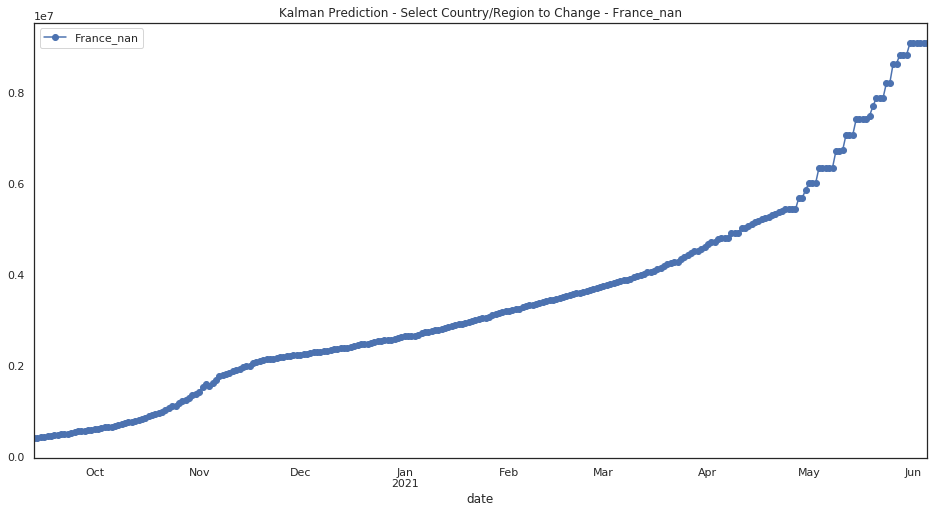

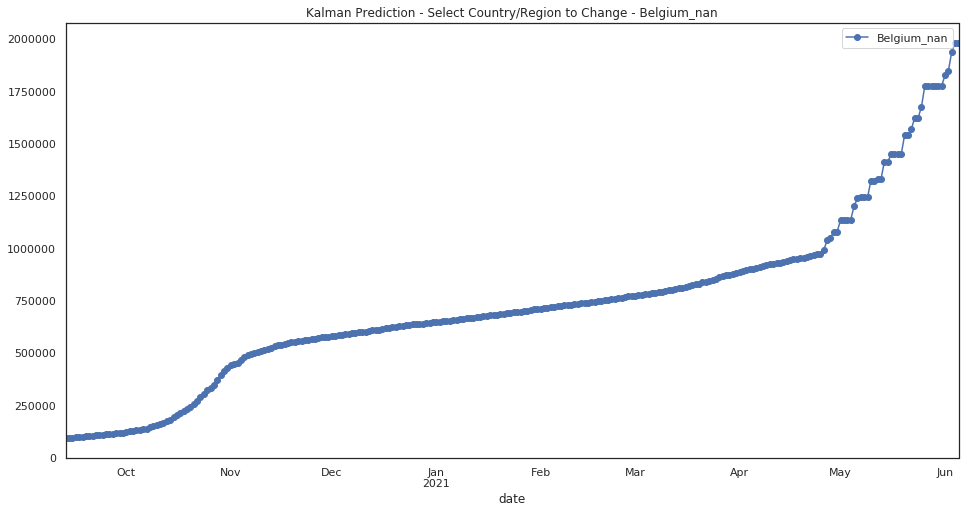

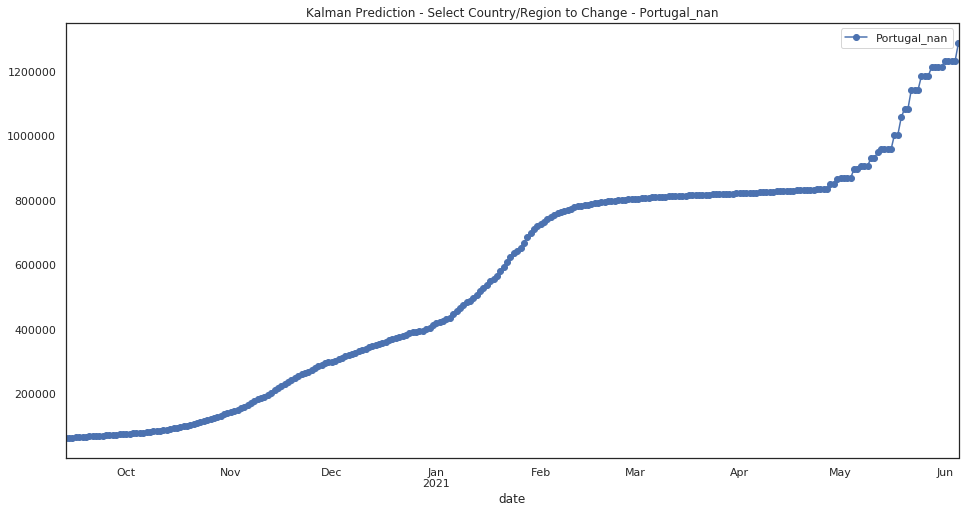

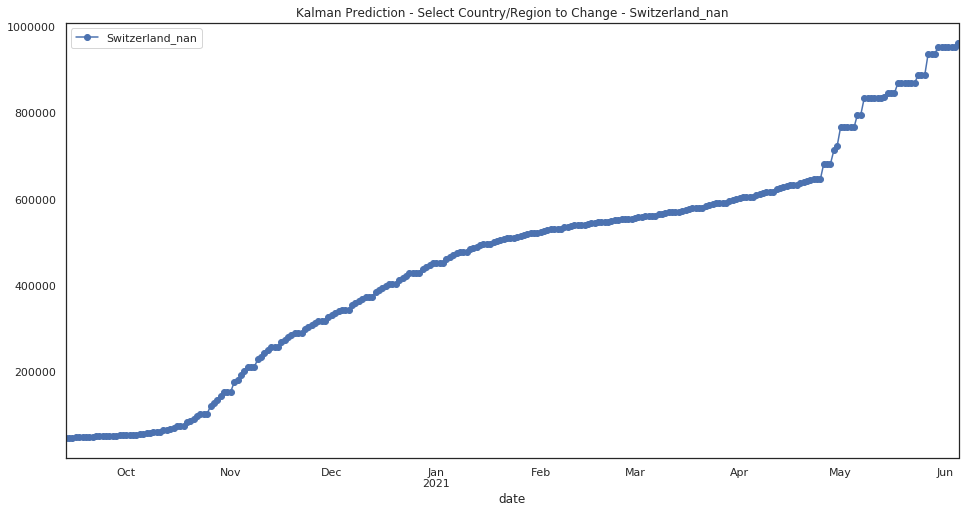

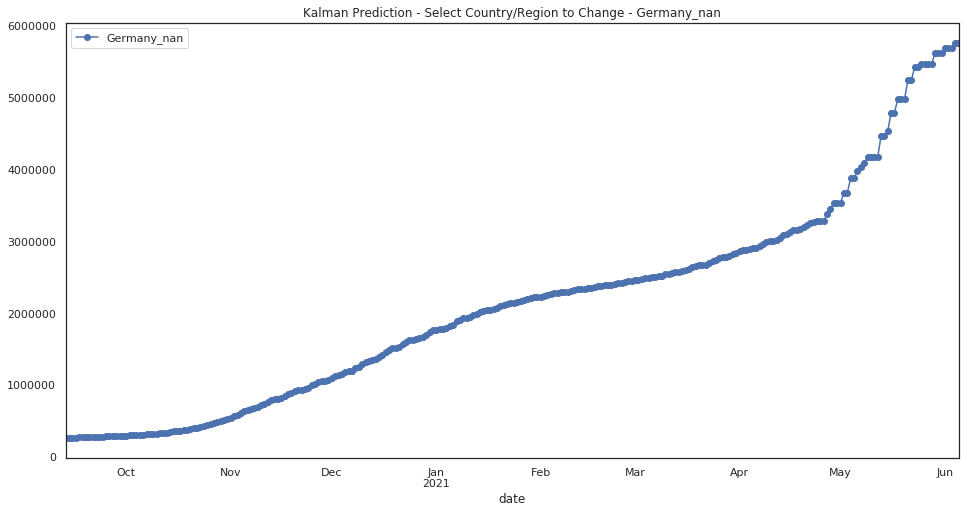

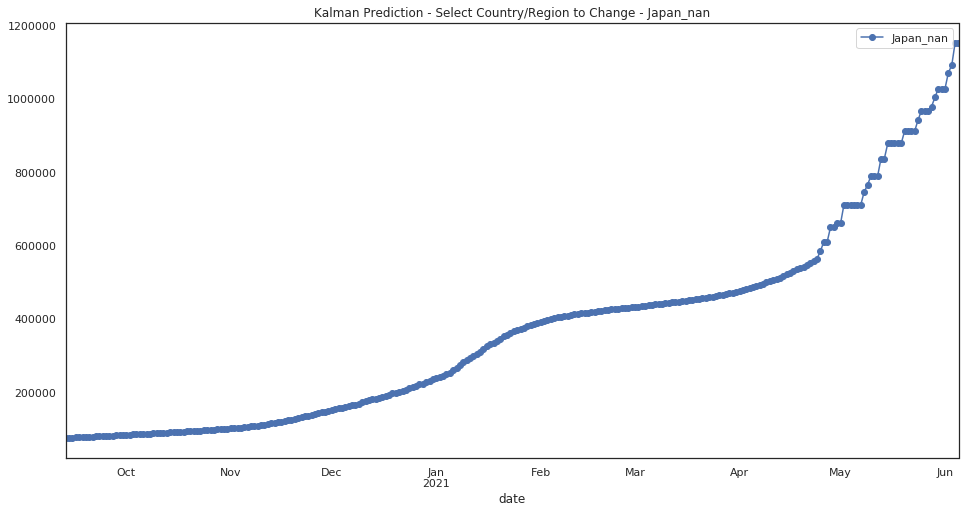

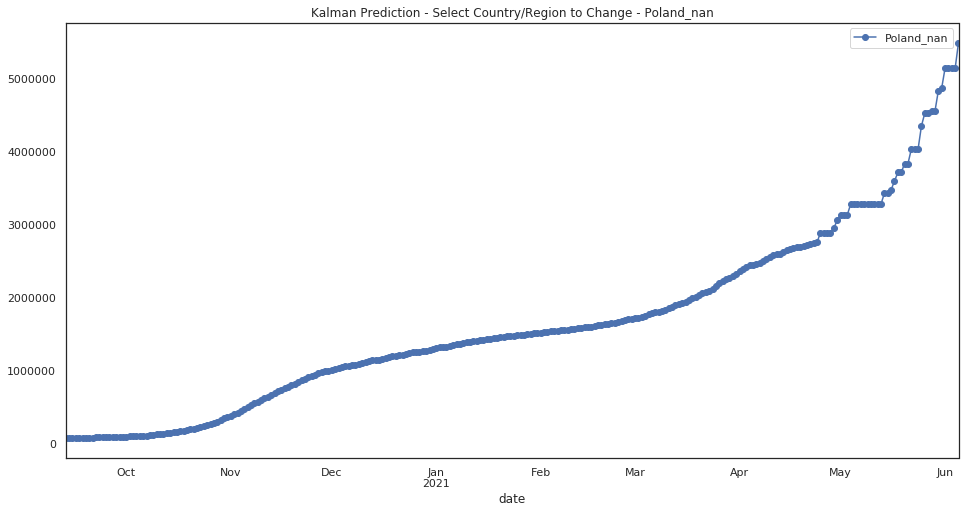

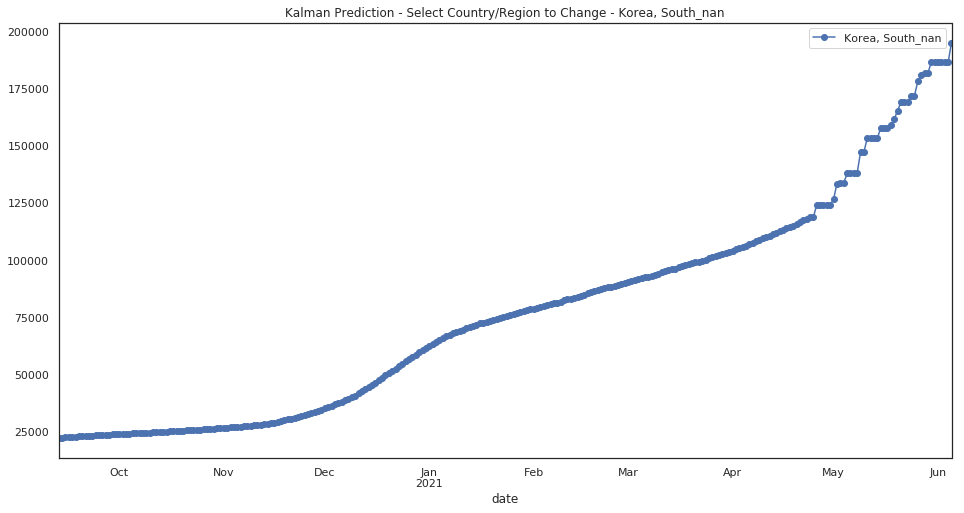

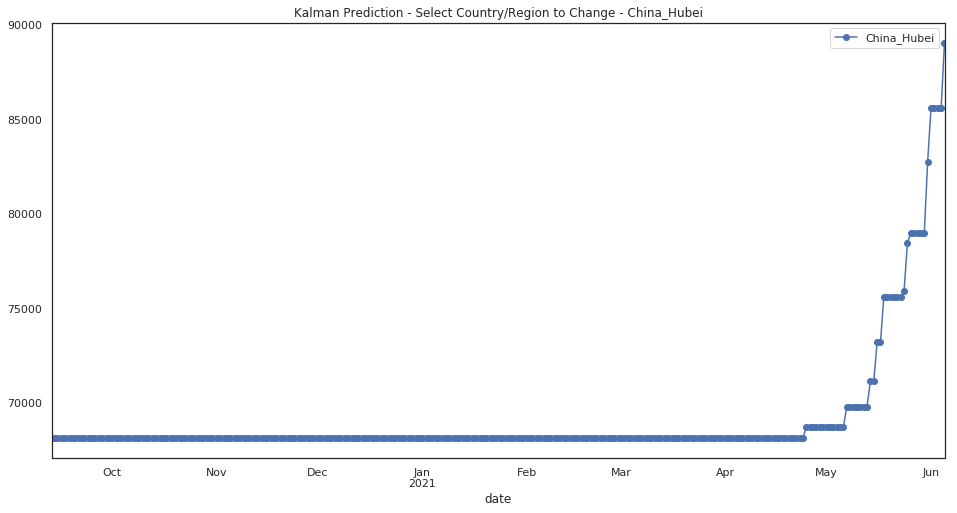

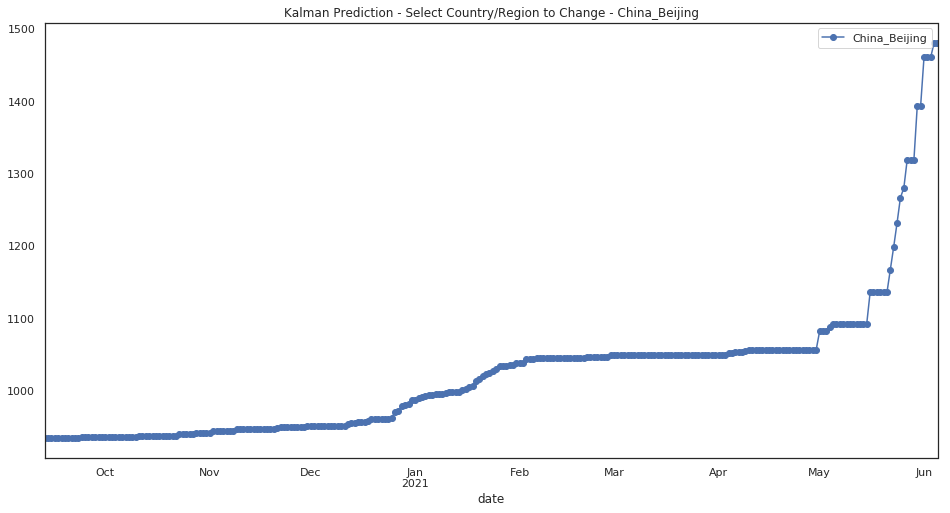

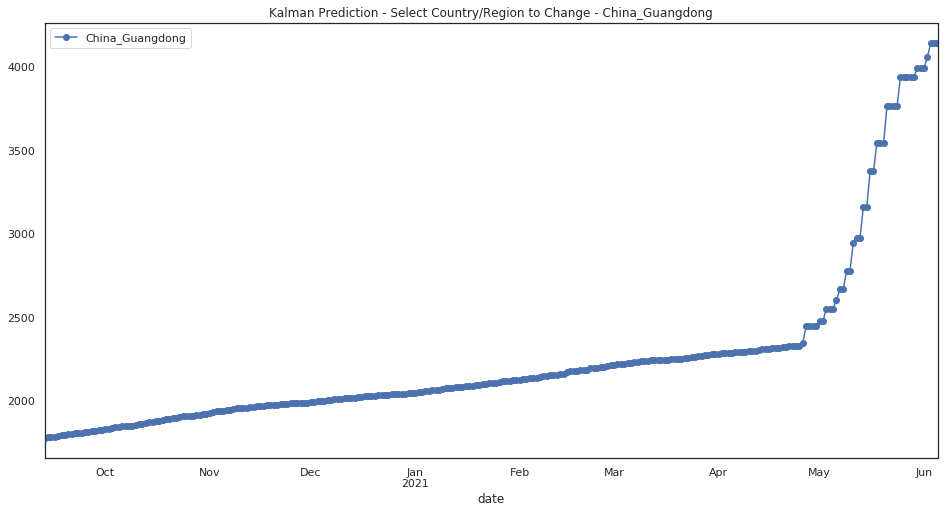

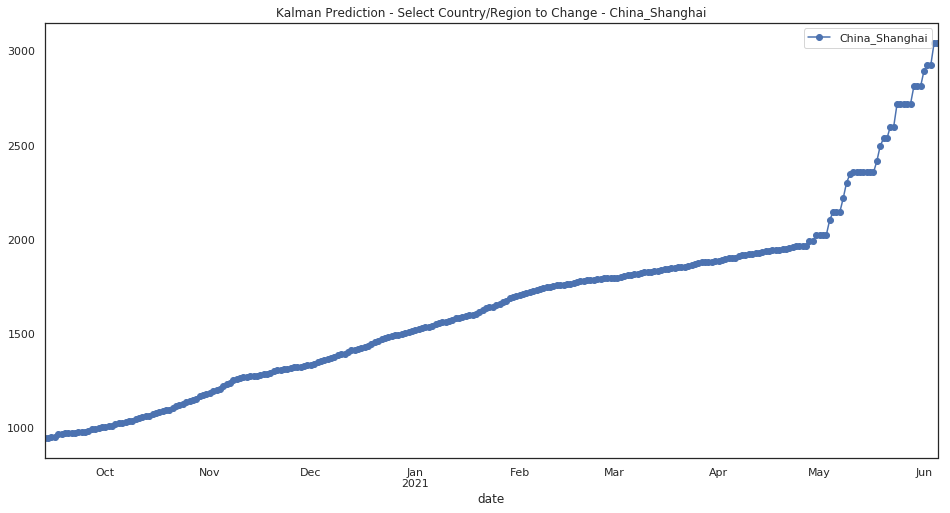

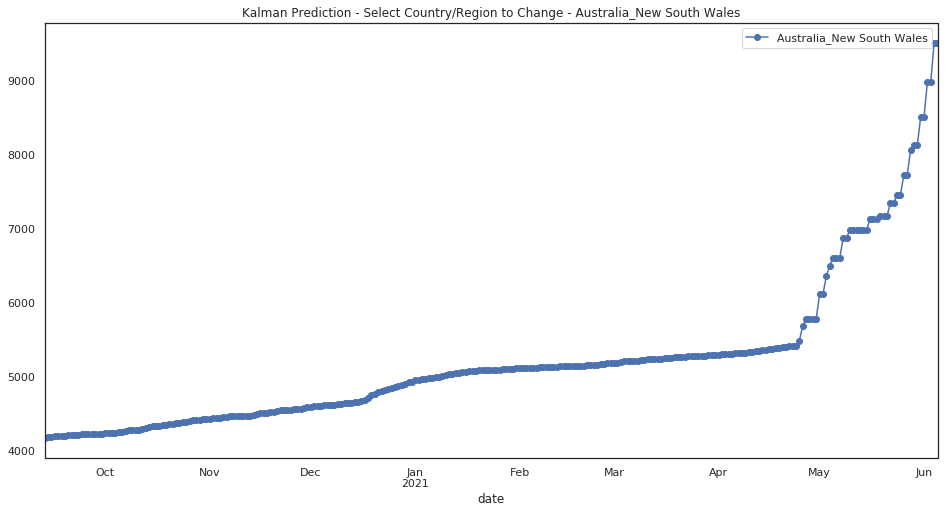

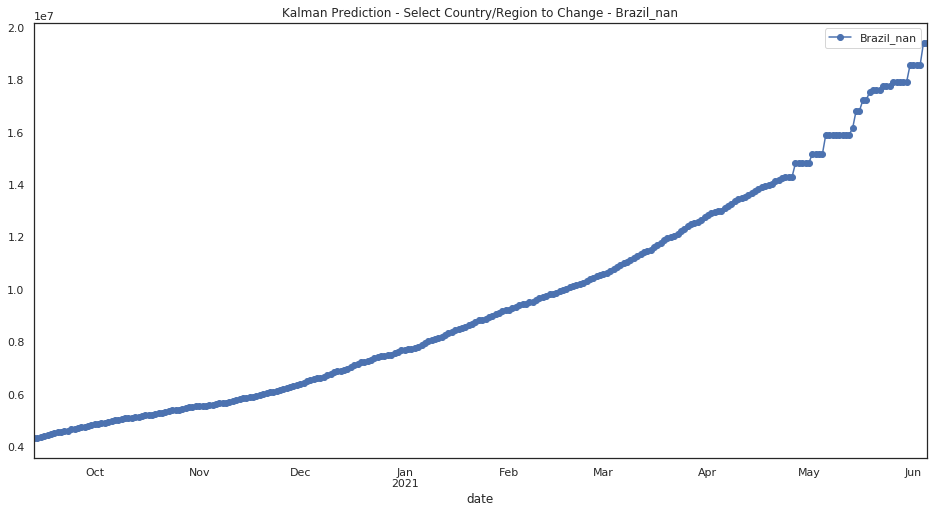

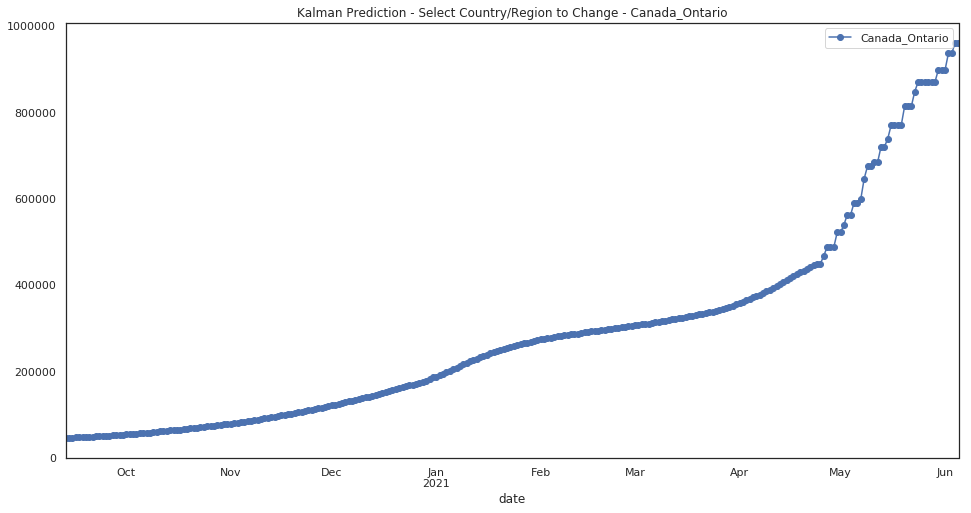

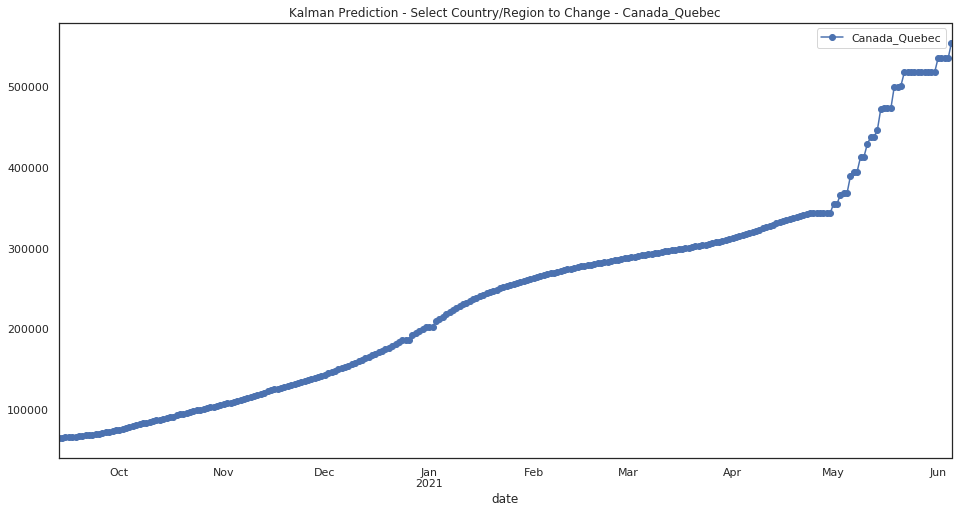

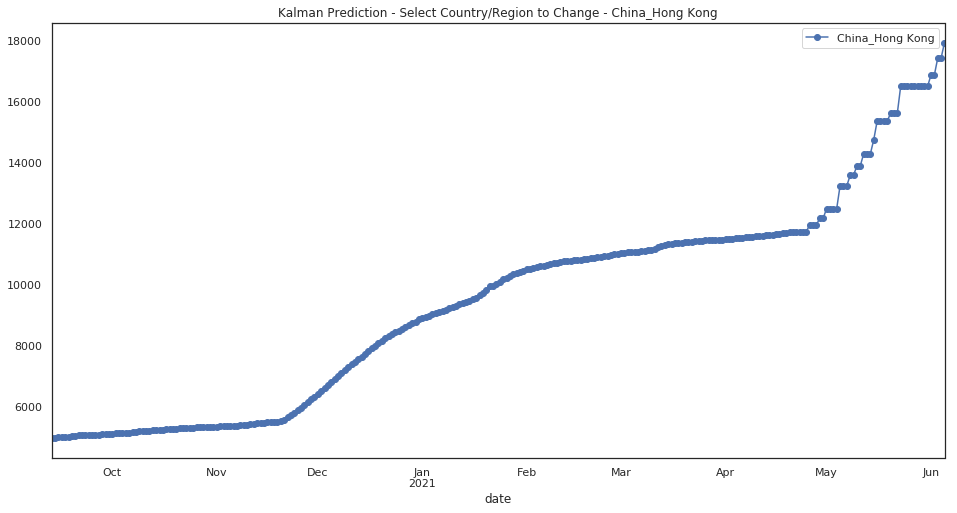

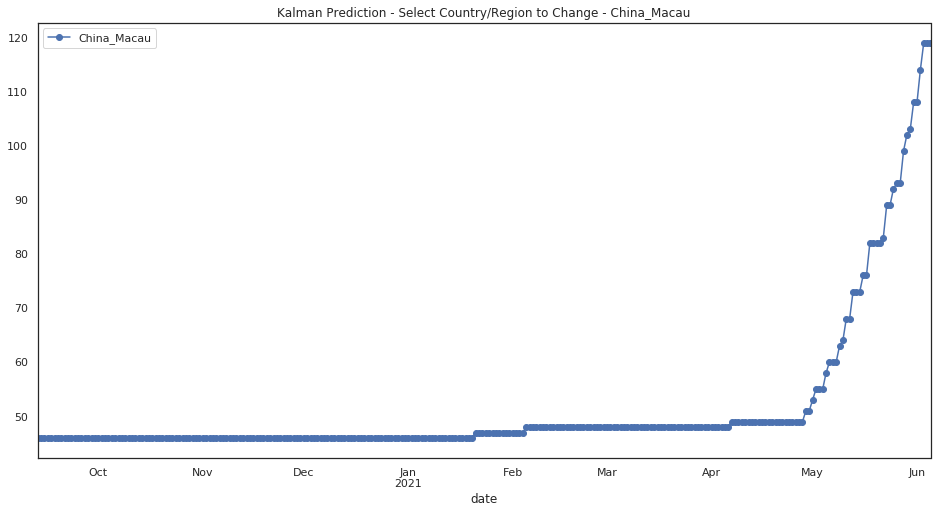

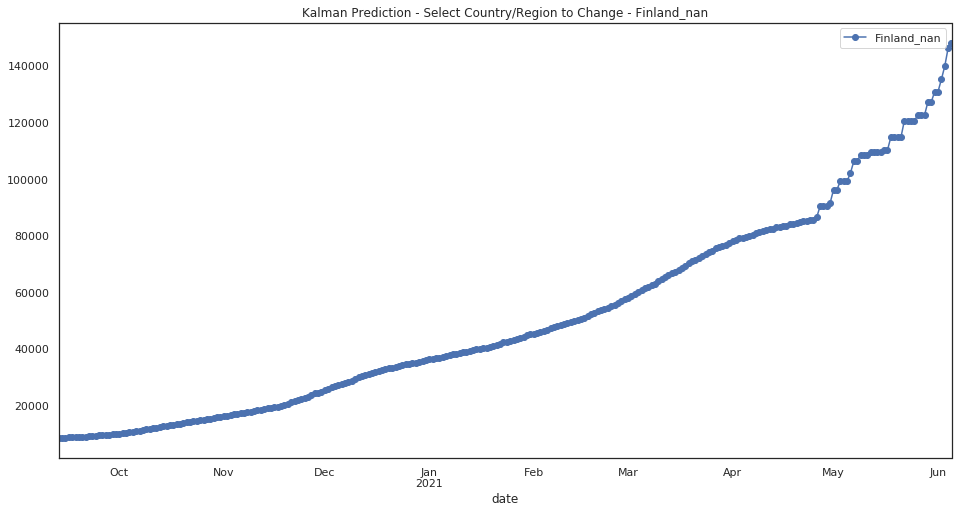

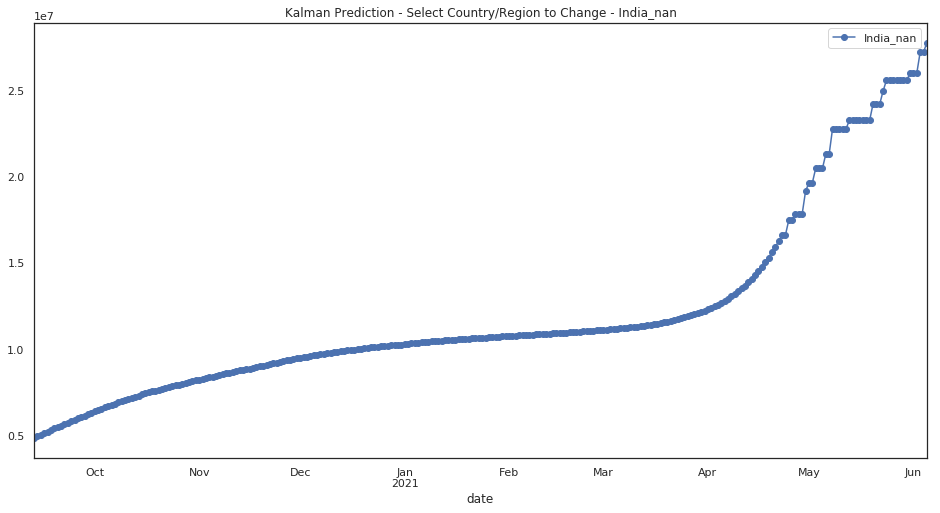

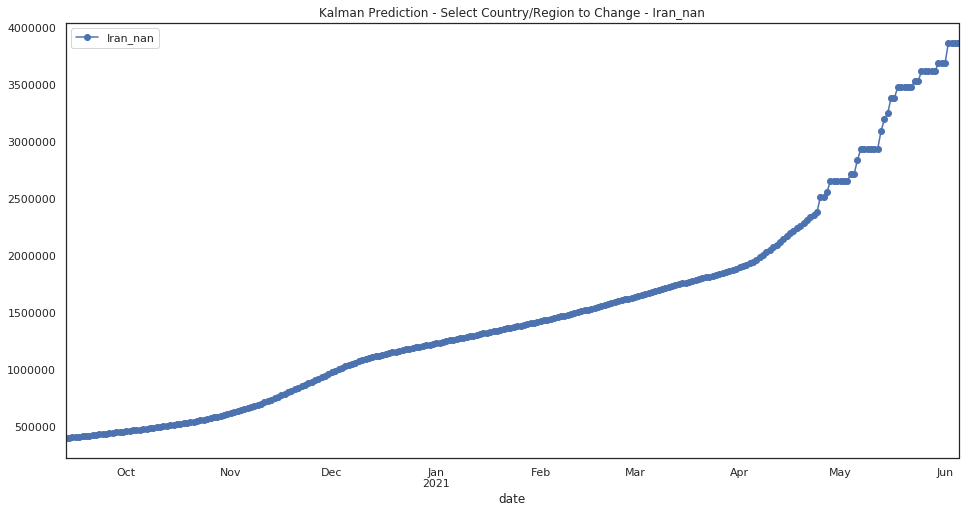

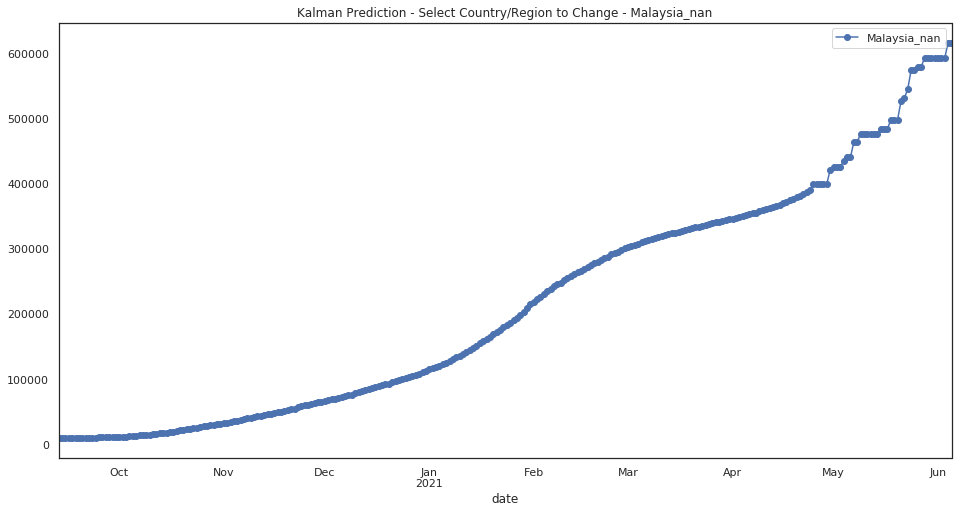

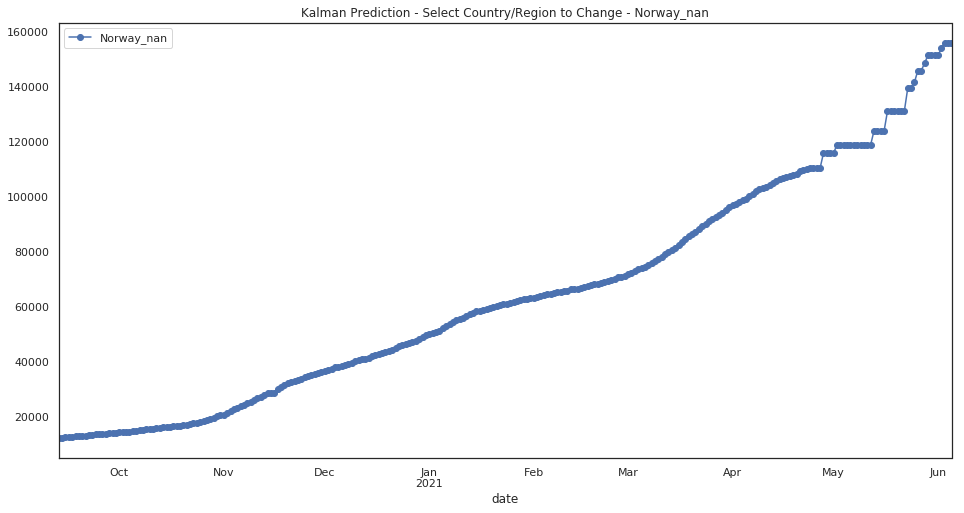

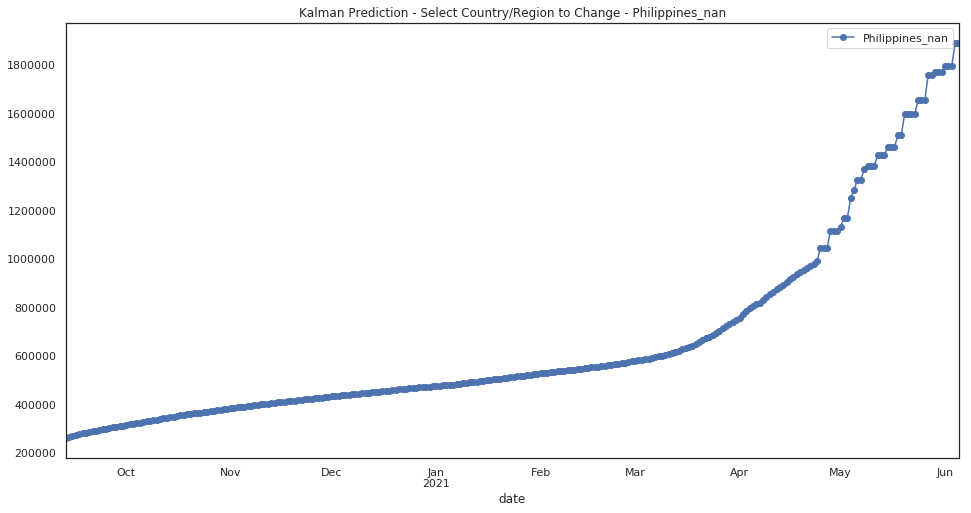

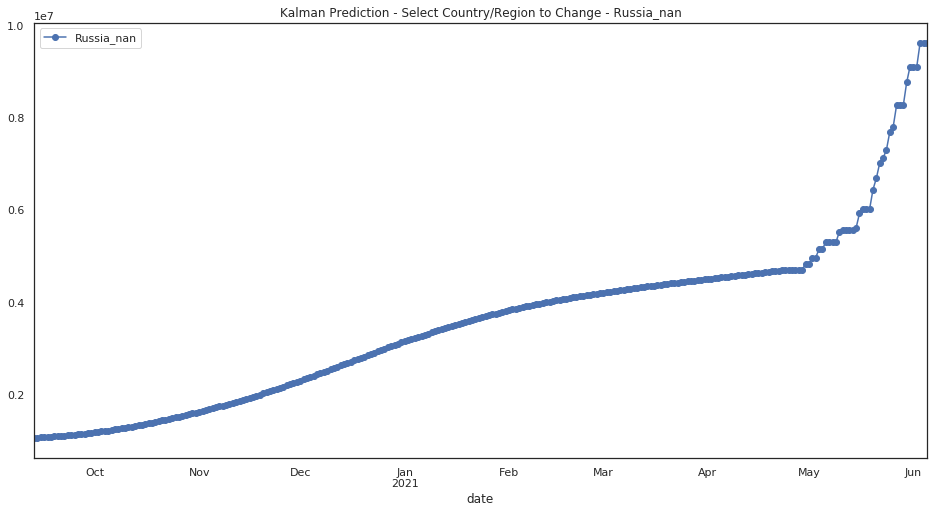

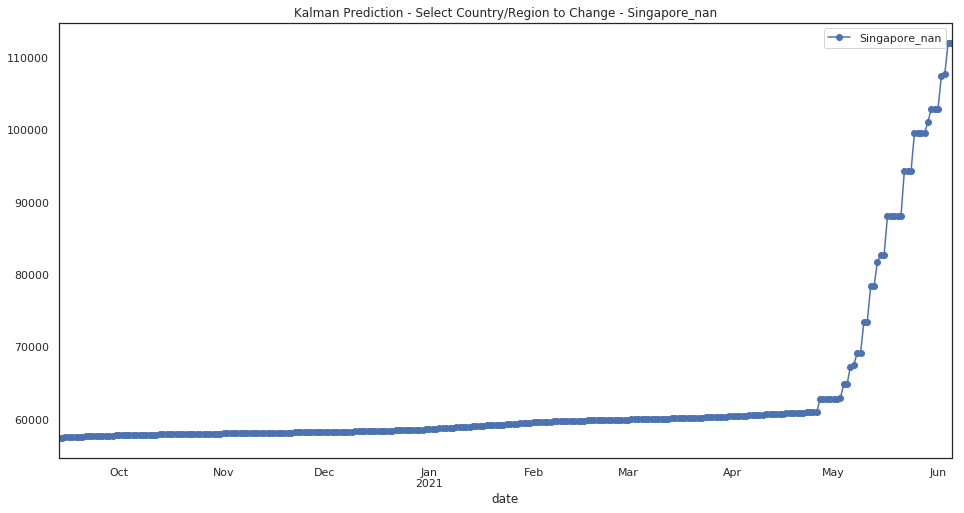

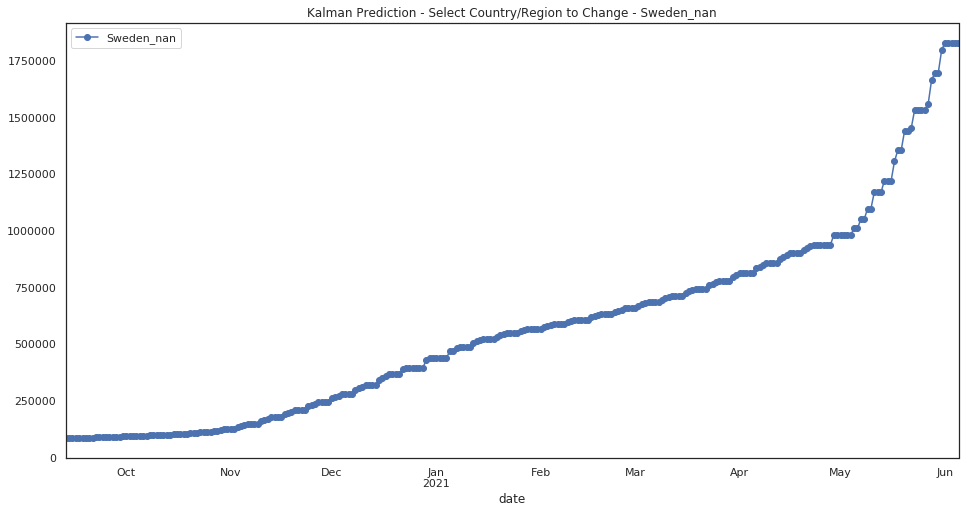

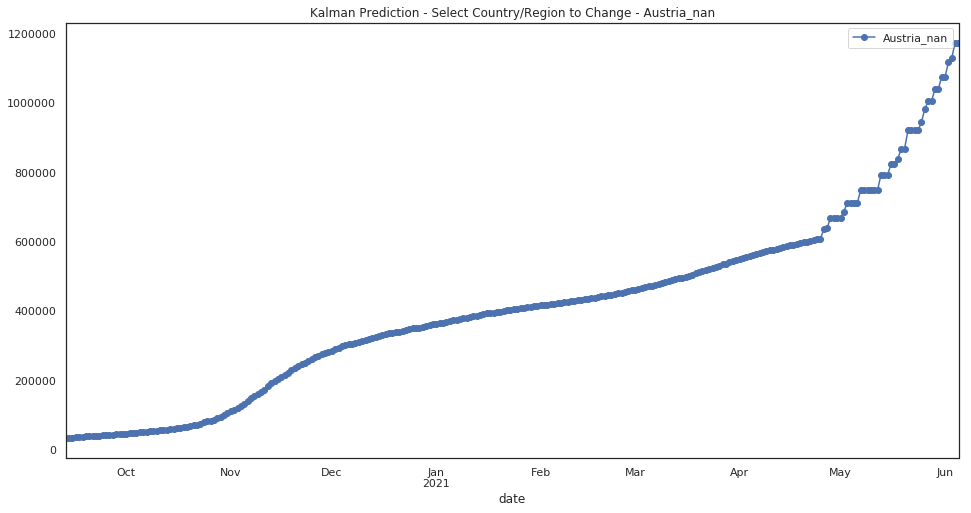

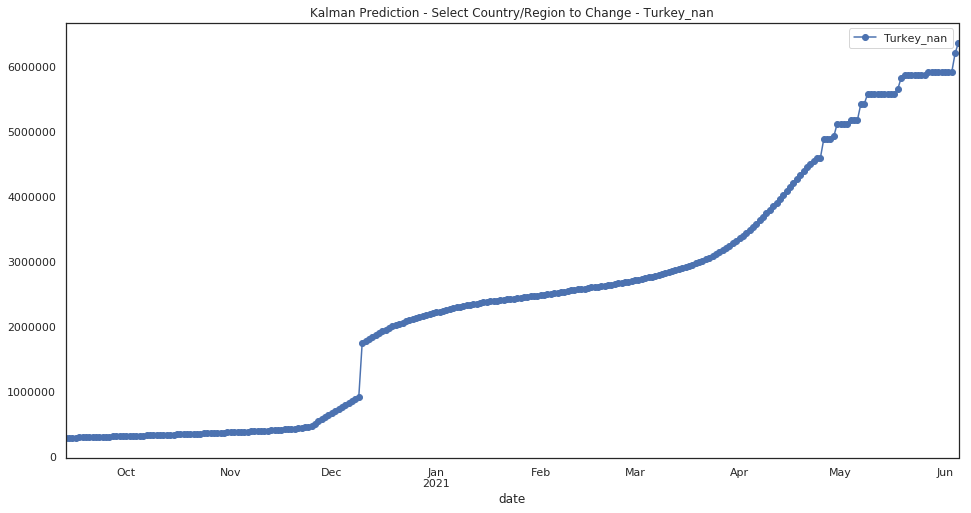

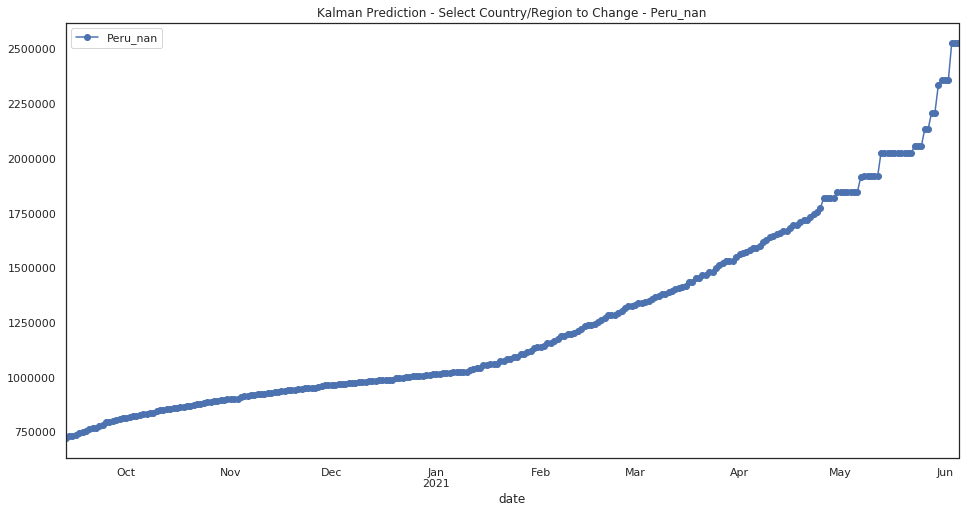

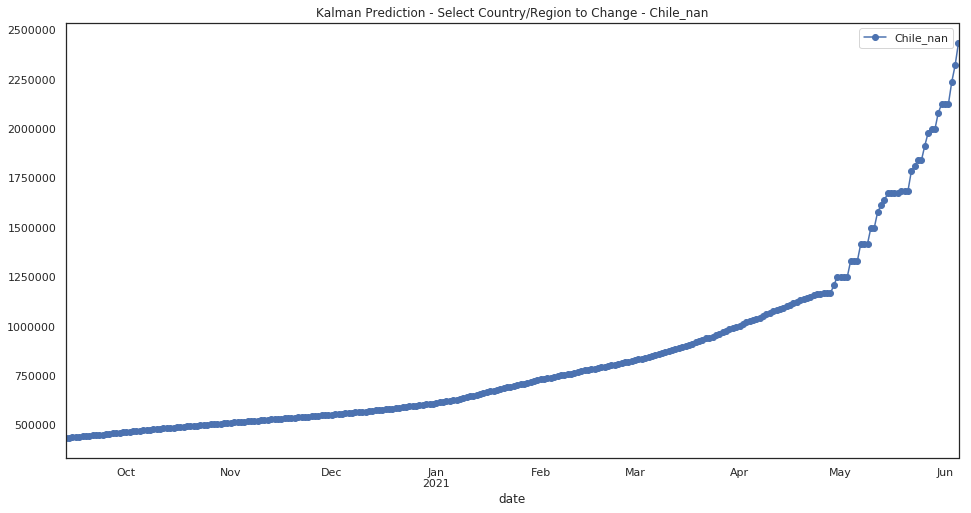

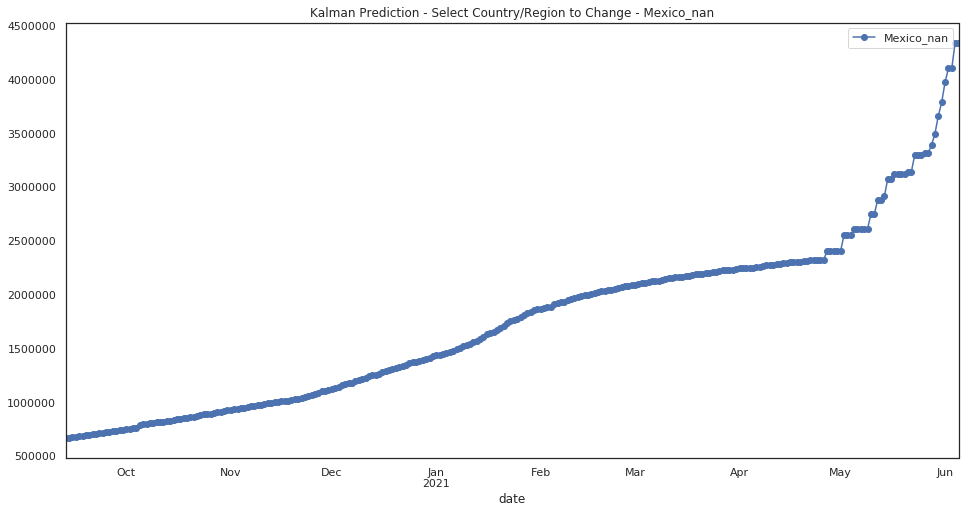

In [67]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [68]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2021-06-05 00:00:00
dtype: object


0  pred_confirmed
United States_nan                                   NaN      79274310.0
India_nan                                           NaN      27798139.0
Brazil_nan                                          NaN      19425758.0
United Kingdom_nan                                  NaN       9709651.0
Russia_nan                                          NaN       9624811.0
France_nan                                          NaN       9106559.0
Turkey_nan                                          NaN       6363810.0
Germany_nan                                         NaN       5770438.0
Italy_nan                                           NaN       5512841.0
Poland_nan                                          NaN       5489004.0
Ukraine_nan                                         NaN       5488984.0
Colombia_nan                                        NaN       4714046.0
Spain_nan                                           NaN       4584535.0
Mexico_nan                                          NaN       4343360.0
Iran_nan                                            NaN       3864738.0
Argentina_nan                                       NaN       3712774.0
Czechia_nan                                         NaN       2835519.0
Peru_nan                                            NaN       2529305.0
Netherlands_nan                                     NaN       2517432.0
Chile_nan                                           NaN       2435318.0
Indonesia_nan                                       NaN       2327094.0
South Africa_nan                                    NaN       2235326.0
Belgium_nan                                         NaN       1982781.0
Philippines_nan                                     NaN       1891009.0
Sweden_nan                                          NaN       1828942.0
Romania_nan                                         NaN       1711955.0
Israel_nan                                          NaN       1626902.0
Iraq_nan                                            NaN       1547347.0
Portugal_nan                                        NaN       1289018.0
Pakistan_nan                                        NaN       1209708.0
...                                                 ...             ...
Grenada_nan                                         NaN           290.0
Australia_Northern Territory                        NaN           282.0
China_Hainan                                        NaN           278.0
Netherlands_Bonaire, Sint Eustatius and Saba        NaN           267.0
Australia_Australian Capital Territory              NaN           247.0
United Kingdom_Anguilla                             NaN           208.0
France_New Caledonia                                NaN           206.0
Fiji_nan                                            NaN           199.0
Canada_Yukon                                        NaN           185.0
China_Macau                                         NaN           119.0
China_Ningxia                                       NaN           109.0
United Kingdom_Falkland Islands (Malvinas)          NaN            83.0
Denmark_Greenland                                   NaN            69.0
Canada_Northwest Territories                        NaN            66.0
Saint Kitts and Nevis_nan                           NaN            58.0
Holy See_nan                                        NaN            36.0
China_Qinghai                                       NaN            33.0
Solomon Islands_nan                                 NaN            32.0
France_Saint Pierre and Miquelon                    NaN            30.0
United Kingdom_Montserrat                           NaN            29.0
Canada_Grand Princess                               NaN            28.0
Canada_Repatriated Travellers                       NaN            25.0
MS Zaandam_nan                                      NaN             9.0
United Kingdom_Saint Helena, Ascension and Tris...  NaN             4.0
Marshall Islands_nan  

In [69]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [70]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [71]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [72]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [73]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [74]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-09-13          51448.0      27850.0      59673.0      19219.0   
2020-09-14          51496.0      27994.0      59882.0      19300.0   
2020-09-15          38772.0      11520.0      48496.0       1438.0   
2020-09-16          38815.0      11672.0      48734.0       1438.0   
2020-09-17          38855.0      11816.0      48966.0       1483.0   
2020-09-18          38872.0      11948.0      49194.0       1483.0   
2020-09-19          38897.0      12073.0      49413.0       1564.0   
2020-09-20          38919.0      12226.0      49623.0       1564.0   
2020-09-21          39164.0      12483.0      50077.0       1841.0   
2020-09-22          39190.0      12635.0      50269.0       1681.0   
2020-09-23          39237.0      12775.0      50456.0       1949.0   
2020-09-24          39255.0      12912.0      50636.0       1753.0   
2020-09-25          39271.0      13021.0      50812.0       1975.0   
2020-09-26          39279.0      13141.0      50975.0       1836.0   
2020-09-27          39305.0      13263.0      51128.0       1987.0   
2020-09-28          39327.0      13391.0      51274.0       2099.0   
2020-09-29          39343.0      13495.0      51427.0       1966.0   
2020-09-30          39358.0      13635.0      51591.0       2221.0   
2020-10-01          39374.0      13790.0      51755.0       2050.0   
2020-10-02          39382.0      13929.0      51915.0       2230.0   
2020-10-03          39388.0      14087.0      52065.0       2110.0   
2020-10-04          39426.0      14247.0      52205.0       2205.0   
2020-10-05          39505.0      14392.0      52338.0       2430.0   
2020-10-06          39576.0      14550.0      52465.0       2370.0   
2020-10-07          39642.0      14700.0      52586.0       2801.0   
2020-10-08          39709.0      14867.0      52721.0       2568.0   
2020-10-09          39780.0      15034.0      52870.0       2872.0   
2020-10-10          39796.0      15203.0      53011.0       2696.0   
2020-10-11          39873.0      15374.0      53145.0       2829.0   
2020-10-12          39948.0      15542.0      53381.0       3087.0   
...                     ...          ...          ...          ...   
2021-05-08          76231.0     150544.0     147374.0      15269.0   
2021-05-09          77950.0     153190.0     146139.0      15420.0   
2021-05-10          77100.0     155122.0     145202.0      15420.0   
2021-05-11          77454.0     154635.0     145202.0      15754.0   
2021-05-12          81701.0     156898.0     145202.0      16261.0   
2021-05-13          84260.0     158561.0     150520.0      16261.0   
2021-05-14          86383.0     160415.0     154181.0      16918.0   
2021-05-15          88177.0     162225.0     152129.0      16918.0   
2021-05-16          87048.0     166607.0     159794.0      17332.0   
2021-05-17          88304.0     170623.0     167533.0      17332.0   
2021-05-18          88740.0     168184.0     166978.0      17332.0   
2021-05-19          88740.0     168184.0     165563.0      17947.0   
2021-05-20          88740.0     168184.0     165563.0      17947.0   
2021-05-21          88740.0     168184.0     175746.0      18356.0   
2021-05-22          90158.0     168184.0     182676.0      19023.0   
2021-05-23          94714.0     169330.0     181097.0      19209.0   
2021-05-24          96229.0     170964.0     183939.0      20162.0   
2021-05-25          98172.0     171745.0     192048.0      20445.0   
2021-05-26          99667.0     172759.0     198767.0      21543.0   
2021-05-27          98419.0     172155.0     194519.0      22492.0   
2021-05-28          98419.0     177369.0     203927.0      22986.0   
2021-05-29          98419.0     180703.0     210471.0      24129.0   
2021-05-30         104294.0     178561.0     209739.0      24129.0   
2021-05-31         110402.0     178561.0     212724.0      25341.0   
2021-06-01

In [75]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
## 06Aug2020 - For all
pred=pred[:-1]

In [76]:
region1=max_p0[max_p0.columns[0]].astype(str).reset_index().rename(columns={"index": "region"}).get_values()
region=[region[0] for region in region1]
region

['United States_nan',
 'India_nan',
 'Brazil_nan',
 'United Kingdom_nan',
 'Russia_nan',
 'France_nan',
 'Turkey_nan',
 'Germany_nan',
 'Italy_nan',
 'Poland_nan',
 'Ukraine_nan',
 'Colombia_nan',
 'Spain_nan',
 'Mexico_nan',
 'Iran_nan',
 'Argentina_nan',
 'Czechia_nan',
 'Peru_nan',
 'Netherlands_nan',
 'Chile_nan',
 'Indonesia_nan',
 'South Africa_nan',
 'Belgium_nan',
 'Philippines_nan',
 'Sweden_nan',
 'Romania_nan',
 'Israel_nan',
 'Iraq_nan',
 'Portugal_nan',
 'Pakistan_nan',
 'Austria_nan',
 'Bangladesh_nan',
 'Japan_nan',
 'Hungary_nan',
 'Jordan_nan',
 'Serbia_nan',
 'Lebanon_nan',
 'Switzerland_nan',
 'Canada_Ontario',
 'Slovakia_nan',
 'United Arab Emirates_nan',
 'Croatia_nan',
 'Panama_nan',
 'Morocco_nan',
 'Saudi Arabia_nan',
 'Malaysia_nan',
 'Ecuador_nan',
 'Belarus_nan',
 'Bulgaria_nan',
 'Canada_Quebec',
 'Tunisia_nan',
 'Bolivia_nan',
 'Nepal_nan',
 'Greece_nan',
 'Kazakhstan_nan',
 'West Bank and Gaza_nan',
 'Kuwait_nan',
 'Ethiopia_nan',
 'Egypt_nan',
 'Paraguay_

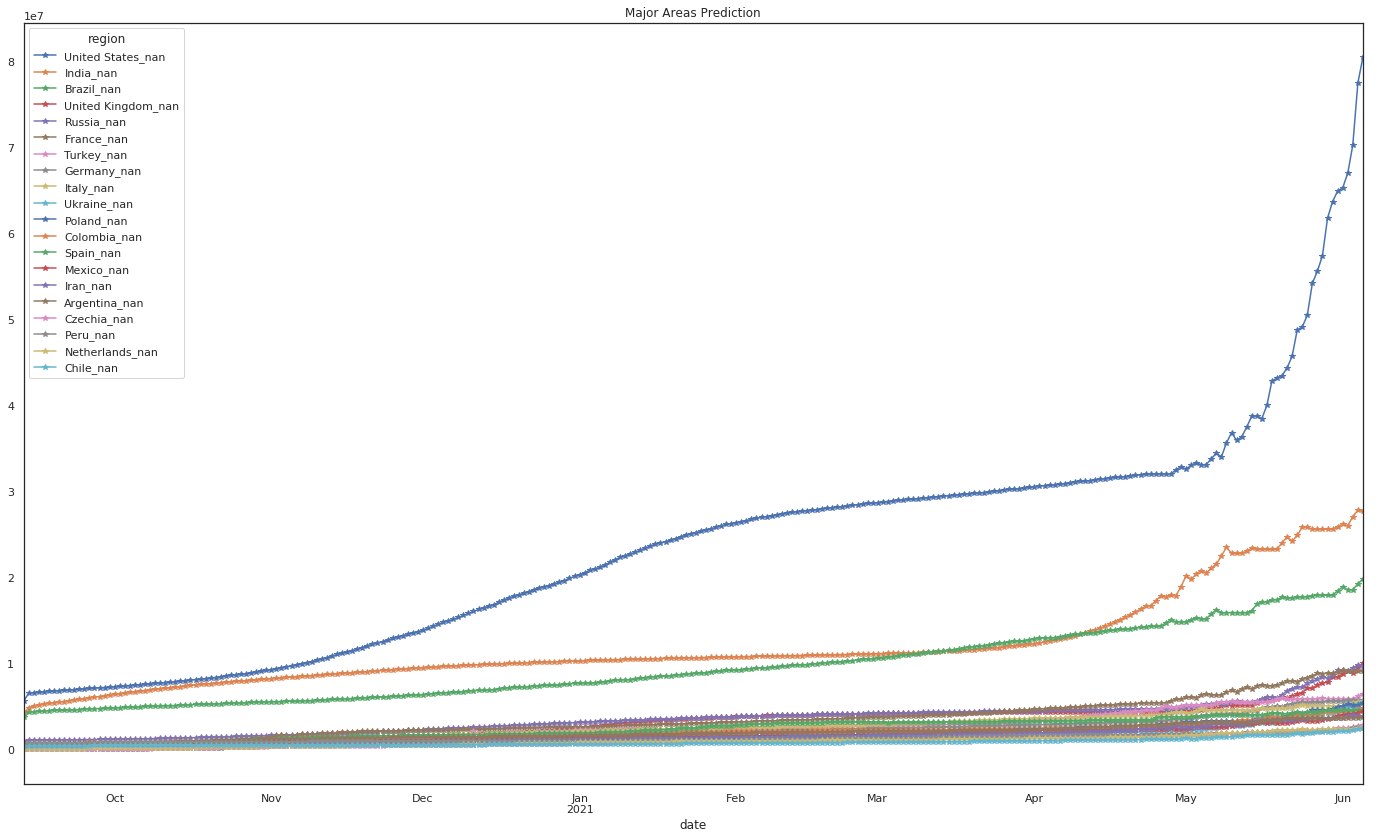

In [77]:
#
p=pred[region[:20]]
p[:].reindex(p.max().sort_values(ascending=False).index, axis=1).plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

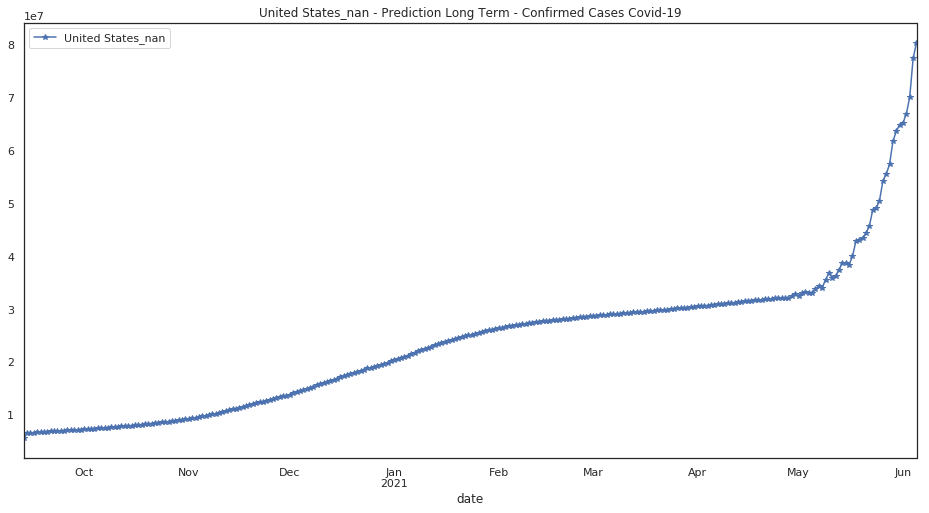

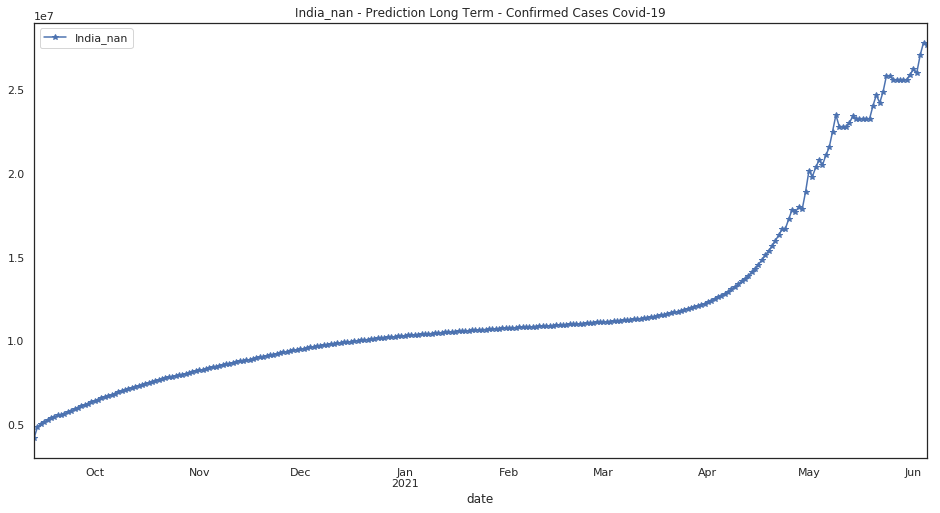

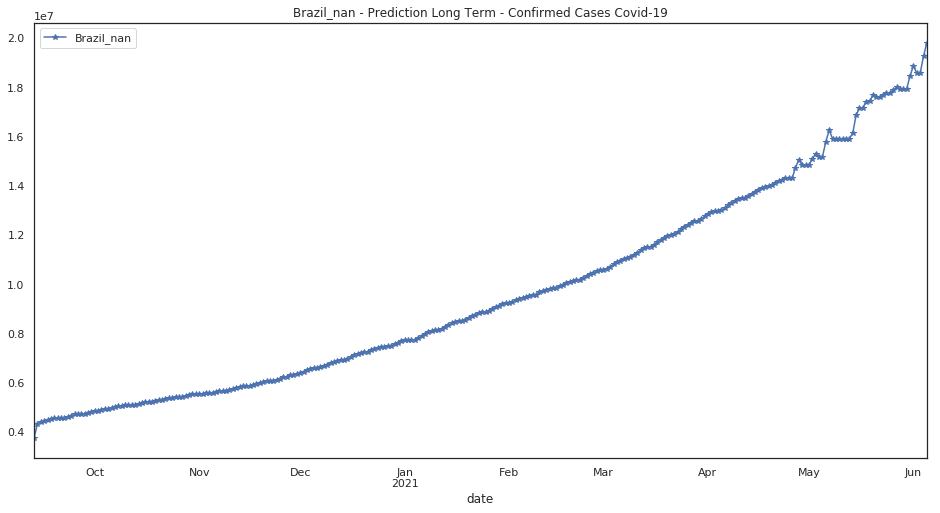

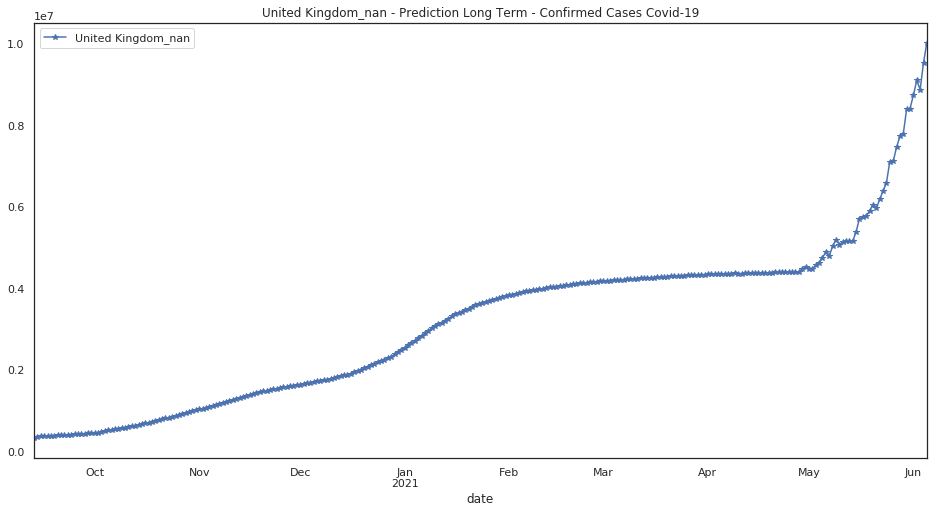

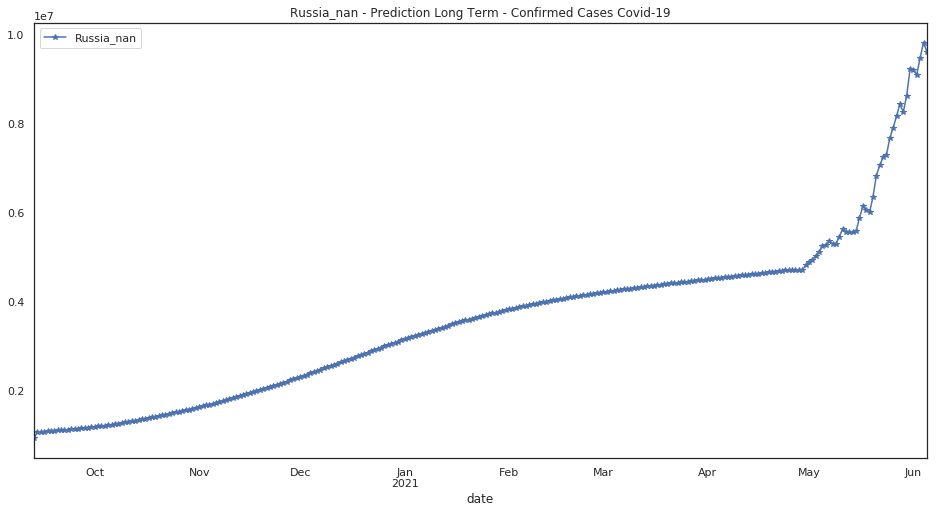

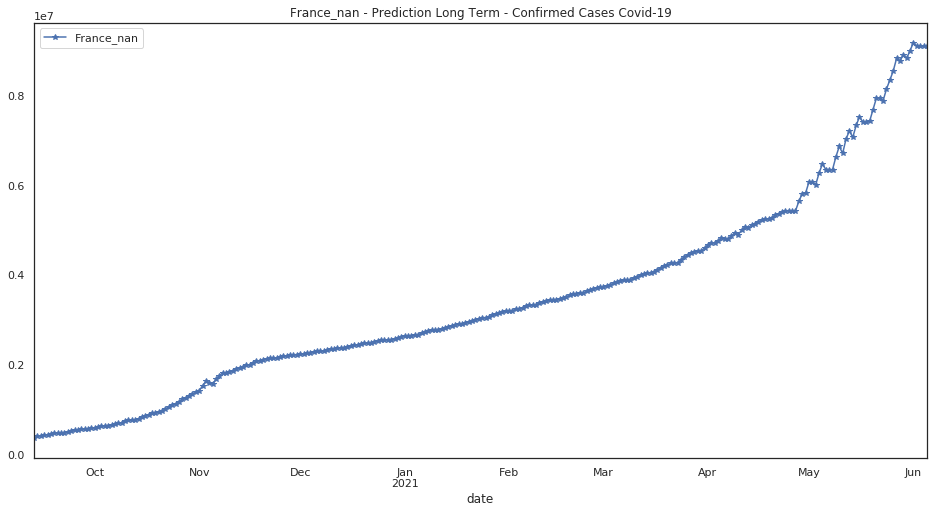

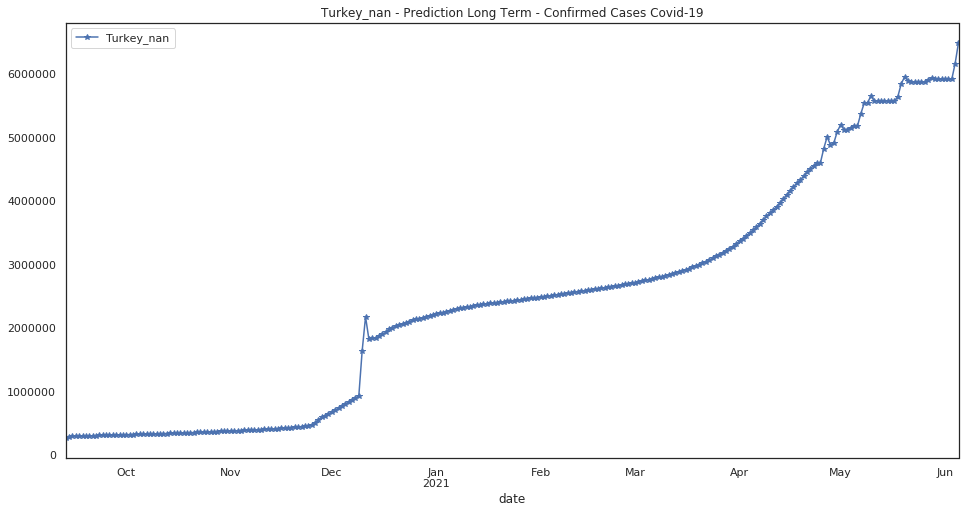

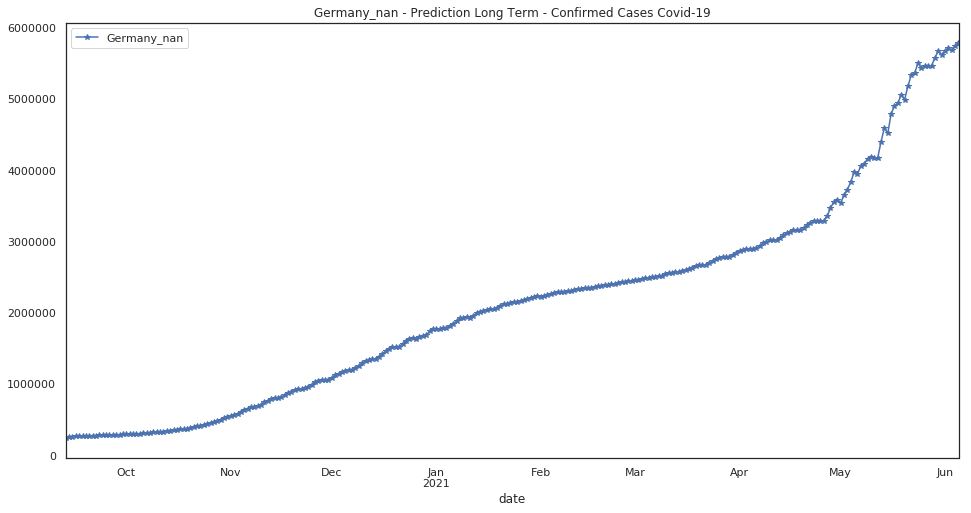

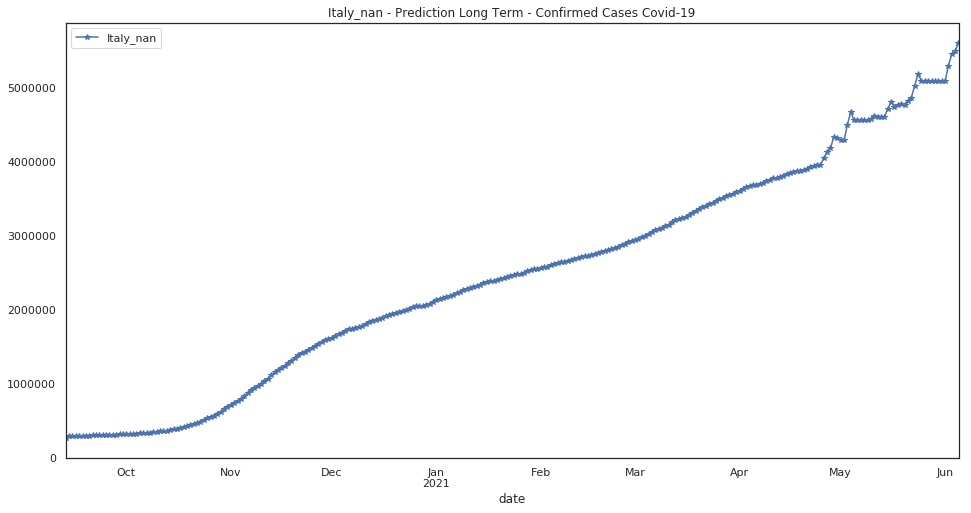

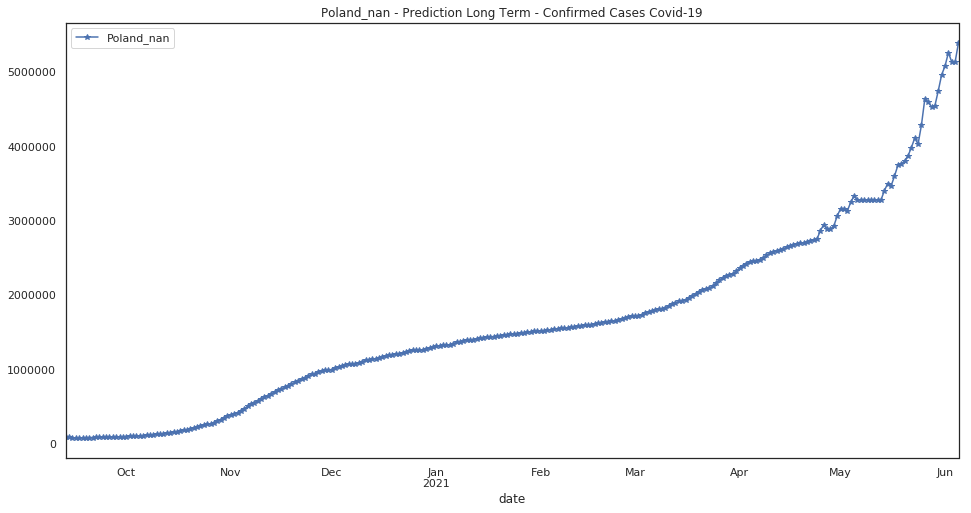

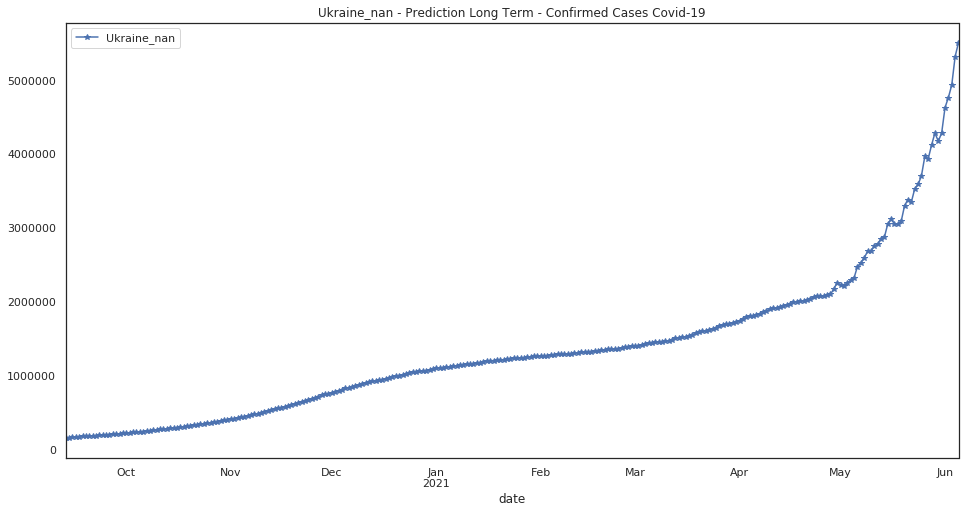

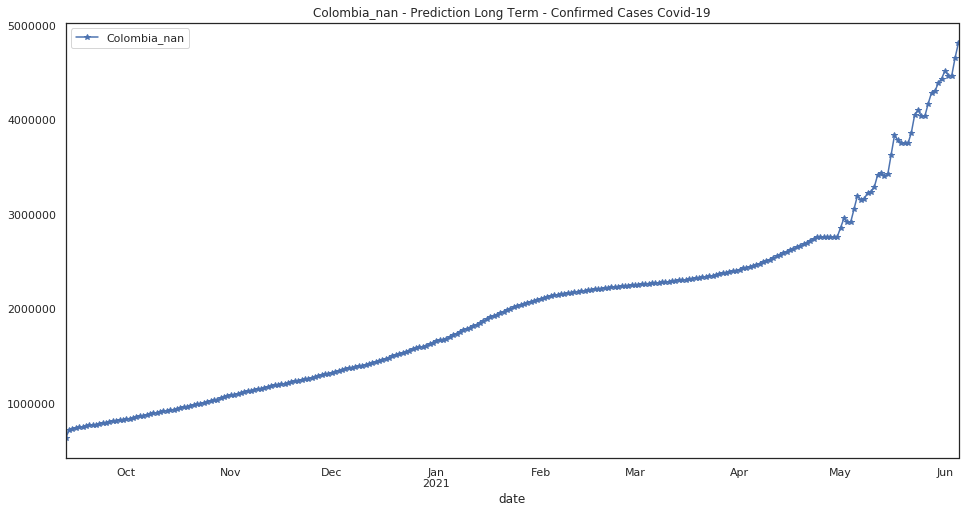

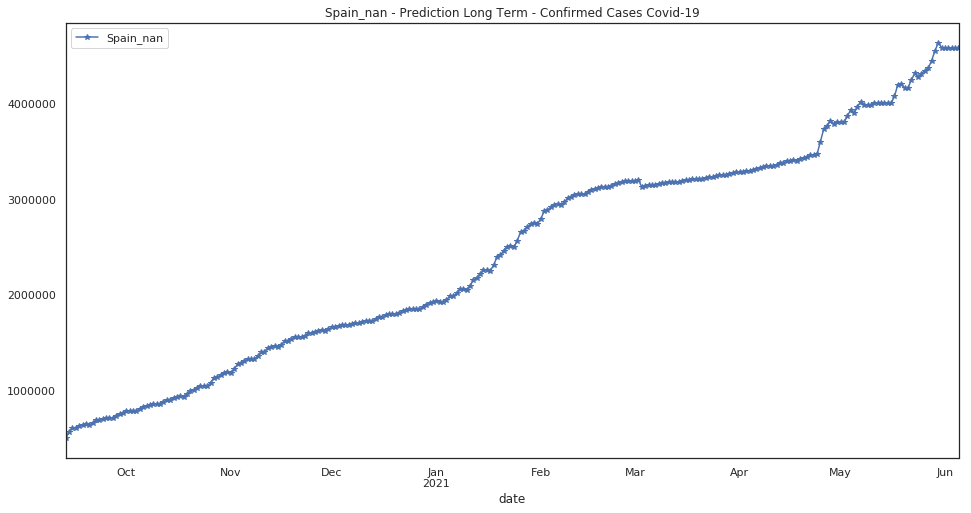

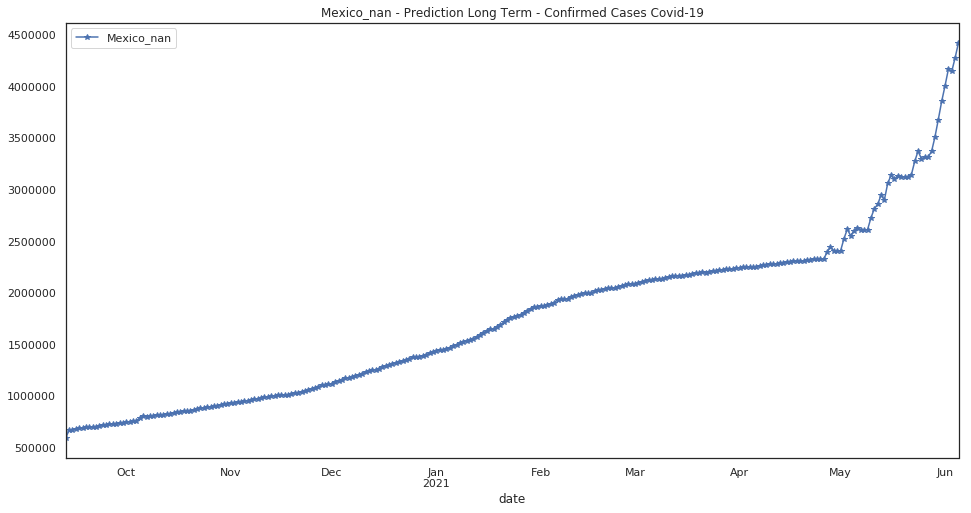

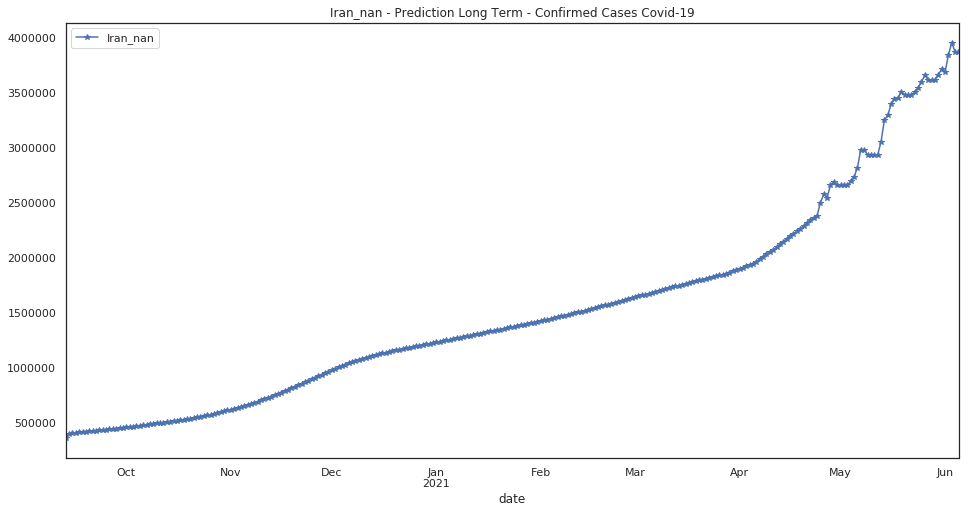

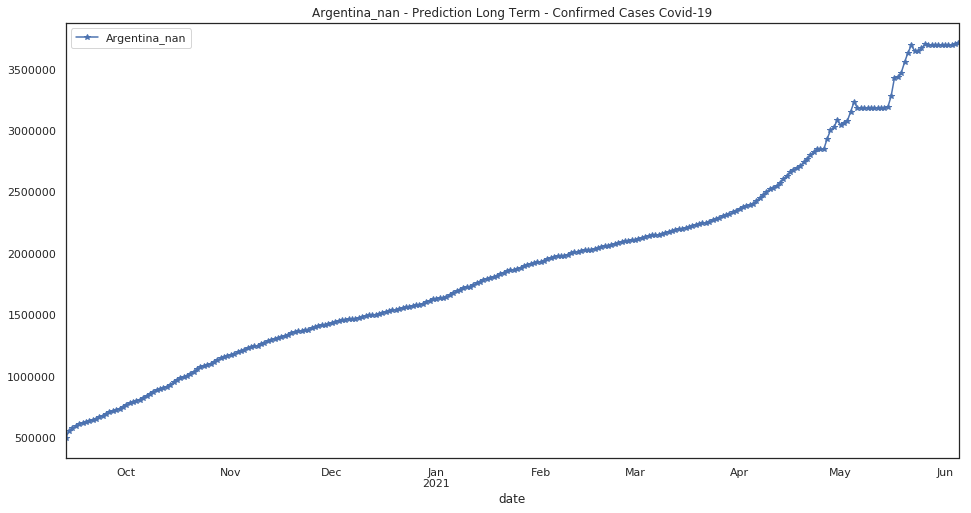

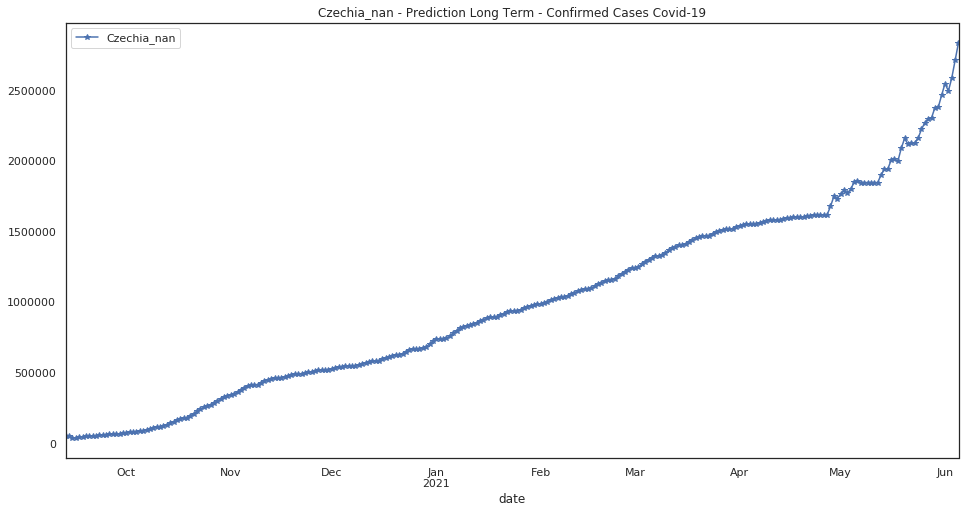

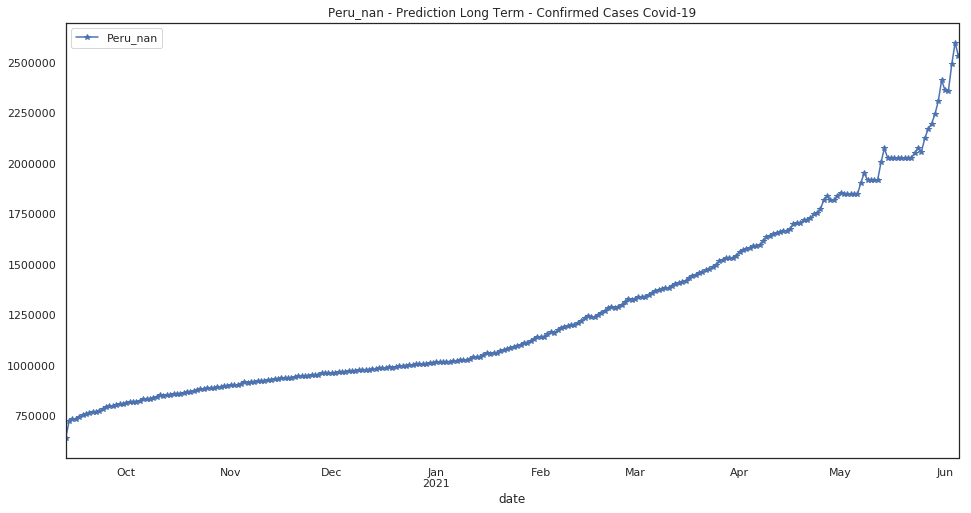

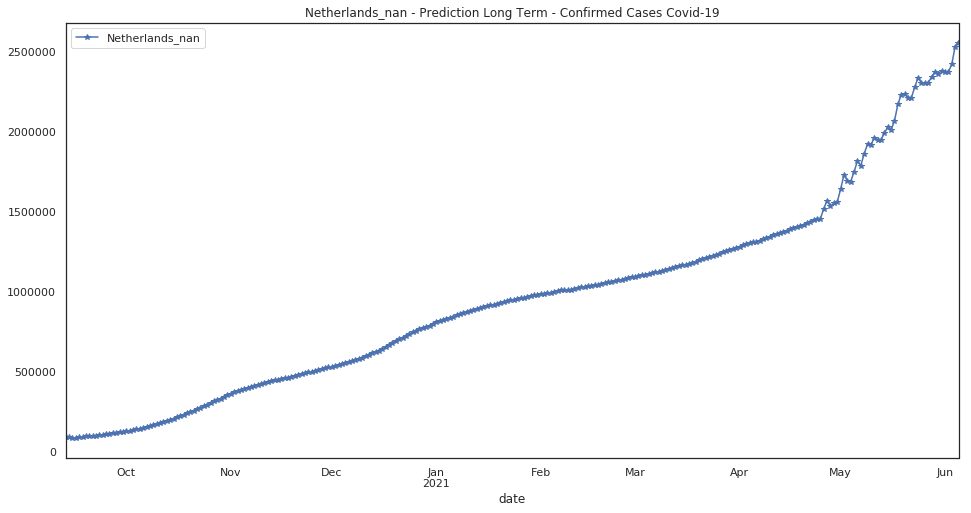

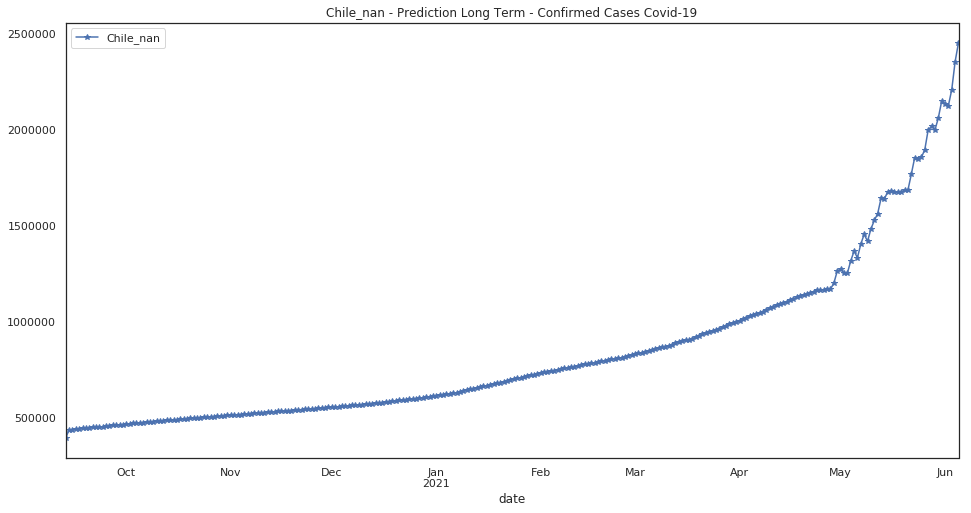

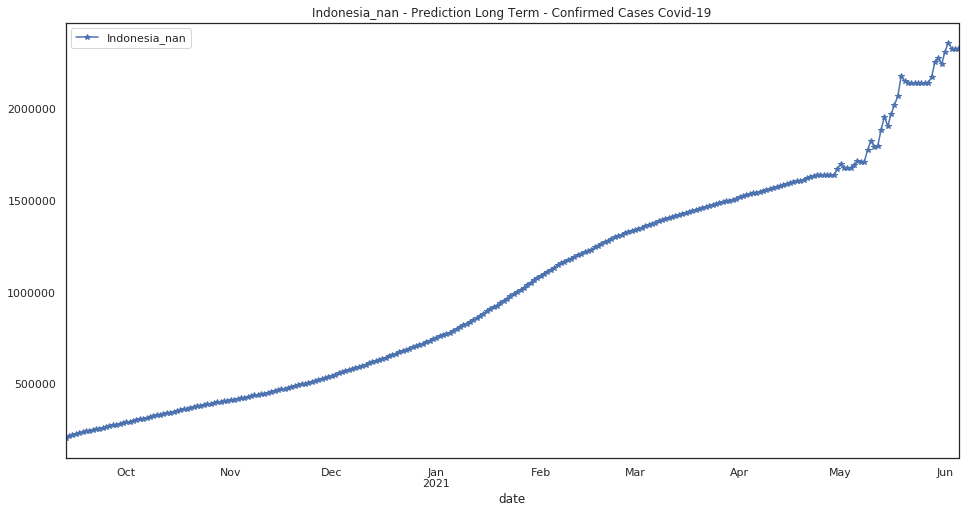

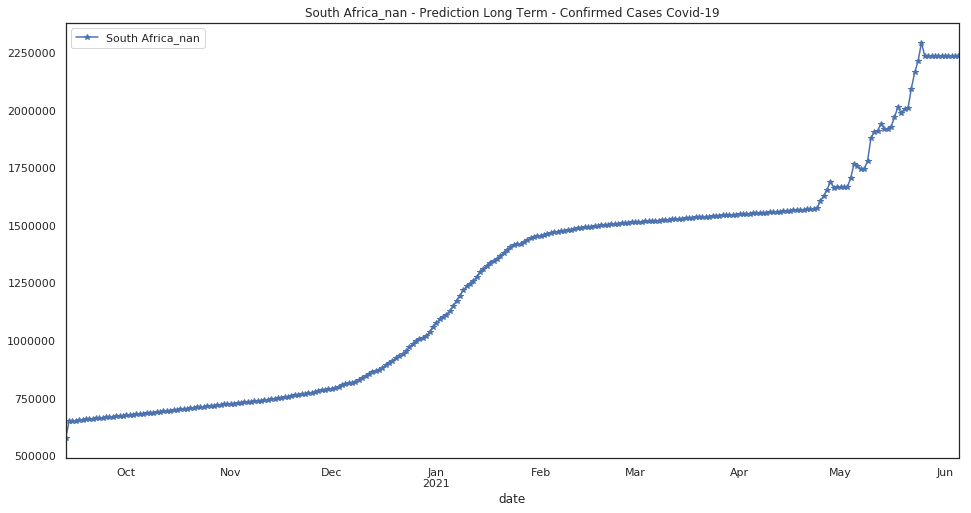

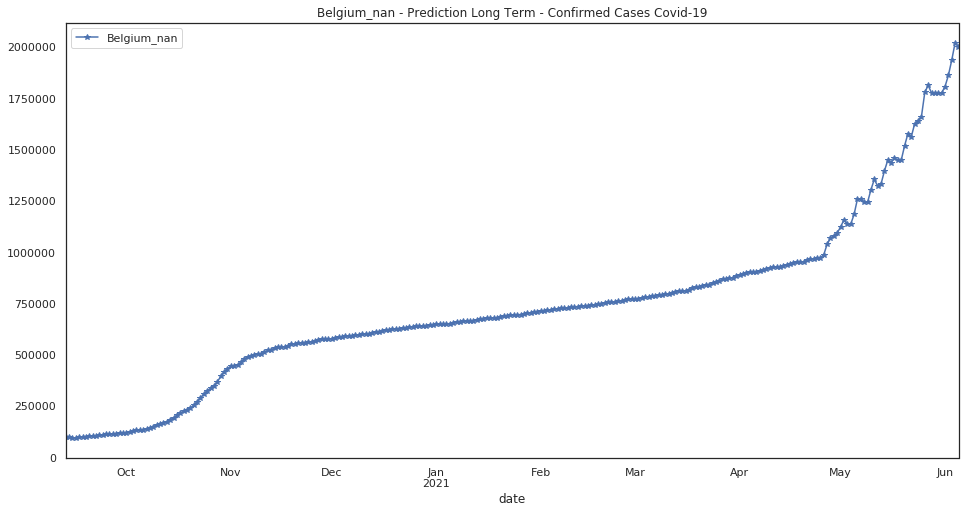

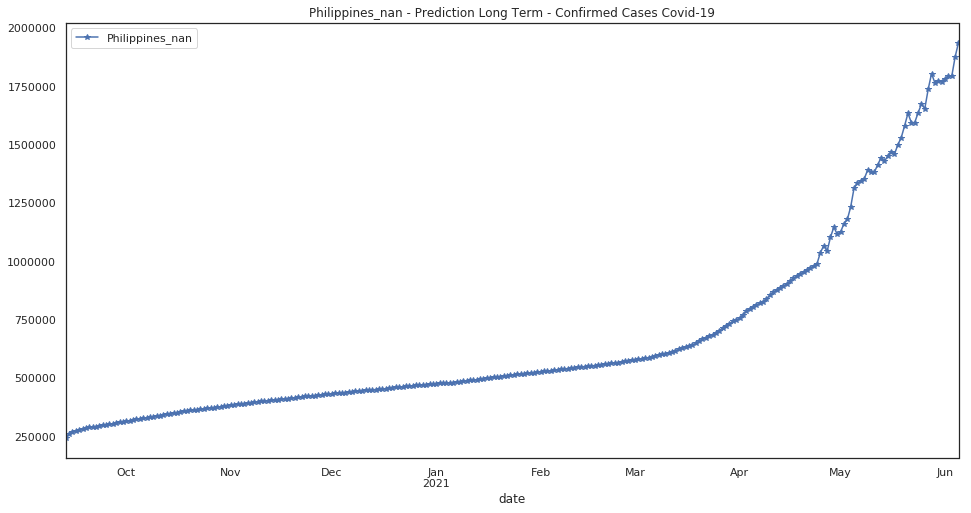

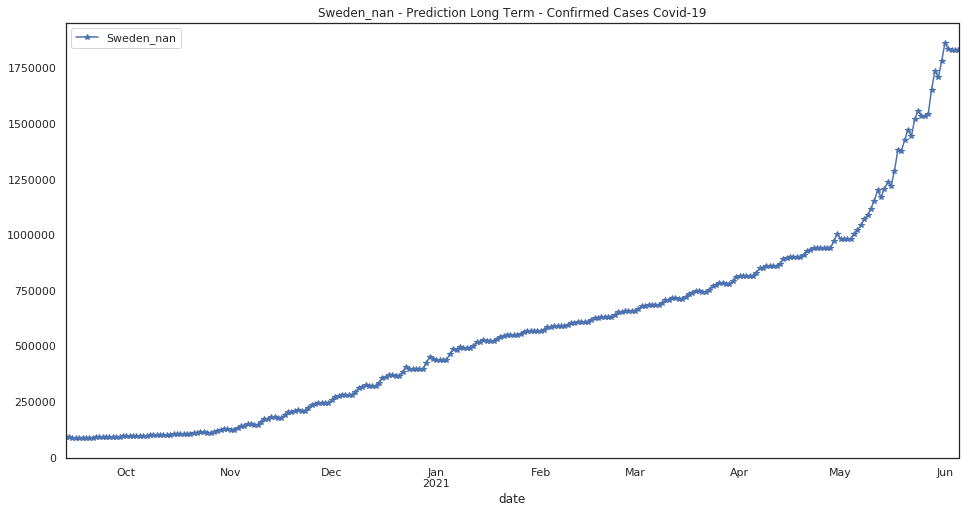

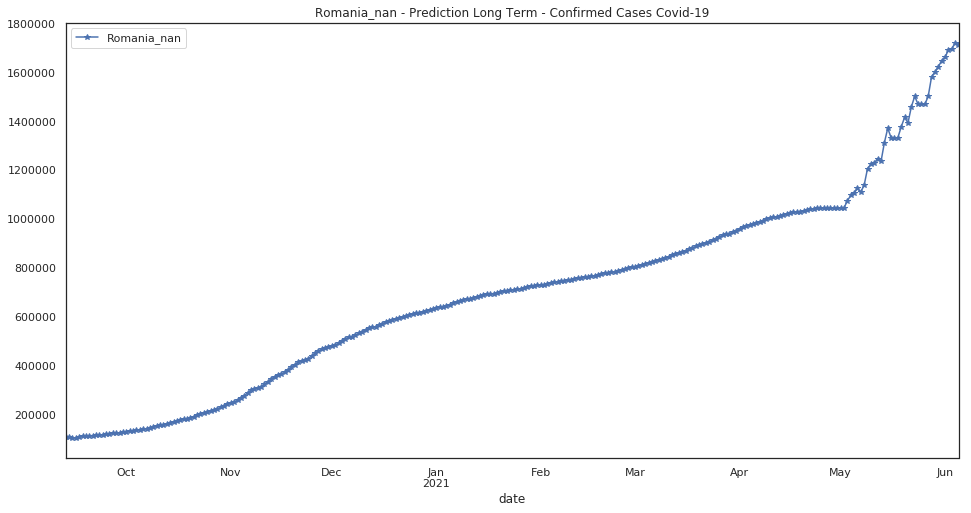

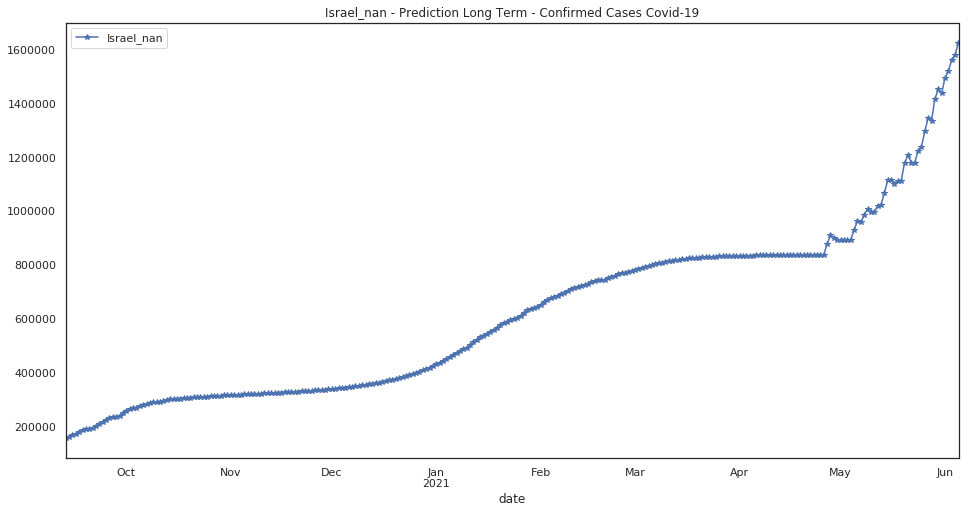

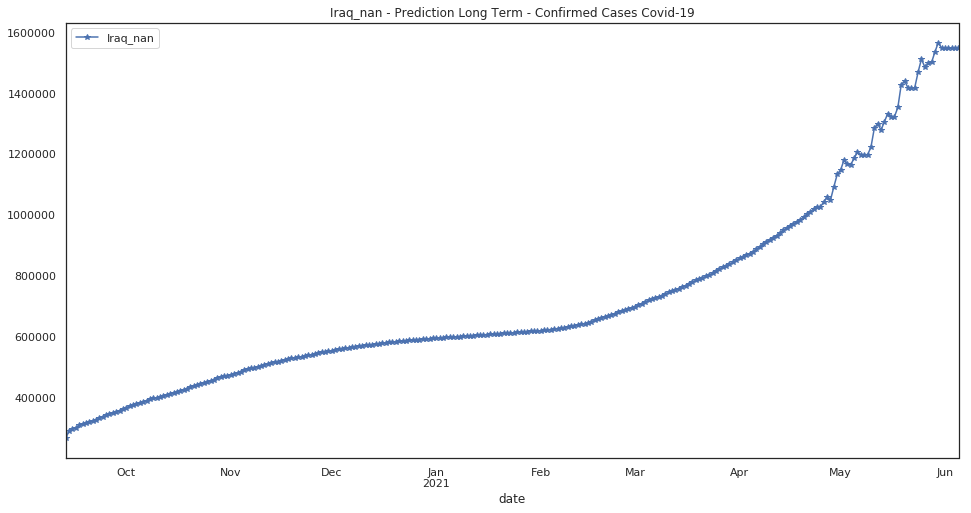

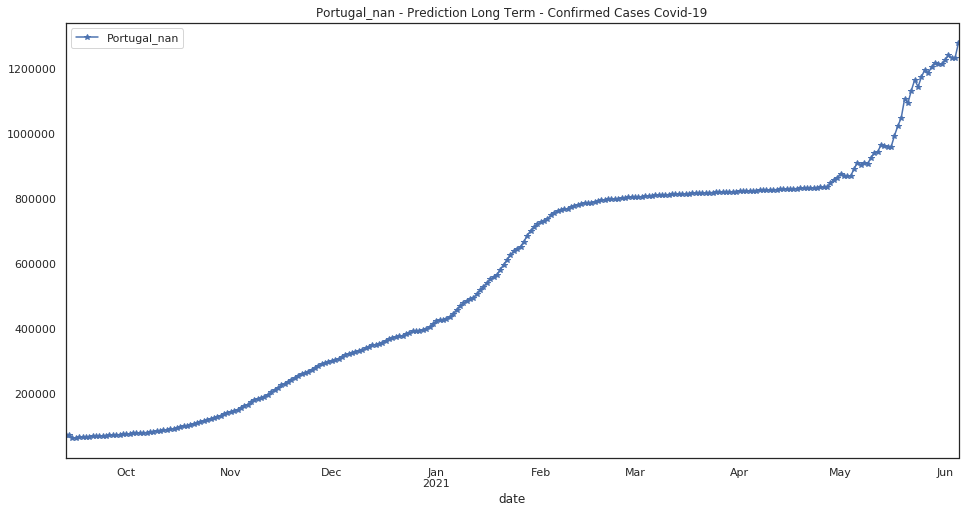

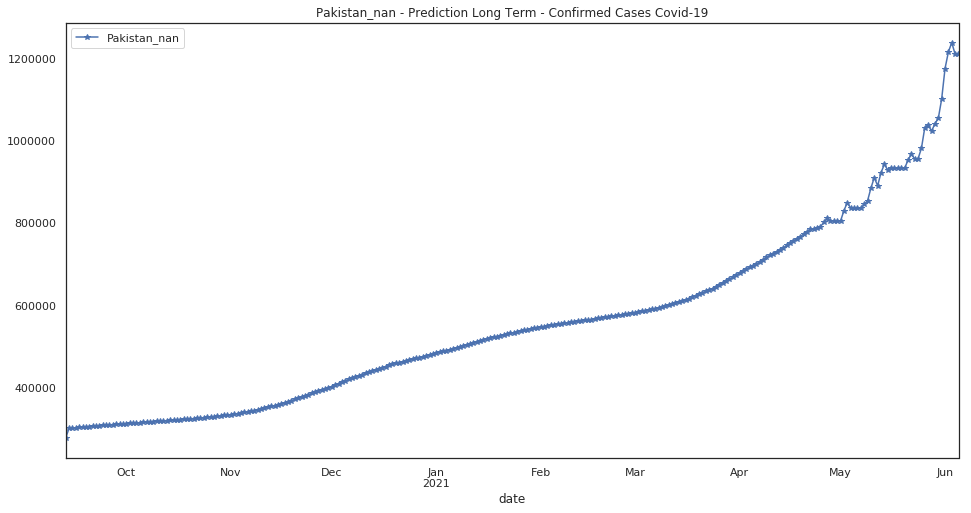

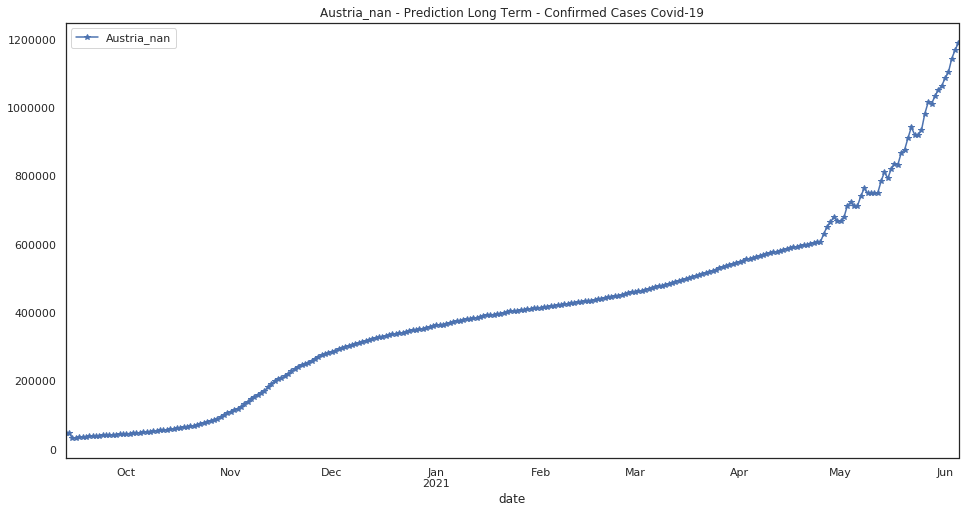

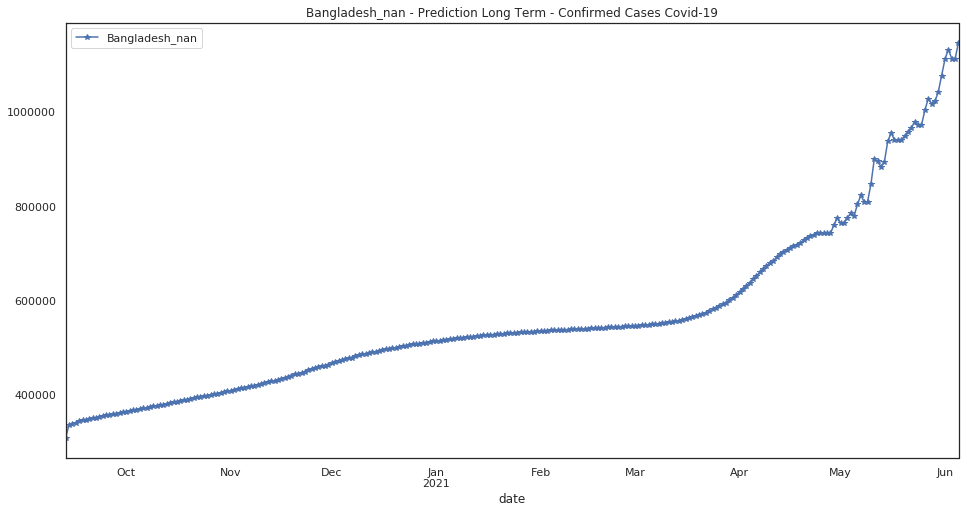

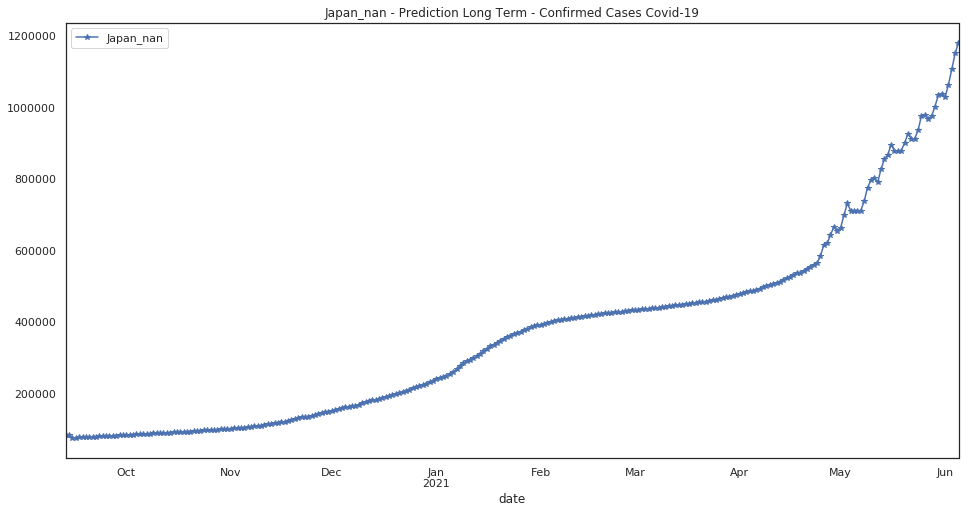

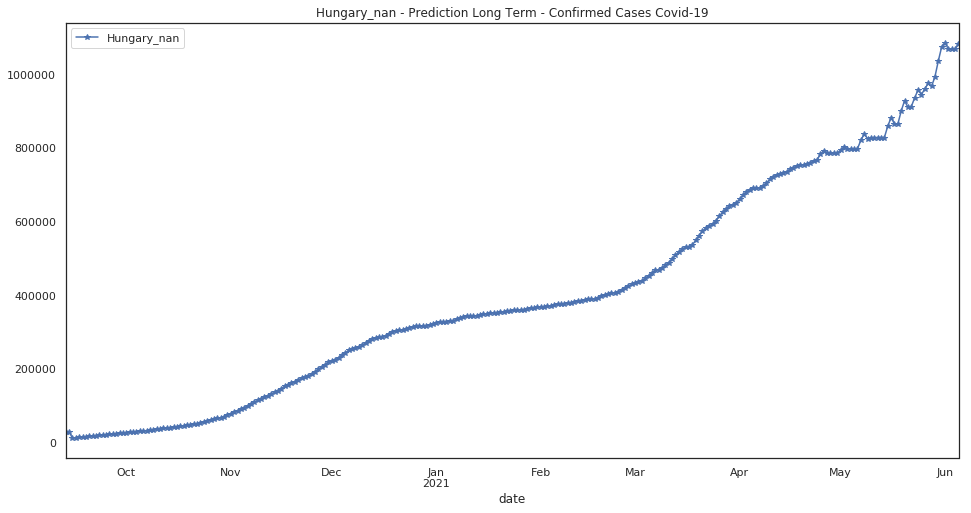

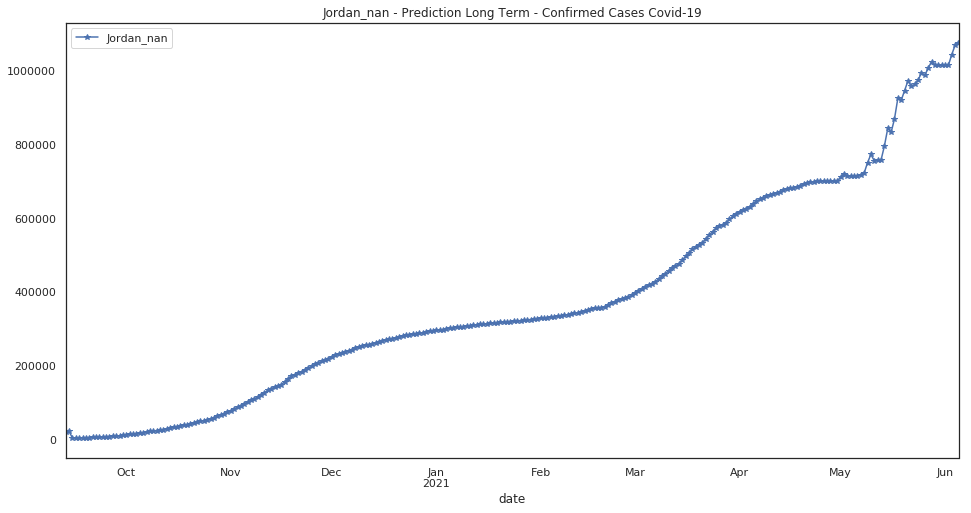

In [78]:
#
rgsx=region[:35]
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

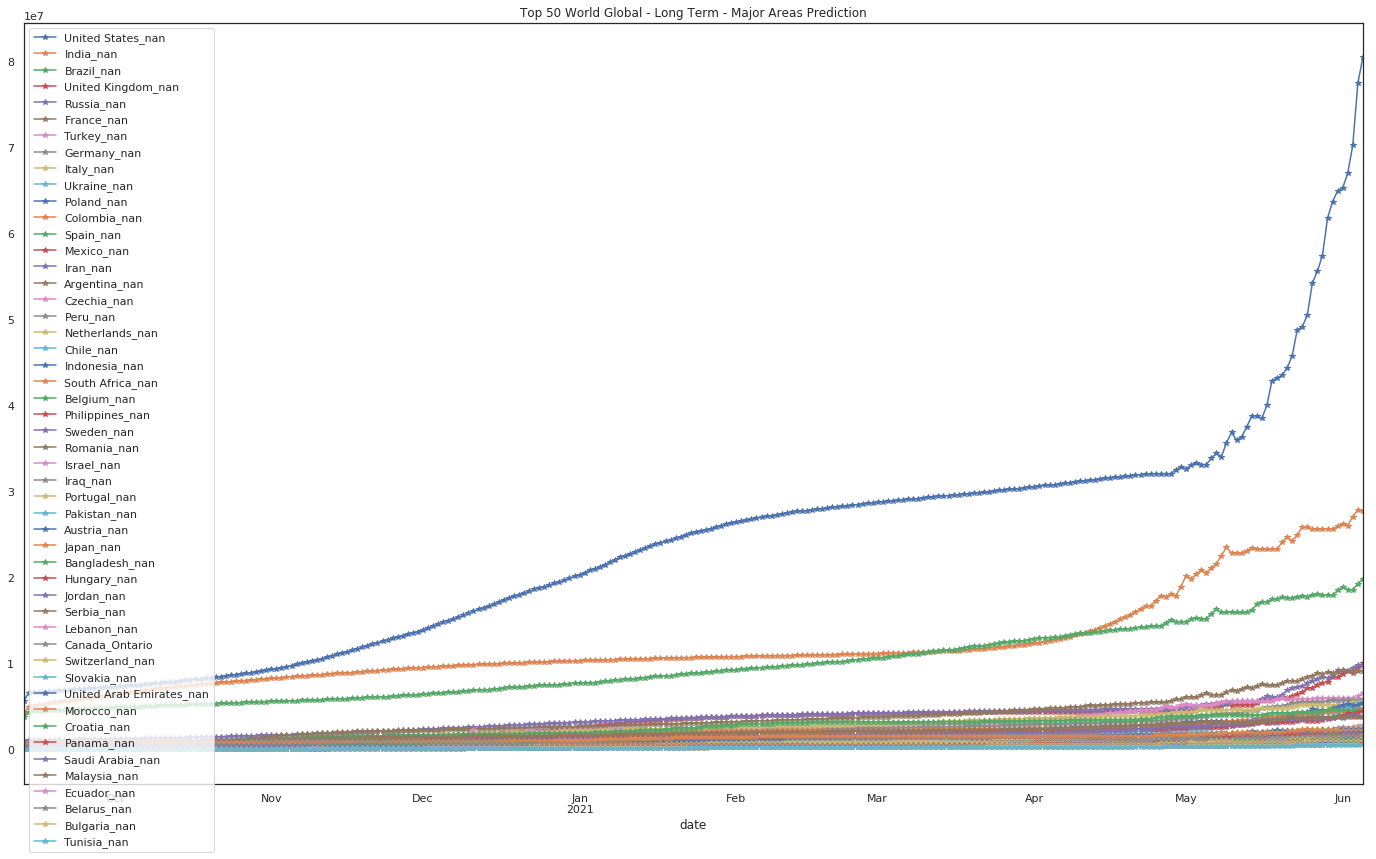

In [79]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

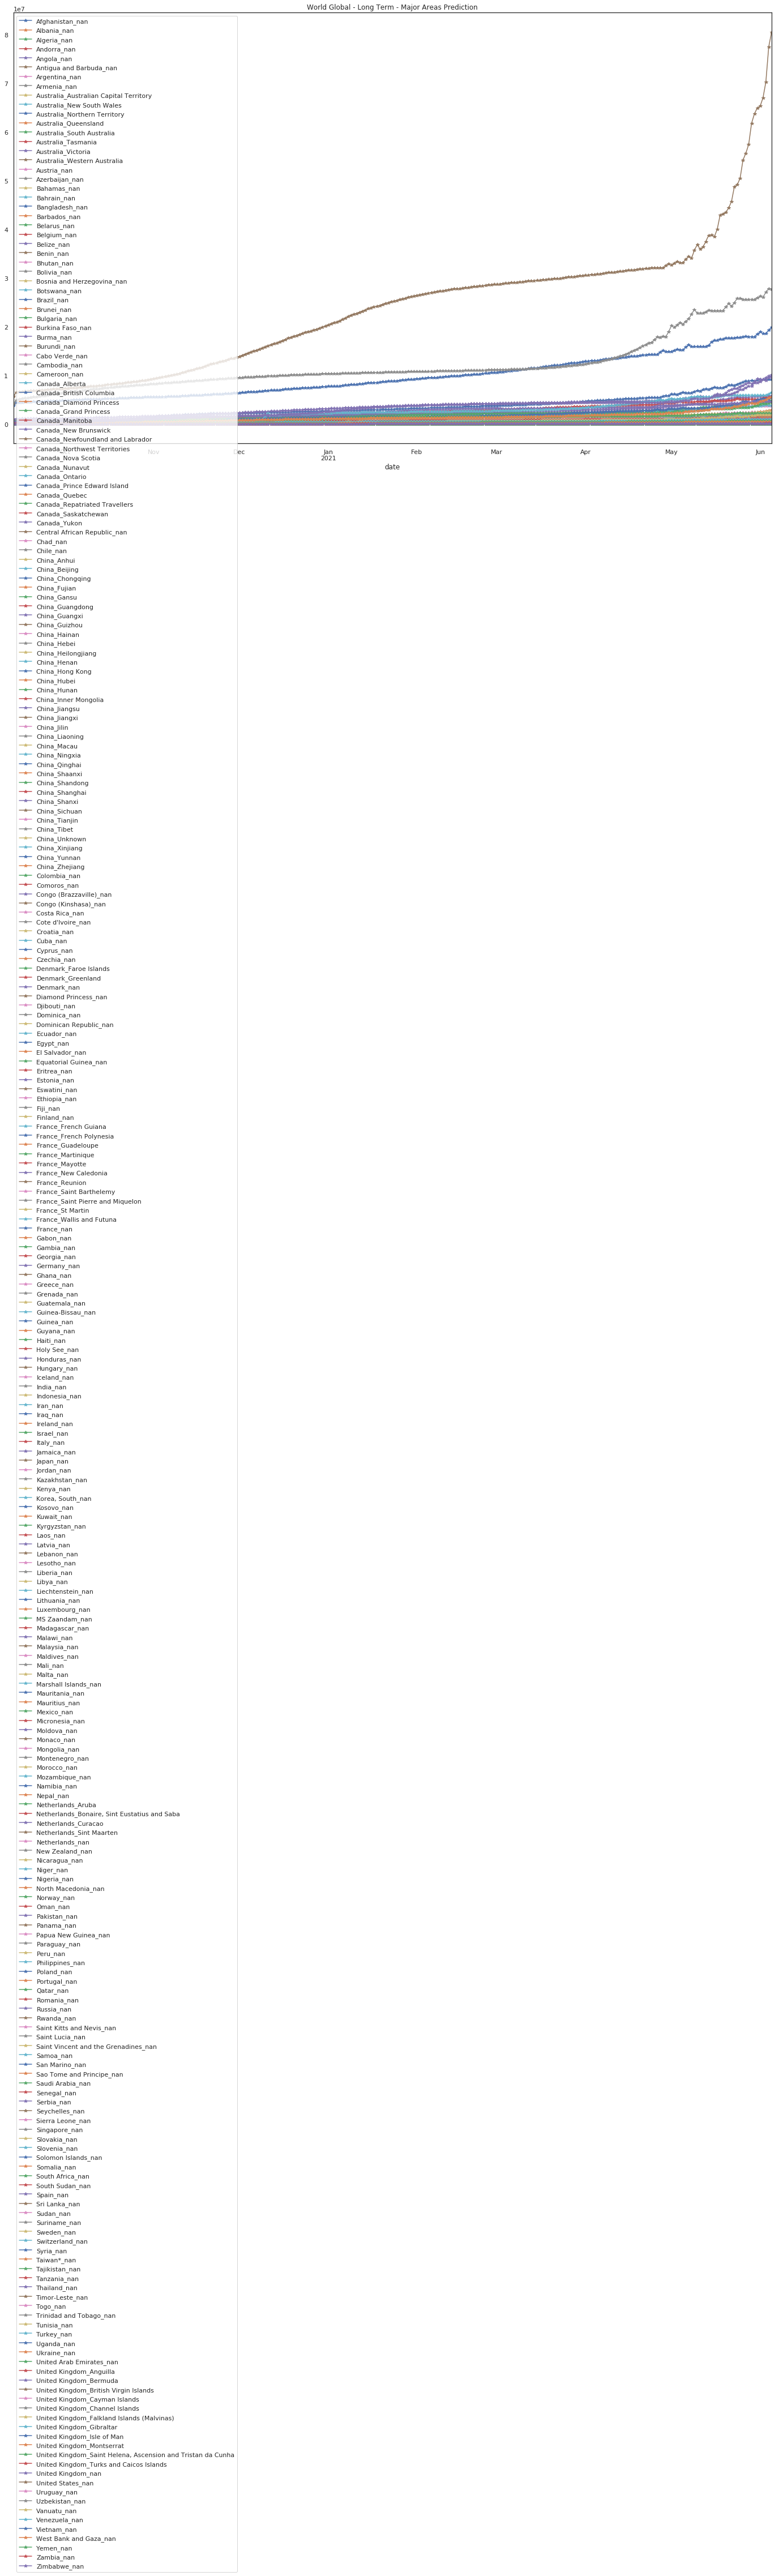

In [80]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [81]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [82]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-10-28          41215.0      19969.0      57080.0       4410.0   
2020-10-29          41344.0      20239.0      57395.0       4517.0   
2020-10-30          41420.0      20571.0      57711.0       4567.0   
2020-10-31          41503.0      20808.0      58009.0       4665.0   
2020-11-01          41578.0      21153.0      58323.0       4756.0   
2020-11-02          41696.0      21444.0      58634.0       4825.0   
2020-11-03          41804.0      21820.0      59017.0       4888.0   
2020-11-04          41890.0      22208.0      59567.0       4910.0   
2020-11-05          42009.0      22630.0      60229.0       5045.0   
2020-11-06          42060.0      23111.0      60893.0       5135.0   
2020-11-07          42108.0      23591.0      61484.0       5234.0   
2020-11-08          42224.0      24097.0      62119.0       5319.0   
2020-11-09          42360.0      24625.0      62763.0       5383.0   
2020-11-10          42534.0      25174.0      63475.0       5437.0   
2020-11-11          42692.0      25682.0      64296.0       5477.0   
2020-11-12          42871.0      26122.0      65152.0       5567.0   
2020-11-13          43049.0      26615.0      66034.0       5616.0   
2020-11-14          43123.0      27111.0      66883.0       5725.0   
2020-11-15          43294.0      27693.0      67724.0       5725.0   
2020-11-16          43522.0      28305.0      68620.0       5872.0   
2020-11-17          43739.0      29001.0      69609.0       5914.0   
2020-11-18          43992.0      29712.0      70663.0       5951.0   
2020-11-19          44243.0      30495.0      71702.0       6018.0   
2020-11-20          44438.0      31322.0      72793.0       6066.0   
2020-11-21          44577.0      32073.0      73839.0       6142.0   
2020-11-22          44752.0      32674.0      74887.0       6207.0   
2020-11-23          45022.0      33435.0      75913.0       6256.0   
2020-11-24          45233.0      34146.0      76994.0       6304.0   
2020-11-25          45442.0      34812.0      78069.0       6351.0   
2020-11-26          45661.0      35493.0      79116.0       6428.0   
...                     ...          ...          ...          ...   
2021-05-07          71983.0     151605.0     140752.0      15269.0   
2021-05-08          76231.0     150544.0     147374.0      15269.0   
2021-05-09          77950.0     153190.0     146139.0      15420.0   
2021-05-10          77100.0     155122.0     145202.0      15420.0   
2021-05-11          77454.0     154635.0     145202.0      15754.0   
2021-05-12          81701.0     156898.0     145202.0      16261.0   
2021-05-13          84260.0     158561.0     150520.0      16261.0   
2021-05-14          86383.0     160415.0     154181.0      16918.0   
2021-05-15          88177.0     162225.0     152129.0      16918.0   
2021-05-16          87048.0     166607.0     159794.0      17332.0   
2021-05-17          88304.0     170623.0     167533.0      17332.0   
2021-05-18          88740.0     168184.0     166978.0      17332.0   
2021-05-19          88740.0     168184.0     165563.0      17947.0   
2021-05-20          88740.0     168184.0     165563.0      17947.0   
2021-05-21          88740.0     168184.0     175746.0      18356.0   
2021-05-22          90158.0     168184.0     182676.0      19023.0   
2021-05-23          94714.0     169330.0     181097.0      19209.0   
2021-05-24          96229.0     170964.0     183939.0      20162.0   
2021-05-25          98172.0     171745.0     192048.0      20445.0   
2021-05-26          99667.0     172759.0     198767.0      21543.0   
2021-05-27          98419.0     172155.0     194519.0      22492.0   
2021-05-28          98419.0     177369.0     203927.0      22986.0   
2021-05-29          98419.0     180703.0     210471.0      24129.0   
2021-05-30         104294.0     178561.0     209739.0      24129.0   
2021-05-31

In [83]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [84]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [85]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [86]:
heatmap_m[:]

region        Lat        Long  \
0                                      Afghanistan_nan  33.939110   67.709953   
1                                          Albania_nan  41.153300   20.168300   
2                                          Algeria_nan  28.033900    1.659600   
3                                          Andorra_nan  42.506300    1.521800   
4                                           Angola_nan -11.202700   17.873900   
5                              Antigua and Barbuda_nan  17.060800  -61.796400   
6                                        Argentina_nan -38.416100  -63.616700   
7                                          Armenia_nan  40.069100   45.038200   
8               Australia_Australian Capital Territory -35.473500  149.012400   
9                            Australia_New South Wales -33.868800  151.209300   
10                        Australia_Northern Territory -12.463400  130.845600   
11                                Australia_Queensland -27.469800  153.025100   
12                           Australia_South Australia -34.928500  138.600700   
13                                  Australia_Tasmania -42.882100  147.327200   
14                                  Australia_Victoria -37.813600  144.963100   
15                         Australia_Western Australia -31.950500  115.860500   
16                                         Austria_nan  47.516200   14.550100   
17                                      Azerbaijan_nan  40.143100   47.576900   
18                                         Bahamas_nan  25.025885  -78.035889   
19                                         Bahrain_nan  26.027500   50.550000   
20                                      Bangladesh_nan  23.685000   90.356300   
21                                        Barbados_nan  13.193900  -59.543200   
22                                         Belarus_nan  53.709800   27.953400   
23                                         Belgium_nan  50.833300    4.469936   
24                                          Belize_nan  17.189900  -88.497600   
25                                           Benin_nan   9.307700    2.315800   
26                                          Bhutan_nan  27.514200   90.433600   
27                                         Bolivia_nan -16.290200  -63.588700   
28                          Bosnia and Herzegovina_nan  43.915900   17.679100   
29                                        Botswana_nan -22.328500   24.684900   
..                                                 ...        ...         ...   
251                                    Timor-Leste_nan  -8.874217  125.727539   
252                                           Togo_nan   8.619500    0.824800   
253                            Trinidad and Tobago_nan  10.691800  -61.222500   
254                                        Tunisia_nan  33.886917    9.537499   
255                                         Turkey_nan  38.963700   35.243300   
256                                  United States_nan  40.000000 -100.000000   
257                                         Uganda_nan   1.373333   32.290275   
258                                        Ukraine_nan  48.379400   31.165600   
259                           United Arab Emirates_nan  23.424076   53.847818   
260                            United Kingdom_Anguilla  18.220600  -63.068600   
261                             United Kingdom_Bermuda  32.307800  -64.750500   
262              United Kingdom_British Virgin Islands  18.420700  -64.640000   
263                      United Kingdom_Cayman Islands  19.313300  -81.254600   
264                     United Kingdom_Channel Islands  49.372300   -2.364400   
265         United Kingdom_Falkland Islands (Malvinas) -51.796300  -59.523600   
266                           United Kingdom_Gibraltar  36.140800   -5.353600   
267                         United Kingdom_Isle of Man  54.236100   -4.548100   
268                          United Kingdom_Montserrat  16.742498  -62.187366  

In [87]:
# Fill empty lat,long with 0
heatmap_m['Lat']=heatmap_m['Lat'].fillna(0)
heatmap_m['Long']=heatmap_m['Long'].fillna(0)
#
heatmap_m_fn="heatmap_m_"+str(num_days_R_prediction)+".csv"
heatmap_m.to_csv(r'data/'+heatmap_m_fn, index = False, header=True)

In [88]:
#!pip install folium
import folium
import re

lat=40.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=3)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction
n2dayarray=-1-(num_days_R_prediction*2)

for lat,lng,num,totpred,lastday7DayAvg,today7DayAvg in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]], \
                                                           (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg, \
                                                           (heatmap_m[heatmap_m.columns[ndayarray]]-heatmap_m[heatmap_m.columns[n2dayarray]])/ndaysavg):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' Current7DayAVG='+str(round(today7DayAvg))+' Predicted7DayAVG='+str(round(lastday7DayAvg))+' ConfTotPred='+str(round(totpred))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [89]:
# Top 50 Regions in the World impacted
#
max_cont=max_countries_map
region_m2=region[:max_cont]
#
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                    region        Lat        Long  \
0       6             Argentina_nan -38.416100  -63.616700   
1      16               Austria_nan  47.516200   14.550100   
2      20            Bangladesh_nan  23.685000   90.356300   
3      22               Belarus_nan  53.709800   27.953400   
4      23               Belgium_nan  50.833300    4.469936   
5      30                Brazil_nan -14.235000  -51.925300   
6      32              Bulgaria_nan  42.733900   25.485800   
7      51            Canada_Ontario  51.253800  -85.323200   
8      53             Canada_Quebec  52.939900  -73.549100   
9      59                 Chile_nan -35.675100  -71.543000   
10     94              Colombia_nan   4.570900  -74.297300   
11    100               Croatia_nan  45.100000   15.200000   
12    103               Czechia_nan  49.817500   15.473000   
13    111               Ecuador_nan  -1.831200  -78.183400   
14    132                France_nan  46.227600    2.213700   
15    137               Germany_nan  51.165691   10.451526   
16    149               Hungary_nan  47.162500   19.503300   
17    151                 India_nan  20.593684   78.962880   
18    152             Indonesia_nan  -0.789300  113.921300   
19    153                  Iran_nan  32.427908   53.688046   
20    154                  Iraq_nan  33.223191   43.679291   
21    156                Israel_nan  31.046051   34.851612   
22    157                Israel_nan  31.046051   34.851612   
23    158                 Italy_nan  41.871940   12.567380   
24    160                 Japan_nan  36.204824  138.252924   
25    161                Jordan_nan  31.240000   36.510000   
26    170               Lebanon_nan  33.854700   35.862300   
27    171               Lebanon_nan  33.854700   35.862300   
28    181              Malaysia_nan   4.210484  101.975766   
29    188                Mexico_nan  23.634500 -102.552800   
30    194               Morocco_nan  31.791700   -7.092600   
31    202           Netherlands_nan  52.132600    5.291300   
32    210              Pakistan_nan  30.375300   69.345100   
33    211                Panama_nan   8.538000  -80.782100   
34    214                  Peru_nan  -9.190000  -75.015200   
35    215           Philippines_nan  12.879721  121.774017   
36    216                Poland_nan  51.919400   19.145100   
37    217              Portugal_nan  39.399900   -8.224500   
38    219               Romania_nan  45.943200   24.966800   
39    220                Russia_nan  61.524010  105.318756   
40    228          Saudi Arabia_nan  23.885942   45.079162   
41    230                Serbia_nan  44.016500   21.005900   
42    234              Slovakia_nan  48.669000   19.699000   
43    238          South Africa_nan -30.559500   22.937500   
44    240                 Spain_nan  40.463667   -3.749220   
45    244                Sweden_nan  60.128161   18.643501   
46    245           Switzerland_nan  46.818200    8.227500   
47    255                Turkey_nan  38.963700   35.243300   
48    256         United States_nan  40.000000 -100.000000   
49    258               Ukraine_nan  48.379400   31.165600   
50    259  United Arab Emirates_nan  23.424076   53.847818   
51    271        United Kingdom_nan  55.378100   -3.436000   

    2020-09-13 00:00:00  2020-09-14 00:00:00  2020-09-15 00:00:00  \
0              497144.0             555537.0             578214.0   
1               46655.0              46985.0              33541.0   
2              309131.0             337520.0             339601.0   
3               82025.0              82186.0              74360.0   
4               98654.0              99387.0              94306.0   
5             3752563.0            4330455.0            4381143.0   
6               33512.0              33635.0              18061.0   
7               58148.0              58510.0              46905.0   
8               74102.0              74340.0              65262.0   
9              392978.0    

In [90]:
import folium
import re

lat=40.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=3)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction
n2dayarray=-1-(num_days_R_prediction*2)

for lat2,lng2,num2,totpred2,lastday7DayAvg2,today7DayAvg2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], \
                                                                (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg, \
                                                                (heatmap_m2[heatmap_m2.columns[ndayarray]]-heatmap_m2[heatmap_m2.columns[n2dayarray]])/ndaysavg):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' Current7DayAvg='+str(round(today7DayAvg2))+' Predicted7DayAvg='+str(round(lastday7DayAvg2))+' ConfTotPred='+str(round(totpred2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [91]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [92]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [93]:
exit()